In [66]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv("finaldata.csv", index_col = False)
df = df.drop(["FractionalIncrease", "High", "Low", "Positive"],axis=1)
df = df.fillna(0)
x_train, x_test, y_train, y_test = train_test_split(df.drop(["Delta"], axis=1), df["Delta"], test_size=0.20, random_state=4)
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [112]:
df

,Open,Delta,ReuterCredit,reuter_score,InvestCredit,invest_score,FoolCredit,fool_score,CnbcCredit,cnbc_score,MarketCredit,market_score
0,778.550,-4.060,0.973861,0.497530,0.976303,0.911567,0.973861,0.984530,0.973861,0.924140,0.977183,0.895209
1,792.950,14.400,0.949589,0.577730,0.931008,0.873125,0.949589,0.992450,0.949589,0.745560,0.953855,0.488955
2,817.360,24.410,0.945488,0.572960,0.937707,0.959300,0.945488,0.990220,0.945488,0.942220,0.947621,0.421736
3,809.100,-8.260,0.958241,0.058500,0.950460,0.982900,0.952755,0.983064,0.957221,0.957580,0.958288,0.694864
4,802.330,-6.770,0.968660,0.647170,0.957466,0.952050,0.961451,0.977010,0.968150,0.985720,0.968683,0.970160
5,807.500,5.170,0.971340,0.520433,0.961143,0.963560,0.969940,0.979464,0.973290,0.970120,0.973557,0.727500
6,828.380,20.880,0.951983,0.613570,0.950226,0.875420,0.951283,0.983930,0.952958,0.728020,0.954236,0.736736
7,829.000,0.620,0.958883,0.488550,0.957756,0.981425,0.958191,0.976930,0.959028,0.851680,0.960240,0.635125
8,859.050,30.050,0.955338,0.468512,0.949628,0.968350,0.954649,0.983340,0.955067,0.317280,0.956246,0.691500
9,815.000,-44.050,0.945884,0.447844,0.946424,0.988067,0.945540,0.936760,0.945749,0.508890,0.946911,0.424650


In [113]:
model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

In [114]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               6144      
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 513       
Total params: 269,313
Trainable params: 269,313
Non-trainable params: 0
_________________________________________________________________


In [115]:
adam = Adam(lr=0.1)
model.compile(loss='mean_squared_error',
 optimizer='adam',
 metrics=['mse'])

In [116]:
history = model.fit(x_train, y_train,
 batch_size=128,
 epochs=10000,
 verbose=1,
 validation_split=0.1)

Train on 216 samples, validate on 24 samples
Epoch 1/10000
216/216 [==============================] - 1s 3ms/step - loss: 2096.3974 - mean_squared_error: 2096.3974 - val_loss: 491.0721 - val_mean_squared_error: 491.0721
Epoch 2/10000
216/216 [==============================] - 0s 52us/step - loss: 564.3772 - mean_squared_error: 564.3772 - val_loss: 2884.1741 - val_mean_squared_error: 2884.1741
Epoch 3/10000
216/216 [==============================] - 0s 45us/step - loss: 1917.0581 - mean_squared_error: 1917.0581 - val_loss: 1127.6512 - val_mean_squared_error: 1127.6512
Epoch 4/10000
216/216 [==============================] - 0s 48us/step - loss: 692.4548 - mean_squared_error: 692.4548 - val_loss: 458.5735 - val_mean_squared_error: 458.5735
Epoch 5/10000
216/216 [==============================] - 0s 47us/step - loss: 708.4207 - mean_squared_error: 708.4207 - val_loss: 1413.4225 - val_mean_squared_error: 1413.4225
Epoch 6/10000
216/216 [==============================] - 0s 52us/step - loss

Epoch 48/10000
216/216 [==============================] - 0s 44us/step - loss: 138.9008 - mean_squared_error: 138.9008 - val_loss: 78.1159 - val_mean_squared_error: 78.1159
Epoch 49/10000
216/216 [==============================] - 0s 41us/step - loss: 115.9622 - mean_squared_error: 115.9622 - val_loss: 85.8318 - val_mean_squared_error: 85.8318
Epoch 50/10000
216/216 [==============================] - 0s 42us/step - loss: 136.7401 - mean_squared_error: 136.7401 - val_loss: 81.2451 - val_mean_squared_error: 81.2451
Epoch 51/10000
216/216 [==============================] - 0s 45us/step - loss: 118.4133 - mean_squared_error: 118.4133 - val_loss: 78.0632 - val_mean_squared_error: 78.0632
Epoch 52/10000
216/216 [==============================] - 0s 40us/step - loss: 130.2796 - mean_squared_error: 130.2796 - val_loss: 78.1760 - val_mean_squared_error: 78.1760
Epoch 53/10000
216/216 [==============================] - 0s 46us/step - loss: 177.5500 - mean_squared_error: 177.5500 - val_loss: 78.0

216/216 [==============================] - 0s 42us/step - loss: 112.9933 - mean_squared_error: 112.9933 - val_loss: 81.3169 - val_mean_squared_error: 81.3169
Epoch 96/10000
216/216 [==============================] - 0s 40us/step - loss: 103.0342 - mean_squared_error: 103.0342 - val_loss: 79.8150 - val_mean_squared_error: 79.8150
Epoch 97/10000
216/216 [==============================] - 0s 44us/step - loss: 111.7920 - mean_squared_error: 111.7920 - val_loss: 78.1531 - val_mean_squared_error: 78.1531
Epoch 98/10000
216/216 [==============================] - 0s 47us/step - loss: 113.0546 - mean_squared_error: 113.0546 - val_loss: 78.3384 - val_mean_squared_error: 78.3384
Epoch 99/10000
216/216 [==============================] - 0s 46us/step - loss: 110.1086 - mean_squared_error: 110.1086 - val_loss: 77.9880 - val_mean_squared_error: 77.9880
Epoch 100/10000
216/216 [==============================] - 0s 49us/step - loss: 95.7046 - mean_squared_error: 95.7046 - val_loss: 78.0074 - val_mean_s

216/216 [==============================] - 0s 48us/step - loss: 124.2616 - mean_squared_error: 124.2616 - val_loss: 79.6236 - val_mean_squared_error: 79.6236
Epoch 143/10000
216/216 [==============================] - 0s 54us/step - loss: 108.3379 - mean_squared_error: 108.3379 - val_loss: 77.9673 - val_mean_squared_error: 77.9673
Epoch 144/10000
216/216 [==============================] - 0s 45us/step - loss: 112.4222 - mean_squared_error: 112.4222 - val_loss: 78.5286 - val_mean_squared_error: 78.5286
Epoch 145/10000
216/216 [==============================] - 0s 57us/step - loss: 104.8335 - mean_squared_error: 104.8335 - val_loss: 78.2059 - val_mean_squared_error: 78.2059
Epoch 146/10000
216/216 [==============================] - 0s 51us/step - loss: 100.9571 - mean_squared_error: 100.9571 - val_loss: 84.7597 - val_mean_squared_error: 84.7597
Epoch 147/10000
216/216 [==============================] - 0s 42us/step - loss: 79.0644 - mean_squared_error: 79.0644 - val_loss: 85.4629 - val_me

Epoch 189/10000
216/216 [==============================] - 0s 52us/step - loss: 96.3649 - mean_squared_error: 96.3649 - val_loss: 79.2729 - val_mean_squared_error: 79.2729
Epoch 190/10000
216/216 [==============================] - 0s 42us/step - loss: 111.0684 - mean_squared_error: 111.0684 - val_loss: 79.0806 - val_mean_squared_error: 79.0806
Epoch 191/10000
216/216 [==============================] - 0s 45us/step - loss: 98.8374 - mean_squared_error: 98.8374 - val_loss: 77.9659 - val_mean_squared_error: 77.9659
Epoch 192/10000
216/216 [==============================] - 0s 45us/step - loss: 99.9570 - mean_squared_error: 99.9570 - val_loss: 78.3502 - val_mean_squared_error: 78.3502
Epoch 193/10000
216/216 [==============================] - 0s 47us/step - loss: 105.1684 - mean_squared_error: 105.1684 - val_loss: 78.8330 - val_mean_squared_error: 78.8330
Epoch 194/10000
216/216 [==============================] - 0s 52us/step - loss: 103.4239 - mean_squared_error: 103.4239 - val_loss: 78.0

216/216 [==============================] - 0s 51us/step - loss: 105.3065 - mean_squared_error: 105.3065 - val_loss: 78.2596 - val_mean_squared_error: 78.2596
Epoch 237/10000
216/216 [==============================] - 0s 49us/step - loss: 96.1402 - mean_squared_error: 96.1402 - val_loss: 78.7199 - val_mean_squared_error: 78.7199
Epoch 238/10000
216/216 [==============================] - 0s 50us/step - loss: 100.7783 - mean_squared_error: 100.7783 - val_loss: 78.2263 - val_mean_squared_error: 78.2263
Epoch 239/10000
216/216 [==============================] - 0s 48us/step - loss: 102.1420 - mean_squared_error: 102.1420 - val_loss: 78.1274 - val_mean_squared_error: 78.1274
Epoch 240/10000
216/216 [==============================] - 0s 48us/step - loss: 116.5407 - mean_squared_error: 116.5407 - val_loss: 80.2103 - val_mean_squared_error: 80.2103
Epoch 241/10000
216/216 [==============================] - 0s 48us/step - loss: 100.3799 - mean_squared_error: 100.3799 - val_loss: 80.2368 - val_me

216/216 [==============================] - 0s 49us/step - loss: 96.5772 - mean_squared_error: 96.5772 - val_loss: 78.1478 - val_mean_squared_error: 78.1478
Epoch 284/10000
216/216 [==============================] - 0s 46us/step - loss: 102.4884 - mean_squared_error: 102.4884 - val_loss: 77.9730 - val_mean_squared_error: 77.9730
Epoch 285/10000
216/216 [==============================] - 0s 42us/step - loss: 93.3784 - mean_squared_error: 93.3784 - val_loss: 78.0227 - val_mean_squared_error: 78.0227
Epoch 286/10000
216/216 [==============================] - 0s 41us/step - loss: 94.7809 - mean_squared_error: 94.7809 - val_loss: 78.0322 - val_mean_squared_error: 78.0322
Epoch 287/10000
216/216 [==============================] - 0s 41us/step - loss: 97.3331 - mean_squared_error: 97.3331 - val_loss: 78.3092 - val_mean_squared_error: 78.3092
Epoch 288/10000
216/216 [==============================] - 0s 47us/step - loss: 97.0429 - mean_squared_error: 97.0429 - val_loss: 79.2929 - val_mean_squar

216/216 [==============================] - 0s 47us/step - loss: 109.3063 - mean_squared_error: 109.3063 - val_loss: 78.9769 - val_mean_squared_error: 78.9769
Epoch 331/10000
216/216 [==============================] - 0s 50us/step - loss: 110.6486 - mean_squared_error: 110.6486 - val_loss: 77.9763 - val_mean_squared_error: 77.9763
Epoch 332/10000
216/216 [==============================] - 0s 51us/step - loss: 98.2717 - mean_squared_error: 98.2717 - val_loss: 79.7981 - val_mean_squared_error: 79.7981
Epoch 333/10000
216/216 [==============================] - 0s 48us/step - loss: 100.1398 - mean_squared_error: 100.1398 - val_loss: 84.9608 - val_mean_squared_error: 84.9608
Epoch 334/10000
216/216 [==============================] - 0s 44us/step - loss: 110.3967 - mean_squared_error: 110.3967 - val_loss: 85.8341 - val_mean_squared_error: 85.8341
Epoch 335/10000
216/216 [==============================] - 0s 45us/step - loss: 105.4467 - mean_squared_error: 105.4467 - val_loss: 82.6397 - val_me

216/216 [==============================] - 0s 43us/step - loss: 98.5191 - mean_squared_error: 98.5191 - val_loss: 79.0138 - val_mean_squared_error: 79.0138
Epoch 378/10000
216/216 [==============================] - 0s 42us/step - loss: 106.2735 - mean_squared_error: 106.2735 - val_loss: 78.7754 - val_mean_squared_error: 78.7754
Epoch 379/10000
216/216 [==============================] - 0s 46us/step - loss: 98.3999 - mean_squared_error: 98.3999 - val_loss: 78.6605 - val_mean_squared_error: 78.6605
Epoch 380/10000
216/216 [==============================] - 0s 48us/step - loss: 101.5932 - mean_squared_error: 101.5932 - val_loss: 78.1073 - val_mean_squared_error: 78.1073
Epoch 381/10000
216/216 [==============================] - 0s 48us/step - loss: 99.3993 - mean_squared_error: 99.3993 - val_loss: 77.9702 - val_mean_squared_error: 77.9702
Epoch 382/10000
216/216 [==============================] - 0s 47us/step - loss: 97.8207 - mean_squared_error: 97.8207 - val_loss: 78.1040 - val_mean_squ

216/216 [==============================] - 0s 40us/step - loss: 92.6907 - mean_squared_error: 92.6907 - val_loss: 78.2576 - val_mean_squared_error: 78.2576
Epoch 425/10000
216/216 [==============================] - 0s 43us/step - loss: 90.4182 - mean_squared_error: 90.4182 - val_loss: 78.0490 - val_mean_squared_error: 78.0490
Epoch 426/10000
216/216 [==============================] - 0s 44us/step - loss: 92.3370 - mean_squared_error: 92.3370 - val_loss: 78.2245 - val_mean_squared_error: 78.2245
Epoch 427/10000
216/216 [==============================] - 0s 58us/step - loss: 95.1732 - mean_squared_error: 95.1732 - val_loss: 79.4627 - val_mean_squared_error: 79.4627
Epoch 428/10000
216/216 [==============================] - 0s 55us/step - loss: 97.9344 - mean_squared_error: 97.9344 - val_loss: 79.4582 - val_mean_squared_error: 79.4582
Epoch 429/10000
216/216 [==============================] - 0s 52us/step - loss: 99.9018 - mean_squared_error: 99.9018 - val_loss: 79.5546 - val_mean_squared

216/216 [==============================] - 0s 44us/step - loss: 96.1419 - mean_squared_error: 96.1419 - val_loss: 78.0024 - val_mean_squared_error: 78.0024
Epoch 472/10000
216/216 [==============================] - 0s 45us/step - loss: 99.7776 - mean_squared_error: 99.7776 - val_loss: 78.7318 - val_mean_squared_error: 78.7318
Epoch 473/10000
216/216 [==============================] - 0s 46us/step - loss: 101.1011 - mean_squared_error: 101.1011 - val_loss: 81.4508 - val_mean_squared_error: 81.4508
Epoch 474/10000
216/216 [==============================] - 0s 44us/step - loss: 100.9220 - mean_squared_error: 100.9220 - val_loss: 81.5418 - val_mean_squared_error: 81.5418
Epoch 475/10000
216/216 [==============================] - 0s 41us/step - loss: 103.4424 - mean_squared_error: 103.4424 - val_loss: 80.0938 - val_mean_squared_error: 80.0938
Epoch 476/10000
216/216 [==============================] - 0s 42us/step - loss: 106.4212 - mean_squared_error: 106.4212 - val_loss: 78.1719 - val_mean

216/216 [==============================] - 0s 47us/step - loss: 96.2385 - mean_squared_error: 96.2385 - val_loss: 78.1190 - val_mean_squared_error: 78.1190
Epoch 519/10000
216/216 [==============================] - 0s 41us/step - loss: 97.6452 - mean_squared_error: 97.6452 - val_loss: 78.0006 - val_mean_squared_error: 78.0006
Epoch 520/10000
216/216 [==============================] - 0s 44us/step - loss: 100.8241 - mean_squared_error: 100.8241 - val_loss: 78.0053 - val_mean_squared_error: 78.0053
Epoch 521/10000
216/216 [==============================] - 0s 41us/step - loss: 100.5618 - mean_squared_error: 100.5618 - val_loss: 78.0425 - val_mean_squared_error: 78.0425
Epoch 522/10000
216/216 [==============================] - 0s 42us/step - loss: 106.3954 - mean_squared_error: 106.3954 - val_loss: 77.9868 - val_mean_squared_error: 77.9868
Epoch 523/10000
216/216 [==============================] - 0s 43us/step - loss: 99.6712 - mean_squared_error: 99.6712 - val_loss: 78.0600 - val_mean_s

216/216 [==============================] - 0s 49us/step - loss: 100.2324 - mean_squared_error: 100.2324 - val_loss: 77.9989 - val_mean_squared_error: 77.9989
Epoch 566/10000
216/216 [==============================] - 0s 43us/step - loss: 101.8134 - mean_squared_error: 101.8134 - val_loss: 77.9854 - val_mean_squared_error: 77.9854
Epoch 567/10000
216/216 [==============================] - 0s 41us/step - loss: 97.9345 - mean_squared_error: 97.9345 - val_loss: 78.0008 - val_mean_squared_error: 78.0008
Epoch 568/10000
216/216 [==============================] - 0s 45us/step - loss: 98.9507 - mean_squared_error: 98.9507 - val_loss: 78.1294 - val_mean_squared_error: 78.1294
Epoch 569/10000
216/216 [==============================] - 0s 43us/step - loss: 98.2742 - mean_squared_error: 98.2742 - val_loss: 78.3627 - val_mean_squared_error: 78.3627
Epoch 570/10000
216/216 [==============================] - 0s 40us/step - loss: 101.5744 - mean_squared_error: 101.5744 - val_loss: 78.4667 - val_mean_s

216/216 [==============================] - 0s 42us/step - loss: 96.3572 - mean_squared_error: 96.3572 - val_loss: 78.0422 - val_mean_squared_error: 78.0422
Epoch 613/10000
216/216 [==============================] - 0s 42us/step - loss: 92.7419 - mean_squared_error: 92.7419 - val_loss: 78.1784 - val_mean_squared_error: 78.1784
Epoch 614/10000
216/216 [==============================] - 0s 43us/step - loss: 101.0088 - mean_squared_error: 101.0088 - val_loss: 78.3349 - val_mean_squared_error: 78.3349
Epoch 615/10000
216/216 [==============================] - 0s 41us/step - loss: 98.0881 - mean_squared_error: 98.0881 - val_loss: 78.5412 - val_mean_squared_error: 78.5412
Epoch 616/10000
216/216 [==============================] - 0s 41us/step - loss: 98.0810 - mean_squared_error: 98.0810 - val_loss: 78.5816 - val_mean_squared_error: 78.5816
Epoch 617/10000
216/216 [==============================] - 0s 41us/step - loss: 100.3188 - mean_squared_error: 100.3188 - val_loss: 78.5819 - val_mean_squ

Epoch 660/10000
216/216 [==============================] - 0s 46us/step - loss: 95.1788 - mean_squared_error: 95.1788 - val_loss: 78.0706 - val_mean_squared_error: 78.0706
Epoch 661/10000
216/216 [==============================] - 0s 46us/step - loss: 98.7973 - mean_squared_error: 98.7973 - val_loss: 78.0341 - val_mean_squared_error: 78.0341
Epoch 662/10000
216/216 [==============================] - 0s 43us/step - loss: 96.5975 - mean_squared_error: 96.5975 - val_loss: 78.0669 - val_mean_squared_error: 78.0669
Epoch 663/10000
216/216 [==============================] - 0s 49us/step - loss: 100.7796 - mean_squared_error: 100.7796 - val_loss: 78.0123 - val_mean_squared_error: 78.0123
Epoch 664/10000
216/216 [==============================] - 0s 40us/step - loss: 98.1004 - mean_squared_error: 98.1004 - val_loss: 78.0107 - val_mean_squared_error: 78.0107
Epoch 665/10000
216/216 [==============================] - 0s 49us/step - loss: 97.9531 - mean_squared_error: 97.9531 - val_loss: 78.0279 

216/216 [==============================] - 0s 48us/step - loss: 98.3420 - mean_squared_error: 98.3420 - val_loss: 78.2495 - val_mean_squared_error: 78.2495
Epoch 708/10000
216/216 [==============================] - 0s 46us/step - loss: 97.2541 - mean_squared_error: 97.2541 - val_loss: 78.1536 - val_mean_squared_error: 78.1536
Epoch 709/10000
216/216 [==============================] - 0s 45us/step - loss: 97.4435 - mean_squared_error: 97.4435 - val_loss: 78.1708 - val_mean_squared_error: 78.1708
Epoch 710/10000
216/216 [==============================] - 0s 48us/step - loss: 98.2100 - mean_squared_error: 98.2100 - val_loss: 78.1826 - val_mean_squared_error: 78.1826
Epoch 711/10000
216/216 [==============================] - 0s 45us/step - loss: 96.3559 - mean_squared_error: 96.3559 - val_loss: 78.2225 - val_mean_squared_error: 78.2225
Epoch 712/10000
216/216 [==============================] - 0s 46us/step - loss: 95.2682 - mean_squared_error: 95.2682 - val_loss: 78.3097 - val_mean_squared

Epoch 755/10000
216/216 [==============================] - 0s 46us/step - loss: 101.4542 - mean_squared_error: 101.4542 - val_loss: 78.3820 - val_mean_squared_error: 78.3820
Epoch 756/10000
216/216 [==============================] - 0s 46us/step - loss: 94.2668 - mean_squared_error: 94.2668 - val_loss: 78.4820 - val_mean_squared_error: 78.4820
Epoch 757/10000
216/216 [==============================] - 0s 46us/step - loss: 96.5581 - mean_squared_error: 96.5581 - val_loss: 78.4372 - val_mean_squared_error: 78.4372
Epoch 758/10000
216/216 [==============================] - 0s 43us/step - loss: 92.6040 - mean_squared_error: 92.6040 - val_loss: 78.2862 - val_mean_squared_error: 78.2862
Epoch 759/10000
216/216 [==============================] - 0s 47us/step - loss: 96.2799 - mean_squared_error: 96.2799 - val_loss: 78.1325 - val_mean_squared_error: 78.1325
Epoch 760/10000
216/216 [==============================] - 0s 53us/step - loss: 94.2995 - mean_squared_error: 94.2995 - val_loss: 78.0730 

216/216 [==============================] - 0s 47us/step - loss: 94.6641 - mean_squared_error: 94.6641 - val_loss: 78.2479 - val_mean_squared_error: 78.2479
Epoch 803/10000
216/216 [==============================] - 0s 46us/step - loss: 97.8905 - mean_squared_error: 97.8905 - val_loss: 78.3834 - val_mean_squared_error: 78.3834
Epoch 804/10000
216/216 [==============================] - 0s 51us/step - loss: 99.8955 - mean_squared_error: 99.8955 - val_loss: 78.3018 - val_mean_squared_error: 78.3018
Epoch 805/10000
216/216 [==============================] - 0s 51us/step - loss: 96.3516 - mean_squared_error: 96.3516 - val_loss: 78.4730 - val_mean_squared_error: 78.4730
Epoch 806/10000
216/216 [==============================] - 0s 50us/step - loss: 94.8470 - mean_squared_error: 94.8470 - val_loss: 78.2534 - val_mean_squared_error: 78.2534
Epoch 807/10000
216/216 [==============================] - 0s 48us/step - loss: 98.3590 - mean_squared_error: 98.3590 - val_loss: 78.1389 - val_mean_squared

Epoch 850/10000
216/216 [==============================] - 0s 49us/step - loss: 100.9791 - mean_squared_error: 100.9791 - val_loss: 78.2562 - val_mean_squared_error: 78.2562
Epoch 851/10000
216/216 [==============================] - 0s 48us/step - loss: 95.4296 - mean_squared_error: 95.4296 - val_loss: 78.2290 - val_mean_squared_error: 78.2290
Epoch 852/10000
216/216 [==============================] - 0s 47us/step - loss: 92.3388 - mean_squared_error: 92.3388 - val_loss: 78.1908 - val_mean_squared_error: 78.1908
Epoch 853/10000
216/216 [==============================] - 0s 46us/step - loss: 91.5955 - mean_squared_error: 91.5955 - val_loss: 78.0725 - val_mean_squared_error: 78.0725
Epoch 854/10000
216/216 [==============================] - 0s 45us/step - loss: 98.5323 - mean_squared_error: 98.5323 - val_loss: 78.1376 - val_mean_squared_error: 78.1376
Epoch 855/10000
216/216 [==============================] - 0s 48us/step - loss: 95.4436 - mean_squared_error: 95.4436 - val_loss: 78.4113 

216/216 [==============================] - 0s 50us/step - loss: 99.4312 - mean_squared_error: 99.4312 - val_loss: 79.0639 - val_mean_squared_error: 79.0639
Epoch 898/10000
216/216 [==============================] - 0s 50us/step - loss: 96.8473 - mean_squared_error: 96.8473 - val_loss: 79.2044 - val_mean_squared_error: 79.2044
Epoch 899/10000
216/216 [==============================] - 0s 50us/step - loss: 95.1167 - mean_squared_error: 95.1167 - val_loss: 79.0251 - val_mean_squared_error: 79.0251
Epoch 900/10000
216/216 [==============================] - 0s 51us/step - loss: 99.1524 - mean_squared_error: 99.1524 - val_loss: 78.4753 - val_mean_squared_error: 78.4753
Epoch 901/10000
216/216 [==============================] - 0s 54us/step - loss: 100.0353 - mean_squared_error: 100.0353 - val_loss: 78.0781 - val_mean_squared_error: 78.0781
Epoch 902/10000
216/216 [==============================] - 0s 50us/step - loss: 95.5213 - mean_squared_error: 95.5213 - val_loss: 78.0212 - val_mean_squar

Epoch 945/10000
216/216 [==============================] - 0s 48us/step - loss: 92.0033 - mean_squared_error: 92.0033 - val_loss: 78.0063 - val_mean_squared_error: 78.0063
Epoch 946/10000
216/216 [==============================] - 0s 53us/step - loss: 95.6316 - mean_squared_error: 95.6316 - val_loss: 78.0961 - val_mean_squared_error: 78.0961
Epoch 947/10000
216/216 [==============================] - 0s 56us/step - loss: 97.2643 - mean_squared_error: 97.2643 - val_loss: 78.2661 - val_mean_squared_error: 78.2661
Epoch 948/10000
216/216 [==============================] - 0s 53us/step - loss: 99.0744 - mean_squared_error: 99.0744 - val_loss: 78.2650 - val_mean_squared_error: 78.2650
Epoch 949/10000
216/216 [==============================] - 0s 57us/step - loss: 95.9558 - mean_squared_error: 95.9558 - val_loss: 78.2512 - val_mean_squared_error: 78.2512
Epoch 950/10000
216/216 [==============================] - 0s 54us/step - loss: 95.6166 - mean_squared_error: 95.6166 - val_loss: 78.0601 - 

216/216 [==============================] - 0s 53us/step - loss: 95.0981 - mean_squared_error: 95.0981 - val_loss: 78.3347 - val_mean_squared_error: 78.3347
Epoch 993/10000
216/216 [==============================] - 0s 47us/step - loss: 96.2522 - mean_squared_error: 96.2522 - val_loss: 78.7188 - val_mean_squared_error: 78.7188
Epoch 994/10000
216/216 [==============================] - 0s 47us/step - loss: 95.8923 - mean_squared_error: 95.8923 - val_loss: 78.8823 - val_mean_squared_error: 78.8823
Epoch 995/10000
216/216 [==============================] - 0s 53us/step - loss: 97.6115 - mean_squared_error: 97.6115 - val_loss: 78.6290 - val_mean_squared_error: 78.6290
Epoch 996/10000
216/216 [==============================] - 0s 47us/step - loss: 99.1005 - mean_squared_error: 99.1005 - val_loss: 78.4507 - val_mean_squared_error: 78.4507
Epoch 997/10000
216/216 [==============================] - 0s 52us/step - loss: 97.2682 - mean_squared_error: 97.2682 - val_loss: 78.4346 - val_mean_squared

216/216 [==============================] - 0s 53us/step - loss: 98.7818 - mean_squared_error: 98.7818 - val_loss: 78.0052 - val_mean_squared_error: 78.0052
Epoch 1040/10000
216/216 [==============================] - 0s 52us/step - loss: 97.7797 - mean_squared_error: 97.7797 - val_loss: 78.0297 - val_mean_squared_error: 78.0297
Epoch 1041/10000
216/216 [==============================] - 0s 48us/step - loss: 95.9108 - mean_squared_error: 95.9108 - val_loss: 78.1214 - val_mean_squared_error: 78.1214
Epoch 1042/10000
216/216 [==============================] - 0s 52us/step - loss: 96.8458 - mean_squared_error: 96.8458 - val_loss: 78.2561 - val_mean_squared_error: 78.2561
Epoch 1043/10000
216/216 [==============================] - 0s 61us/step - loss: 96.3957 - mean_squared_error: 96.3957 - val_loss: 78.3303 - val_mean_squared_error: 78.3303
Epoch 1044/10000
216/216 [==============================] - 0s 57us/step - loss: 96.5963 - mean_squared_error: 96.5963 - val_loss: 78.5033 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 95.0548 - mean_squared_error: 95.0548 - val_loss: 78.0104 - val_mean_squared_error: 78.0104
Epoch 1087/10000
216/216 [==============================] - 0s 50us/step - loss: 95.7882 - mean_squared_error: 95.7882 - val_loss: 78.0040 - val_mean_squared_error: 78.0040
Epoch 1088/10000
216/216 [==============================] - 0s 47us/step - loss: 97.3164 - mean_squared_error: 97.3164 - val_loss: 78.0108 - val_mean_squared_error: 78.0108
Epoch 1089/10000
216/216 [==============================] - 0s 48us/step - loss: 99.8992 - mean_squared_error: 99.8992 - val_loss: 78.0295 - val_mean_squared_error: 78.0295
Epoch 1090/10000
216/216 [==============================] - 0s 53us/step - loss: 97.3794 - mean_squared_error: 97.3794 - val_loss: 78.0067 - val_mean_squared_error: 78.0067
Epoch 1091/10000
216/216 [==============================] - 0s 54us/step - loss: 95.1216 - mean_squared_error: 95.1216 - val_loss: 78.0237 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 97.1608 - mean_squared_error: 97.1608 - val_loss: 78.0479 - val_mean_squared_error: 78.0479
Epoch 1134/10000
216/216 [==============================] - 0s 48us/step - loss: 98.5217 - mean_squared_error: 98.5217 - val_loss: 77.9694 - val_mean_squared_error: 77.9694
Epoch 1135/10000
216/216 [==============================] - 0s 54us/step - loss: 94.4378 - mean_squared_error: 94.4378 - val_loss: 77.9869 - val_mean_squared_error: 77.9869
Epoch 1136/10000
216/216 [==============================] - 0s 48us/step - loss: 98.1244 - mean_squared_error: 98.1244 - val_loss: 78.0140 - val_mean_squared_error: 78.0140
Epoch 1137/10000
216/216 [==============================] - 0s 48us/step - loss: 95.1664 - mean_squared_error: 95.1664 - val_loss: 78.0552 - val_mean_squared_error: 78.0552
Epoch 1138/10000
216/216 [==============================] - 0s 51us/step - loss: 93.5593 - mean_squared_error: 93.5593 - val_loss: 77.9753 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 97.5015 - mean_squared_error: 97.5015 - val_loss: 78.2374 - val_mean_squared_error: 78.2374
Epoch 1181/10000
216/216 [==============================] - 0s 48us/step - loss: 96.8516 - mean_squared_error: 96.8516 - val_loss: 78.2291 - val_mean_squared_error: 78.2291
Epoch 1182/10000
216/216 [==============================] - 0s 51us/step - loss: 97.9208 - mean_squared_error: 97.9208 - val_loss: 78.1354 - val_mean_squared_error: 78.1354
Epoch 1183/10000
216/216 [==============================] - 0s 50us/step - loss: 95.7215 - mean_squared_error: 95.7215 - val_loss: 78.1218 - val_mean_squared_error: 78.1218
Epoch 1184/10000
216/216 [==============================] - 0s 51us/step - loss: 97.7596 - mean_squared_error: 97.7596 - val_loss: 78.0741 - val_mean_squared_error: 78.0741
Epoch 1185/10000
216/216 [==============================] - 0s 50us/step - loss: 95.0999 - mean_squared_error: 95.0999 - val_loss: 78.0416 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 98.6209 - mean_squared_error: 98.6209 - val_loss: 78.2410 - val_mean_squared_error: 78.2410
Epoch 1228/10000
216/216 [==============================] - 0s 51us/step - loss: 99.7010 - mean_squared_error: 99.7010 - val_loss: 78.1000 - val_mean_squared_error: 78.1000
Epoch 1229/10000
216/216 [==============================] - 0s 50us/step - loss: 96.7378 - mean_squared_error: 96.7378 - val_loss: 78.0076 - val_mean_squared_error: 78.0076
Epoch 1230/10000
216/216 [==============================] - 0s 50us/step - loss: 99.5633 - mean_squared_error: 99.5633 - val_loss: 78.1665 - val_mean_squared_error: 78.1665
Epoch 1231/10000
216/216 [==============================] - 0s 49us/step - loss: 92.9867 - mean_squared_error: 92.9867 - val_loss: 78.3684 - val_mean_squared_error: 78.3684
Epoch 1232/10000
216/216 [==============================] - 0s 53us/step - loss: 95.8663 - mean_squared_error: 95.8663 - val_loss: 78.4743 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 97.7004 - mean_squared_error: 97.7004 - val_loss: 78.0219 - val_mean_squared_error: 78.0219
Epoch 1275/10000
216/216 [==============================] - 0s 51us/step - loss: 98.9163 - mean_squared_error: 98.9163 - val_loss: 78.0807 - val_mean_squared_error: 78.0807
Epoch 1276/10000
216/216 [==============================] - 0s 46us/step - loss: 98.8960 - mean_squared_error: 98.8960 - val_loss: 78.2655 - val_mean_squared_error: 78.2655
Epoch 1277/10000
216/216 [==============================] - 0s 43us/step - loss: 96.6613 - mean_squared_error: 96.6613 - val_loss: 78.4107 - val_mean_squared_error: 78.4107
Epoch 1278/10000
216/216 [==============================] - 0s 43us/step - loss: 97.5006 - mean_squared_error: 97.5006 - val_loss: 78.3807 - val_mean_squared_error: 78.3807
Epoch 1279/10000
216/216 [==============================] - 0s 50us/step - loss: 96.9681 - mean_squared_error: 96.9681 - val_loss: 78.3167 - val_mean_sq

216/216 [==============================] - 0s 41us/step - loss: 96.1267 - mean_squared_error: 96.1267 - val_loss: 78.1038 - val_mean_squared_error: 78.1038
Epoch 1322/10000
216/216 [==============================] - 0s 46us/step - loss: 96.0727 - mean_squared_error: 96.0727 - val_loss: 78.0851 - val_mean_squared_error: 78.0851
Epoch 1323/10000
216/216 [==============================] - 0s 43us/step - loss: 97.8473 - mean_squared_error: 97.8473 - val_loss: 78.0199 - val_mean_squared_error: 78.0199
Epoch 1324/10000
216/216 [==============================] - 0s 42us/step - loss: 99.5151 - mean_squared_error: 99.5151 - val_loss: 77.9804 - val_mean_squared_error: 77.9804
Epoch 1325/10000
216/216 [==============================] - 0s 43us/step - loss: 96.7079 - mean_squared_error: 96.7079 - val_loss: 77.9991 - val_mean_squared_error: 77.9991
Epoch 1326/10000
216/216 [==============================] - 0s 43us/step - loss: 95.6043 - mean_squared_error: 95.6043 - val_loss: 78.0151 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 100.2642 - mean_squared_error: 100.2642 - val_loss: 78.0040 - val_mean_squared_error: 78.0040
Epoch 1369/10000
216/216 [==============================] - 0s 49us/step - loss: 97.7793 - mean_squared_error: 97.7793 - val_loss: 78.0014 - val_mean_squared_error: 78.0014
Epoch 1370/10000
216/216 [==============================] - 0s 46us/step - loss: 94.0417 - mean_squared_error: 94.0417 - val_loss: 77.9999 - val_mean_squared_error: 77.9999
Epoch 1371/10000
216/216 [==============================] - 0s 47us/step - loss: 97.5474 - mean_squared_error: 97.5474 - val_loss: 78.0156 - val_mean_squared_error: 78.0156
Epoch 1372/10000
216/216 [==============================] - 0s 44us/step - loss: 95.2652 - mean_squared_error: 95.2652 - val_loss: 78.0248 - val_mean_squared_error: 78.0248
Epoch 1373/10000
216/216 [==============================] - 0s 43us/step - loss: 98.3467 - mean_squared_error: 98.3467 - val_loss: 78.0438 - val_mean_

216/216 [==============================] - 0s 46us/step - loss: 95.9071 - mean_squared_error: 95.9071 - val_loss: 78.1306 - val_mean_squared_error: 78.1306
Epoch 1416/10000
216/216 [==============================] - 0s 50us/step - loss: 96.2849 - mean_squared_error: 96.2849 - val_loss: 78.2378 - val_mean_squared_error: 78.2378
Epoch 1417/10000
216/216 [==============================] - 0s 46us/step - loss: 96.1615 - mean_squared_error: 96.1615 - val_loss: 78.2690 - val_mean_squared_error: 78.2690
Epoch 1418/10000
216/216 [==============================] - 0s 45us/step - loss: 96.0939 - mean_squared_error: 96.0939 - val_loss: 78.3685 - val_mean_squared_error: 78.3685
Epoch 1419/10000
216/216 [==============================] - 0s 43us/step - loss: 95.0235 - mean_squared_error: 95.0235 - val_loss: 78.4044 - val_mean_squared_error: 78.4044
Epoch 1420/10000
216/216 [==============================] - 0s 42us/step - loss: 96.7913 - mean_squared_error: 96.7913 - val_loss: 78.3682 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 97.8638 - mean_squared_error: 97.8638 - val_loss: 78.0679 - val_mean_squared_error: 78.0679
Epoch 1463/10000
216/216 [==============================] - 0s 47us/step - loss: 96.9433 - mean_squared_error: 96.9433 - val_loss: 78.0632 - val_mean_squared_error: 78.0632
Epoch 1464/10000
216/216 [==============================] - 0s 46us/step - loss: 95.4201 - mean_squared_error: 95.4201 - val_loss: 78.0228 - val_mean_squared_error: 78.0228
Epoch 1465/10000
216/216 [==============================] - 0s 45us/step - loss: 99.3930 - mean_squared_error: 99.3930 - val_loss: 78.0625 - val_mean_squared_error: 78.0625
Epoch 1466/10000
216/216 [==============================] - 0s 46us/step - loss: 97.3354 - mean_squared_error: 97.3354 - val_loss: 78.0910 - val_mean_squared_error: 78.0910
Epoch 1467/10000
216/216 [==============================] - 0s 50us/step - loss: 95.8981 - mean_squared_error: 95.8981 - val_loss: 78.0981 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 96.8236 - mean_squared_error: 96.8236 - val_loss: 77.9856 - val_mean_squared_error: 77.9856
Epoch 1510/10000
216/216 [==============================] - 0s 49us/step - loss: 95.7704 - mean_squared_error: 95.7704 - val_loss: 77.9790 - val_mean_squared_error: 77.9790
Epoch 1511/10000
216/216 [==============================] - 0s 49us/step - loss: 96.8195 - mean_squared_error: 96.8195 - val_loss: 77.9852 - val_mean_squared_error: 77.9852
Epoch 1512/10000
216/216 [==============================] - 0s 48us/step - loss: 95.2788 - mean_squared_error: 95.2788 - val_loss: 77.9661 - val_mean_squared_error: 77.9661
Epoch 1513/10000
216/216 [==============================] - 0s 49us/step - loss: 97.1646 - mean_squared_error: 97.1646 - val_loss: 77.9662 - val_mean_squared_error: 77.9662
Epoch 1514/10000
216/216 [==============================] - 0s 48us/step - loss: 96.8027 - mean_squared_error: 96.8027 - val_loss: 77.9690 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 94.0710 - mean_squared_error: 94.0710 - val_loss: 78.1019 - val_mean_squared_error: 78.1019
Epoch 1557/10000
216/216 [==============================] - 0s 46us/step - loss: 96.3920 - mean_squared_error: 96.3920 - val_loss: 78.0174 - val_mean_squared_error: 78.0174
Epoch 1558/10000
216/216 [==============================] - 0s 48us/step - loss: 96.2540 - mean_squared_error: 96.2540 - val_loss: 77.9959 - val_mean_squared_error: 77.9959
Epoch 1559/10000
216/216 [==============================] - 0s 47us/step - loss: 95.6981 - mean_squared_error: 95.6981 - val_loss: 77.9896 - val_mean_squared_error: 77.9896
Epoch 1560/10000
216/216 [==============================] - 0s 44us/step - loss: 98.5201 - mean_squared_error: 98.5201 - val_loss: 77.9920 - val_mean_squared_error: 77.9920
Epoch 1561/10000
216/216 [==============================] - 0s 44us/step - loss: 98.5530 - mean_squared_error: 98.5530 - val_loss: 77.9966 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 98.9805 - mean_squared_error: 98.9805 - val_loss: 78.0833 - val_mean_squared_error: 78.0833
Epoch 1604/10000
216/216 [==============================] - 0s 45us/step - loss: 96.1040 - mean_squared_error: 96.1040 - val_loss: 78.0625 - val_mean_squared_error: 78.0625
Epoch 1605/10000
216/216 [==============================] - 0s 45us/step - loss: 98.1922 - mean_squared_error: 98.1922 - val_loss: 78.0763 - val_mean_squared_error: 78.0763
Epoch 1606/10000
216/216 [==============================] - 0s 48us/step - loss: 96.4368 - mean_squared_error: 96.4368 - val_loss: 78.0590 - val_mean_squared_error: 78.0590
Epoch 1607/10000
216/216 [==============================] - 0s 44us/step - loss: 97.0246 - mean_squared_error: 97.0246 - val_loss: 78.0787 - val_mean_squared_error: 78.0787
Epoch 1608/10000
216/216 [==============================] - 0s 45us/step - loss: 97.8549 - mean_squared_error: 97.8549 - val_loss: 78.1304 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 98.3982 - mean_squared_error: 98.3982 - val_loss: 78.3027 - val_mean_squared_error: 78.3027
Epoch 1651/10000
216/216 [==============================] - 0s 49us/step - loss: 96.4635 - mean_squared_error: 96.4635 - val_loss: 78.4067 - val_mean_squared_error: 78.4067
Epoch 1652/10000
216/216 [==============================] - 0s 46us/step - loss: 99.1736 - mean_squared_error: 99.1736 - val_loss: 78.4177 - val_mean_squared_error: 78.4177
Epoch 1653/10000
216/216 [==============================] - 0s 46us/step - loss: 98.7696 - mean_squared_error: 98.7696 - val_loss: 78.4372 - val_mean_squared_error: 78.4372
Epoch 1654/10000
216/216 [==============================] - 0s 45us/step - loss: 97.0262 - mean_squared_error: 97.0262 - val_loss: 78.4812 - val_mean_squared_error: 78.4812
Epoch 1655/10000
216/216 [==============================] - 0s 52us/step - loss: 96.5725 - mean_squared_error: 96.5725 - val_loss: 78.5492 - val_mean_sq

216/216 [==============================] - 0s 41us/step - loss: 97.1850 - mean_squared_error: 97.1850 - val_loss: 78.1451 - val_mean_squared_error: 78.1451
Epoch 1698/10000
216/216 [==============================] - 0s 41us/step - loss: 97.9519 - mean_squared_error: 97.9519 - val_loss: 78.3069 - val_mean_squared_error: 78.3069
Epoch 1699/10000
216/216 [==============================] - 0s 42us/step - loss: 93.6054 - mean_squared_error: 93.6054 - val_loss: 78.3115 - val_mean_squared_error: 78.3115
Epoch 1700/10000
216/216 [==============================] - 0s 43us/step - loss: 97.8704 - mean_squared_error: 97.8704 - val_loss: 78.2804 - val_mean_squared_error: 78.2804
Epoch 1701/10000
216/216 [==============================] - 0s 45us/step - loss: 97.5755 - mean_squared_error: 97.5755 - val_loss: 78.2051 - val_mean_squared_error: 78.2051
Epoch 1702/10000
216/216 [==============================] - 0s 49us/step - loss: 96.3570 - mean_squared_error: 96.3570 - val_loss: 77.9954 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 96.5743 - mean_squared_error: 96.5743 - val_loss: 77.9746 - val_mean_squared_error: 77.9746
Epoch 1745/10000
216/216 [==============================] - 0s 46us/step - loss: 96.1782 - mean_squared_error: 96.1782 - val_loss: 77.8225 - val_mean_squared_error: 77.8225
Epoch 1746/10000
216/216 [==============================] - 0s 42us/step - loss: 96.0175 - mean_squared_error: 96.0175 - val_loss: 77.8759 - val_mean_squared_error: 77.8759
Epoch 1747/10000
216/216 [==============================] - 0s 50us/step - loss: 100.3277 - mean_squared_error: 100.3277 - val_loss: 77.8431 - val_mean_squared_error: 77.8431
Epoch 1748/10000
216/216 [==============================] - 0s 49us/step - loss: 97.8159 - mean_squared_error: 97.8159 - val_loss: 77.8201 - val_mean_squared_error: 77.8201
Epoch 1749/10000
216/216 [==============================] - 0s 49us/step - loss: 97.5750 - mean_squared_error: 97.5750 - val_loss: 77.8143 - val_mean_

216/216 [==============================] - 0s 49us/step - loss: 95.4624 - mean_squared_error: 95.4624 - val_loss: 78.4380 - val_mean_squared_error: 78.4380
Epoch 1792/10000
216/216 [==============================] - 0s 49us/step - loss: 96.8180 - mean_squared_error: 96.8180 - val_loss: 78.5782 - val_mean_squared_error: 78.5782
Epoch 1793/10000
216/216 [==============================] - 0s 51us/step - loss: 97.0214 - mean_squared_error: 97.0214 - val_loss: 78.3037 - val_mean_squared_error: 78.3037
Epoch 1794/10000
216/216 [==============================] - 0s 50us/step - loss: 97.8794 - mean_squared_error: 97.8794 - val_loss: 78.4065 - val_mean_squared_error: 78.4065
Epoch 1795/10000
216/216 [==============================] - 0s 55us/step - loss: 96.5544 - mean_squared_error: 96.5544 - val_loss: 78.6200 - val_mean_squared_error: 78.6200
Epoch 1796/10000
216/216 [==============================] - 0s 52us/step - loss: 96.6202 - mean_squared_error: 96.6202 - val_loss: 78.3705 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 99.1901 - mean_squared_error: 99.1901 - val_loss: 78.5976 - val_mean_squared_error: 78.5976
Epoch 1839/10000
216/216 [==============================] - 0s 46us/step - loss: 96.8262 - mean_squared_error: 96.8262 - val_loss: 78.1092 - val_mean_squared_error: 78.1092
Epoch 1840/10000
216/216 [==============================] - 0s 52us/step - loss: 97.1963 - mean_squared_error: 97.1963 - val_loss: 77.8141 - val_mean_squared_error: 77.8141
Epoch 1841/10000
216/216 [==============================] - 0s 46us/step - loss: 96.3016 - mean_squared_error: 96.3016 - val_loss: 77.7962 - val_mean_squared_error: 77.7962
Epoch 1842/10000
216/216 [==============================] - 0s 47us/step - loss: 97.9180 - mean_squared_error: 97.9180 - val_loss: 77.8126 - val_mean_squared_error: 77.8126
Epoch 1843/10000
216/216 [==============================] - 0s 51us/step - loss: 95.2956 - mean_squared_error: 95.2956 - val_loss: 77.7865 - val_mean_sq

216/216 [==============================] - 0s 53us/step - loss: 100.7075 - mean_squared_error: 100.7075 - val_loss: 77.7687 - val_mean_squared_error: 77.7687
Epoch 1886/10000
216/216 [==============================] - 0s 53us/step - loss: 99.4776 - mean_squared_error: 99.4776 - val_loss: 77.8341 - val_mean_squared_error: 77.8341
Epoch 1887/10000
216/216 [==============================] - 0s 52us/step - loss: 93.2715 - mean_squared_error: 93.2715 - val_loss: 78.0646 - val_mean_squared_error: 78.0646
Epoch 1888/10000
216/216 [==============================] - 0s 49us/step - loss: 96.1472 - mean_squared_error: 96.1472 - val_loss: 77.8269 - val_mean_squared_error: 77.8269
Epoch 1889/10000
216/216 [==============================] - 0s 48us/step - loss: 100.1254 - mean_squared_error: 100.1254 - val_loss: 77.6790 - val_mean_squared_error: 77.6790
Epoch 1890/10000
216/216 [==============================] - 0s 51us/step - loss: 94.9557 - mean_squared_error: 94.9557 - val_loss: 77.6999 - val_mea

216/216 [==============================] - 0s 41us/step - loss: 98.0284 - mean_squared_error: 98.0284 - val_loss: 77.7027 - val_mean_squared_error: 77.7027
Epoch 1933/10000
216/216 [==============================] - 0s 47us/step - loss: 96.5197 - mean_squared_error: 96.5197 - val_loss: 77.7413 - val_mean_squared_error: 77.7413
Epoch 1934/10000
216/216 [==============================] - 0s 44us/step - loss: 96.4263 - mean_squared_error: 96.4263 - val_loss: 77.8247 - val_mean_squared_error: 77.8247
Epoch 1935/10000
216/216 [==============================] - 0s 41us/step - loss: 98.4981 - mean_squared_error: 98.4981 - val_loss: 77.8596 - val_mean_squared_error: 77.8596
Epoch 1936/10000
216/216 [==============================] - 0s 40us/step - loss: 94.8342 - mean_squared_error: 94.8342 - val_loss: 77.8123 - val_mean_squared_error: 77.8123
Epoch 1937/10000
216/216 [==============================] - 0s 41us/step - loss: 97.1035 - mean_squared_error: 97.1035 - val_loss: 77.7911 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 96.3972 - mean_squared_error: 96.3972 - val_loss: 78.7952 - val_mean_squared_error: 78.7952
Epoch 1980/10000
216/216 [==============================] - 0s 49us/step - loss: 95.1802 - mean_squared_error: 95.1802 - val_loss: 78.5797 - val_mean_squared_error: 78.5797
Epoch 1981/10000
216/216 [==============================] - 0s 45us/step - loss: 94.8474 - mean_squared_error: 94.8474 - val_loss: 78.3844 - val_mean_squared_error: 78.3844
Epoch 1982/10000
216/216 [==============================] - 0s 45us/step - loss: 97.0343 - mean_squared_error: 97.0343 - val_loss: 78.0863 - val_mean_squared_error: 78.0863
Epoch 1983/10000
216/216 [==============================] - 0s 43us/step - loss: 96.5122 - mean_squared_error: 96.5122 - val_loss: 77.8996 - val_mean_squared_error: 77.8996
Epoch 1984/10000
216/216 [==============================] - ETA: 0s - loss: 88.6027 - mean_squared_error: 88.60 - 0s 46us/step - loss: 97.1631 - mean_sq

216/216 [==============================] - 0s 63us/step - loss: 96.1955 - mean_squared_error: 96.1955 - val_loss: 77.6116 - val_mean_squared_error: 77.6116
Epoch 2027/10000
216/216 [==============================] - 0s 57us/step - loss: 93.5298 - mean_squared_error: 93.5298 - val_loss: 77.5978 - val_mean_squared_error: 77.5978
Epoch 2028/10000
216/216 [==============================] - 0s 49us/step - loss: 96.3113 - mean_squared_error: 96.3113 - val_loss: 77.6044 - val_mean_squared_error: 77.6044
Epoch 2029/10000
216/216 [==============================] - 0s 50us/step - loss: 96.9516 - mean_squared_error: 96.9516 - val_loss: 77.6755 - val_mean_squared_error: 77.6755
Epoch 2030/10000
216/216 [==============================] - 0s 56us/step - loss: 96.3204 - mean_squared_error: 96.3204 - val_loss: 77.6995 - val_mean_squared_error: 77.6995
Epoch 2031/10000
216/216 [==============================] - 0s 58us/step - loss: 95.1220 - mean_squared_error: 95.1220 - val_loss: 77.6061 - val_mean_sq

216/216 [==============================] - 0s 55us/step - loss: 95.5934 - mean_squared_error: 95.5934 - val_loss: 77.7036 - val_mean_squared_error: 77.7036
Epoch 2074/10000
216/216 [==============================] - 0s 53us/step - loss: 96.4924 - mean_squared_error: 96.4924 - val_loss: 77.7749 - val_mean_squared_error: 77.7749
Epoch 2075/10000
216/216 [==============================] - 0s 57us/step - loss: 96.6475 - mean_squared_error: 96.6475 - val_loss: 77.6112 - val_mean_squared_error: 77.6112
Epoch 2076/10000
216/216 [==============================] - 0s 48us/step - loss: 98.5551 - mean_squared_error: 98.5551 - val_loss: 77.5309 - val_mean_squared_error: 77.5309
Epoch 2077/10000
216/216 [==============================] - 0s 55us/step - loss: 98.4044 - mean_squared_error: 98.4044 - val_loss: 77.6091 - val_mean_squared_error: 77.6091
Epoch 2078/10000
216/216 [==============================] - 0s 54us/step - loss: 96.3018 - mean_squared_error: 96.3018 - val_loss: 77.7336 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 95.3752 - mean_squared_error: 95.3752 - val_loss: 78.1588 - val_mean_squared_error: 78.1588
Epoch 2121/10000
216/216 [==============================] - 0s 48us/step - loss: 95.7224 - mean_squared_error: 95.7224 - val_loss: 78.1315 - val_mean_squared_error: 78.1315
Epoch 2122/10000
216/216 [==============================] - 0s 44us/step - loss: 95.1861 - mean_squared_error: 95.1861 - val_loss: 77.9416 - val_mean_squared_error: 77.9416
Epoch 2123/10000
216/216 [==============================] - 0s 45us/step - loss: 94.2722 - mean_squared_error: 94.2722 - val_loss: 77.3658 - val_mean_squared_error: 77.3658
Epoch 2124/10000
216/216 [==============================] - 0s 44us/step - loss: 95.0379 - mean_squared_error: 95.0379 - val_loss: 77.2458 - val_mean_squared_error: 77.2458
Epoch 2125/10000
216/216 [==============================] - 0s 47us/step - loss: 94.3192 - mean_squared_error: 94.3192 - val_loss: 77.3744 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 93.8174 - mean_squared_error: 93.8174 - val_loss: 76.8949 - val_mean_squared_error: 76.8949
Epoch 2168/10000
216/216 [==============================] - 0s 48us/step - loss: 97.0897 - mean_squared_error: 97.0897 - val_loss: 77.1806 - val_mean_squared_error: 77.1806
Epoch 2169/10000
216/216 [==============================] - 0s 49us/step - loss: 98.5810 - mean_squared_error: 98.5810 - val_loss: 77.1915 - val_mean_squared_error: 77.1915
Epoch 2170/10000
216/216 [==============================] - 0s 48us/step - loss: 94.3649 - mean_squared_error: 94.3649 - val_loss: 77.1413 - val_mean_squared_error: 77.1413
Epoch 2171/10000
216/216 [==============================] - 0s 49us/step - loss: 93.7190 - mean_squared_error: 93.7190 - val_loss: 76.9116 - val_mean_squared_error: 76.9116
Epoch 2172/10000
216/216 [==============================] - 0s 54us/step - loss: 99.0204 - mean_squared_error: 99.0204 - val_loss: 76.9718 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 96.6277 - mean_squared_error: 96.6277 - val_loss: 76.9975 - val_mean_squared_error: 76.9975
Epoch 2215/10000
216/216 [==============================] - 0s 50us/step - loss: 94.4321 - mean_squared_error: 94.4321 - val_loss: 76.6971 - val_mean_squared_error: 76.6971
Epoch 2216/10000
216/216 [==============================] - 0s 48us/step - loss: 94.2058 - mean_squared_error: 94.2058 - val_loss: 76.6601 - val_mean_squared_error: 76.6601
Epoch 2217/10000
216/216 [==============================] - 0s 51us/step - loss: 92.2438 - mean_squared_error: 92.2438 - val_loss: 76.6053 - val_mean_squared_error: 76.6053
Epoch 2218/10000
216/216 [==============================] - 0s 52us/step - loss: 94.8873 - mean_squared_error: 94.8873 - val_loss: 76.6741 - val_mean_squared_error: 76.6741
Epoch 2219/10000
216/216 [==============================] - 0s 52us/step - loss: 99.9118 - mean_squared_error: 99.9118 - val_loss: 76.7260 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 98.8360 - mean_squared_error: 98.8360 - val_loss: 77.3826 - val_mean_squared_error: 77.3826
Epoch 2262/10000
216/216 [==============================] - 0s 47us/step - loss: 96.9609 - mean_squared_error: 96.9609 - val_loss: 77.3970 - val_mean_squared_error: 77.3970
Epoch 2263/10000
216/216 [==============================] - 0s 44us/step - loss: 95.8713 - mean_squared_error: 95.8713 - val_loss: 76.9053 - val_mean_squared_error: 76.9053
Epoch 2264/10000
216/216 [==============================] - 0s 51us/step - loss: 94.2996 - mean_squared_error: 94.2996 - val_loss: 76.7515 - val_mean_squared_error: 76.7515
Epoch 2265/10000
216/216 [==============================] - 0s 62us/step - loss: 99.9375 - mean_squared_error: 99.9375 - val_loss: 76.7431 - val_mean_squared_error: 76.7431
Epoch 2266/10000
216/216 [==============================] - 0s 59us/step - loss: 96.8356 - mean_squared_error: 96.8356 - val_loss: 76.9064 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 97.4640 - mean_squared_error: 97.4640 - val_loss: 77.2800 - val_mean_squared_error: 77.2800
Epoch 2309/10000
216/216 [==============================] - 0s 46us/step - loss: 96.3820 - mean_squared_error: 96.3820 - val_loss: 76.6677 - val_mean_squared_error: 76.6677
Epoch 2310/10000
216/216 [==============================] - 0s 44us/step - loss: 93.7192 - mean_squared_error: 93.7192 - val_loss: 76.3785 - val_mean_squared_error: 76.3785
Epoch 2311/10000
216/216 [==============================] - 0s 48us/step - loss: 95.5273 - mean_squared_error: 95.5273 - val_loss: 76.2493 - val_mean_squared_error: 76.2493
Epoch 2312/10000
216/216 [==============================] - 0s 47us/step - loss: 96.0378 - mean_squared_error: 96.0378 - val_loss: 76.3690 - val_mean_squared_error: 76.3690
Epoch 2313/10000
216/216 [==============================] - 0s 46us/step - loss: 92.7844 - mean_squared_error: 92.7844 - val_loss: 76.6291 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 95.3950 - mean_squared_error: 95.3950 - val_loss: 76.0074 - val_mean_squared_error: 76.0074
Epoch 2356/10000
216/216 [==============================] - 0s 48us/step - loss: 88.9571 - mean_squared_error: 88.9571 - val_loss: 75.5661 - val_mean_squared_error: 75.5661
Epoch 2357/10000
216/216 [==============================] - 0s 50us/step - loss: 94.5774 - mean_squared_error: 94.5774 - val_loss: 75.5191 - val_mean_squared_error: 75.5191
Epoch 2358/10000
216/216 [==============================] - 0s 51us/step - loss: 92.0481 - mean_squared_error: 92.0481 - val_loss: 75.4912 - val_mean_squared_error: 75.4912
Epoch 2359/10000
216/216 [==============================] - 0s 46us/step - loss: 97.5082 - mean_squared_error: 97.5082 - val_loss: 75.4689 - val_mean_squared_error: 75.4689
Epoch 2360/10000
216/216 [==============================] - 0s 50us/step - loss: 94.9536 - mean_squared_error: 94.9536 - val_loss: 75.4914 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 94.0399 - mean_squared_error: 94.0399 - val_loss: 76.8389 - val_mean_squared_error: 76.8389
Epoch 2403/10000
216/216 [==============================] - 0s 45us/step - loss: 95.7845 - mean_squared_error: 95.7845 - val_loss: 76.3657 - val_mean_squared_error: 76.3657
Epoch 2404/10000
216/216 [==============================] - 0s 51us/step - loss: 94.1072 - mean_squared_error: 94.1072 - val_loss: 74.8688 - val_mean_squared_error: 74.8688
Epoch 2405/10000
216/216 [==============================] - 0s 54us/step - loss: 92.5046 - mean_squared_error: 92.5046 - val_loss: 74.6112 - val_mean_squared_error: 74.6112
Epoch 2406/10000
216/216 [==============================] - 0s 44us/step - loss: 95.1331 - mean_squared_error: 95.1331 - val_loss: 74.7026 - val_mean_squared_error: 74.7026
Epoch 2407/10000
216/216 [==============================] - 0s 44us/step - loss: 92.8667 - mean_squared_error: 92.8667 - val_loss: 74.5165 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 92.3906 - mean_squared_error: 92.3906 - val_loss: 73.7106 - val_mean_squared_error: 73.7106
Epoch 2450/10000
216/216 [==============================] - 0s 47us/step - loss: 91.8589 - mean_squared_error: 91.8589 - val_loss: 73.7714 - val_mean_squared_error: 73.7714
Epoch 2451/10000
216/216 [==============================] - 0s 44us/step - loss: 94.4594 - mean_squared_error: 94.4594 - val_loss: 73.9387 - val_mean_squared_error: 73.9387
Epoch 2452/10000
216/216 [==============================] - 0s 51us/step - loss: 94.9144 - mean_squared_error: 94.9144 - val_loss: 73.7472 - val_mean_squared_error: 73.7472
Epoch 2453/10000
216/216 [==============================] - 0s 53us/step - loss: 90.5924 - mean_squared_error: 90.5924 - val_loss: 73.5148 - val_mean_squared_error: 73.5148
Epoch 2454/10000
216/216 [==============================] - 0s 45us/step - loss: 100.5735 - mean_squared_error: 100.5735 - val_loss: 78.6607 - val_mean_

216/216 [==============================] - 0s 46us/step - loss: 94.8948 - mean_squared_error: 94.8948 - val_loss: 74.2712 - val_mean_squared_error: 74.2712
Epoch 2497/10000
216/216 [==============================] - 0s 49us/step - loss: 90.1798 - mean_squared_error: 90.1798 - val_loss: 72.4511 - val_mean_squared_error: 72.4511
Epoch 2498/10000
216/216 [==============================] - 0s 50us/step - loss: 90.3831 - mean_squared_error: 90.3831 - val_loss: 72.0421 - val_mean_squared_error: 72.0421
Epoch 2499/10000
216/216 [==============================] - 0s 45us/step - loss: 91.8161 - mean_squared_error: 91.8161 - val_loss: 73.0639 - val_mean_squared_error: 73.0639
Epoch 2500/10000
216/216 [==============================] - 0s 47us/step - loss: 92.7000 - mean_squared_error: 92.7000 - val_loss: 73.2244 - val_mean_squared_error: 73.2244
Epoch 2501/10000
216/216 [==============================] - 0s 45us/step - loss: 85.8691 - mean_squared_error: 85.8691 - val_loss: 72.3223 - val_mean_sq

216/216 [==============================] - 0s 80us/step - loss: 86.2163 - mean_squared_error: 86.2163 - val_loss: 70.0599 - val_mean_squared_error: 70.0599
Epoch 2544/10000
216/216 [==============================] - 0s 56us/step - loss: 89.2728 - mean_squared_error: 89.2728 - val_loss: 70.1399 - val_mean_squared_error: 70.1399
Epoch 2545/10000
216/216 [==============================] - 0s 48us/step - loss: 91.2706 - mean_squared_error: 91.2706 - val_loss: 70.0888 - val_mean_squared_error: 70.0888
Epoch 2546/10000
216/216 [==============================] - 0s 58us/step - loss: 89.8717 - mean_squared_error: 89.8717 - val_loss: 70.3036 - val_mean_squared_error: 70.3036
Epoch 2547/10000
216/216 [==============================] - 0s 60us/step - loss: 92.8603 - mean_squared_error: 92.8603 - val_loss: 70.5254 - val_mean_squared_error: 70.5254
Epoch 2548/10000
216/216 [==============================] - 0s 54us/step - loss: 93.6550 - mean_squared_error: 93.6550 - val_loss: 70.9532 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 92.2246 - mean_squared_error: 92.2246 - val_loss: 68.2507 - val_mean_squared_error: 68.2507
Epoch 2591/10000
216/216 [==============================] - 0s 45us/step - loss: 86.2895 - mean_squared_error: 86.2895 - val_loss: 68.9602 - val_mean_squared_error: 68.9602
Epoch 2592/10000
216/216 [==============================] - 0s 46us/step - loss: 88.2469 - mean_squared_error: 88.2469 - val_loss: 67.1121 - val_mean_squared_error: 67.1121
Epoch 2593/10000
216/216 [==============================] - 0s 44us/step - loss: 88.5548 - mean_squared_error: 88.5548 - val_loss: 67.0758 - val_mean_squared_error: 67.0758
Epoch 2594/10000
216/216 [==============================] - 0s 43us/step - loss: 90.9152 - mean_squared_error: 90.9152 - val_loss: 67.0171 - val_mean_squared_error: 67.0171
Epoch 2595/10000
216/216 [==============================] - 0s 41us/step - loss: 90.5792 - mean_squared_error: 90.5792 - val_loss: 67.8511 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 93.4386 - mean_squared_error: 93.4386 - val_loss: 68.7739 - val_mean_squared_error: 68.7739
Epoch 2638/10000
216/216 [==============================] - 0s 49us/step - loss: 88.3535 - mean_squared_error: 88.3535 - val_loss: 65.3274 - val_mean_squared_error: 65.3274
Epoch 2639/10000
216/216 [==============================] - 0s 50us/step - loss: 92.5261 - mean_squared_error: 92.5261 - val_loss: 68.6103 - val_mean_squared_error: 68.6103
Epoch 2640/10000
216/216 [==============================] - 0s 49us/step - loss: 84.3543 - mean_squared_error: 84.3543 - val_loss: 65.0195 - val_mean_squared_error: 65.0195
Epoch 2641/10000
216/216 [==============================] - 0s 50us/step - loss: 77.4525 - mean_squared_error: 77.4525 - val_loss: 64.7037 - val_mean_squared_error: 64.7037
Epoch 2642/10000
216/216 [==============================] - 0s 50us/step - loss: 82.8376 - mean_squared_error: 82.8376 - val_loss: 64.8264 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 87.4617 - mean_squared_error: 87.4617 - val_loss: 63.0908 - val_mean_squared_error: 63.0908
Epoch 2685/10000
216/216 [==============================] - 0s 49us/step - loss: 88.0754 - mean_squared_error: 88.0754 - val_loss: 64.6594 - val_mean_squared_error: 64.6594
Epoch 2686/10000
216/216 [==============================] - 0s 49us/step - loss: 82.1201 - mean_squared_error: 82.1201 - val_loss: 62.8169 - val_mean_squared_error: 62.8169
Epoch 2687/10000
216/216 [==============================] - 0s 46us/step - loss: 74.1275 - mean_squared_error: 74.1275 - val_loss: 64.2397 - val_mean_squared_error: 64.2397
Epoch 2688/10000
216/216 [==============================] - 0s 53us/step - loss: 82.0930 - mean_squared_error: 82.0930 - val_loss: 67.0599 - val_mean_squared_error: 67.0599
Epoch 2689/10000
216/216 [==============================] - 0s 50us/step - loss: 83.1294 - mean_squared_error: 83.1294 - val_loss: 65.2454 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 83.3121 - mean_squared_error: 83.3121 - val_loss: 62.8927 - val_mean_squared_error: 62.8927
Epoch 2732/10000
216/216 [==============================] - 0s 46us/step - loss: 79.3688 - mean_squared_error: 79.3688 - val_loss: 61.2178 - val_mean_squared_error: 61.2178
Epoch 2733/10000
216/216 [==============================] - 0s 49us/step - loss: 84.1849 - mean_squared_error: 84.1849 - val_loss: 68.4051 - val_mean_squared_error: 68.4051
Epoch 2734/10000
216/216 [==============================] - 0s 50us/step - loss: 85.0599 - mean_squared_error: 85.0599 - val_loss: 70.1483 - val_mean_squared_error: 70.1483
Epoch 2735/10000
216/216 [==============================] - 0s 51us/step - loss: 84.4439 - mean_squared_error: 84.4439 - val_loss: 65.2180 - val_mean_squared_error: 65.2180
Epoch 2736/10000
216/216 [==============================] - 0s 52us/step - loss: 87.5148 - mean_squared_error: 87.5148 - val_loss: 65.6602 - val_mean_sq

216/216 [==============================] - 0s 43us/step - loss: 83.1595 - mean_squared_error: 83.1595 - val_loss: 61.9828 - val_mean_squared_error: 61.9828
Epoch 2779/10000
216/216 [==============================] - 0s 44us/step - loss: 88.7736 - mean_squared_error: 88.7736 - val_loss: 59.8596 - val_mean_squared_error: 59.8596
Epoch 2780/10000
216/216 [==============================] - 0s 44us/step - loss: 80.0922 - mean_squared_error: 80.0922 - val_loss: 61.1087 - val_mean_squared_error: 61.1087
Epoch 2781/10000
216/216 [==============================] - 0s 42us/step - loss: 79.9675 - mean_squared_error: 79.9675 - val_loss: 59.2982 - val_mean_squared_error: 59.2982
Epoch 2782/10000
216/216 [==============================] - 0s 43us/step - loss: 70.9326 - mean_squared_error: 70.9326 - val_loss: 58.9772 - val_mean_squared_error: 58.9772
Epoch 2783/10000
216/216 [==============================] - 0s 50us/step - loss: 79.7076 - mean_squared_error: 79.7076 - val_loss: 59.0137 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 70.5888 - mean_squared_error: 70.5888 - val_loss: 62.5249 - val_mean_squared_error: 62.5249
Epoch 2826/10000
216/216 [==============================] - 0s 48us/step - loss: 75.2068 - mean_squared_error: 75.2068 - val_loss: 58.2225 - val_mean_squared_error: 58.2225
Epoch 2827/10000
216/216 [==============================] - 0s 48us/step - loss: 77.3925 - mean_squared_error: 77.3925 - val_loss: 57.7902 - val_mean_squared_error: 57.7902
Epoch 2828/10000
216/216 [==============================] - 0s 48us/step - loss: 82.4038 - mean_squared_error: 82.4038 - val_loss: 60.3605 - val_mean_squared_error: 60.3605
Epoch 2829/10000
216/216 [==============================] - 0s 47us/step - loss: 84.0644 - mean_squared_error: 84.0644 - val_loss: 56.8804 - val_mean_squared_error: 56.8804
Epoch 2830/10000
216/216 [==============================] - 0s 50us/step - loss: 64.5371 - mean_squared_error: 64.5371 - val_loss: 59.0321 - val_mean_sq

Epoch 2872/10000
216/216 [==============================] - 0s 45us/step - loss: 70.8879 - mean_squared_error: 70.8879 - val_loss: 56.1635 - val_mean_squared_error: 56.1635
Epoch 2873/10000
216/216 [==============================] - 0s 41us/step - loss: 73.9984 - mean_squared_error: 73.9984 - val_loss: 55.0346 - val_mean_squared_error: 55.0346
Epoch 2874/10000
216/216 [==============================] - 0s 41us/step - loss: 76.9183 - mean_squared_error: 76.9183 - val_loss: 55.2129 - val_mean_squared_error: 55.2129
Epoch 2875/10000
216/216 [==============================] - ETA: 0s - loss: 97.1883 - mean_squared_error: 97.18 - 0s 44us/step - loss: 82.1418 - mean_squared_error: 82.1418 - val_loss: 54.8005 - val_mean_squared_error: 54.8005
Epoch 2876/10000
216/216 [==============================] - 0s 44us/step - loss: 75.2818 - mean_squared_error: 75.2818 - val_loss: 54.7893 - val_mean_squared_error: 54.7893
Epoch 2877/10000
216/216 [==============================] - 0s 42us/step - loss: 

216/216 [==============================] - 0s 47us/step - loss: 73.9780 - mean_squared_error: 73.9780 - val_loss: 52.2273 - val_mean_squared_error: 52.2273
Epoch 2920/10000
216/216 [==============================] - 0s 50us/step - loss: 70.2411 - mean_squared_error: 70.2411 - val_loss: 53.6698 - val_mean_squared_error: 53.6698
Epoch 2921/10000
216/216 [==============================] - 0s 52us/step - loss: 73.7159 - mean_squared_error: 73.7159 - val_loss: 54.7436 - val_mean_squared_error: 54.7436
Epoch 2922/10000
216/216 [==============================] - 0s 50us/step - loss: 80.3207 - mean_squared_error: 80.3207 - val_loss: 54.6145 - val_mean_squared_error: 54.6145
Epoch 2923/10000
216/216 [==============================] - 0s 51us/step - loss: 72.2057 - mean_squared_error: 72.2057 - val_loss: 53.2990 - val_mean_squared_error: 53.2990
Epoch 2924/10000
216/216 [==============================] - 0s 49us/step - loss: 72.1507 - mean_squared_error: 72.1507 - val_loss: 52.0628 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 78.1833 - mean_squared_error: 78.1833 - val_loss: 50.8157 - val_mean_squared_error: 50.8157
Epoch 2967/10000
216/216 [==============================] - 0s 45us/step - loss: 70.5109 - mean_squared_error: 70.5109 - val_loss: 54.6275 - val_mean_squared_error: 54.6275
Epoch 2968/10000
216/216 [==============================] - 0s 45us/step - loss: 74.9749 - mean_squared_error: 74.9749 - val_loss: 51.8659 - val_mean_squared_error: 51.8659
Epoch 2969/10000
216/216 [==============================] - 0s 43us/step - loss: 77.6743 - mean_squared_error: 77.6743 - val_loss: 52.8146 - val_mean_squared_error: 52.8146
Epoch 2970/10000
216/216 [==============================] - 0s 47us/step - loss: 72.5015 - mean_squared_error: 72.5015 - val_loss: 52.7644 - val_mean_squared_error: 52.7644
Epoch 2971/10000
216/216 [==============================] - 0s 44us/step - loss: 78.9574 - mean_squared_error: 78.9574 - val_loss: 52.7250 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 65.1970 - mean_squared_error: 65.1970 - val_loss: 50.9291 - val_mean_squared_error: 50.9291
Epoch 3014/10000
216/216 [==============================] - 0s 43us/step - loss: 67.2263 - mean_squared_error: 67.2263 - val_loss: 50.4880 - val_mean_squared_error: 50.4880
Epoch 3015/10000
216/216 [==============================] - 0s 42us/step - loss: 73.9079 - mean_squared_error: 73.9079 - val_loss: 51.1915 - val_mean_squared_error: 51.1915
Epoch 3016/10000
216/216 [==============================] - 0s 46us/step - loss: 64.8661 - mean_squared_error: 64.8661 - val_loss: 50.1645 - val_mean_squared_error: 50.1645
Epoch 3017/10000
216/216 [==============================] - 0s 42us/step - loss: 67.3362 - mean_squared_error: 67.3362 - val_loss: 50.7769 - val_mean_squared_error: 50.7769
Epoch 3018/10000
216/216 [==============================] - 0s 43us/step - loss: 71.8316 - mean_squared_error: 71.8316 - val_loss: 50.9882 - val_mean_sq

216/216 [==============================] - 0s 41us/step - loss: 76.3681 - mean_squared_error: 76.3681 - val_loss: 61.2931 - val_mean_squared_error: 61.2931
Epoch 3061/10000
216/216 [==============================] - 0s 40us/step - loss: 82.0142 - mean_squared_error: 82.0142 - val_loss: 57.7812 - val_mean_squared_error: 57.7812
Epoch 3062/10000
216/216 [==============================] - 0s 41us/step - loss: 78.7917 - mean_squared_error: 78.7917 - val_loss: 48.0438 - val_mean_squared_error: 48.0438
Epoch 3063/10000
216/216 [==============================] - 0s 42us/step - loss: 71.9984 - mean_squared_error: 71.9984 - val_loss: 58.4995 - val_mean_squared_error: 58.4995
Epoch 3064/10000
216/216 [==============================] - 0s 45us/step - loss: 76.5818 - mean_squared_error: 76.5818 - val_loss: 53.2200 - val_mean_squared_error: 53.2200
Epoch 3065/10000
216/216 [==============================] - 0s 47us/step - loss: 71.3403 - mean_squared_error: 71.3403 - val_loss: 55.1816 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 70.2596 - mean_squared_error: 70.2596 - val_loss: 47.4313 - val_mean_squared_error: 47.4313
Epoch 3108/10000
216/216 [==============================] - 0s 49us/step - loss: 76.7139 - mean_squared_error: 76.7139 - val_loss: 48.1282 - val_mean_squared_error: 48.1282
Epoch 3109/10000
216/216 [==============================] - 0s 53us/step - loss: 70.3542 - mean_squared_error: 70.3542 - val_loss: 47.0981 - val_mean_squared_error: 47.0981
Epoch 3110/10000
216/216 [==============================] - 0s 50us/step - loss: 79.9894 - mean_squared_error: 79.9894 - val_loss: 46.4318 - val_mean_squared_error: 46.4318
Epoch 3111/10000
216/216 [==============================] - 0s 49us/step - loss: 75.0852 - mean_squared_error: 75.0852 - val_loss: 47.9520 - val_mean_squared_error: 47.9520
Epoch 3112/10000
216/216 [==============================] - 0s 55us/step - loss: 75.3980 - mean_squared_error: 75.3980 - val_loss: 52.7514 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 70.8096 - mean_squared_error: 70.8096 - val_loss: 45.1288 - val_mean_squared_error: 45.1288
Epoch 3155/10000
216/216 [==============================] - 0s 50us/step - loss: 74.5702 - mean_squared_error: 74.5702 - val_loss: 45.4883 - val_mean_squared_error: 45.4883
Epoch 3156/10000
216/216 [==============================] - 0s 49us/step - loss: 76.7219 - mean_squared_error: 76.7219 - val_loss: 45.2906 - val_mean_squared_error: 45.2906
Epoch 3157/10000
216/216 [==============================] - 0s 51us/step - loss: 68.2583 - mean_squared_error: 68.2583 - val_loss: 44.9880 - val_mean_squared_error: 44.9880
Epoch 3158/10000
216/216 [==============================] - 0s 45us/step - loss: 70.3174 - mean_squared_error: 70.3174 - val_loss: 43.6117 - val_mean_squared_error: 43.6117
Epoch 3159/10000
216/216 [==============================] - 0s 47us/step - loss: 69.5068 - mean_squared_error: 69.5068 - val_loss: 45.3274 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 62.2243 - mean_squared_error: 62.2243 - val_loss: 44.3103 - val_mean_squared_error: 44.3103
Epoch 3202/10000
216/216 [==============================] - 0s 47us/step - loss: 68.5621 - mean_squared_error: 68.5621 - val_loss: 43.8063 - val_mean_squared_error: 43.8063
Epoch 3203/10000
216/216 [==============================] - 0s 52us/step - loss: 68.1387 - mean_squared_error: 68.1387 - val_loss: 43.2426 - val_mean_squared_error: 43.2426
Epoch 3204/10000
216/216 [==============================] - 0s 52us/step - loss: 56.7359 - mean_squared_error: 56.7359 - val_loss: 43.2485 - val_mean_squared_error: 43.2485
Epoch 3205/10000
216/216 [==============================] - 0s 52us/step - loss: 68.6227 - mean_squared_error: 68.6227 - val_loss: 42.8905 - val_mean_squared_error: 42.8905
Epoch 3206/10000
216/216 [==============================] - 0s 50us/step - loss: 71.7020 - mean_squared_error: 71.7020 - val_loss: 42.4790 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 67.6309 - mean_squared_error: 67.6309 - val_loss: 40.1607 - val_mean_squared_error: 40.1607
Epoch 3249/10000
216/216 [==============================] - 0s 45us/step - loss: 61.5472 - mean_squared_error: 61.5472 - val_loss: 41.3154 - val_mean_squared_error: 41.3154
Epoch 3250/10000
216/216 [==============================] - 0s 47us/step - loss: 66.4935 - mean_squared_error: 66.4935 - val_loss: 41.6485 - val_mean_squared_error: 41.6485
Epoch 3251/10000
216/216 [==============================] - 0s 46us/step - loss: 67.3915 - mean_squared_error: 67.3915 - val_loss: 39.4114 - val_mean_squared_error: 39.4114
Epoch 3252/10000
216/216 [==============================] - 0s 46us/step - loss: 67.4152 - mean_squared_error: 67.4152 - val_loss: 40.8262 - val_mean_squared_error: 40.8262
Epoch 3253/10000
216/216 [==============================] - 0s 47us/step - loss: 73.1393 - mean_squared_error: 73.1393 - val_loss: 41.6934 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 72.5606 - mean_squared_error: 72.5606 - val_loss: 44.4242 - val_mean_squared_error: 44.4242
Epoch 3296/10000
216/216 [==============================] - 0s 45us/step - loss: 65.9366 - mean_squared_error: 65.9366 - val_loss: 43.8328 - val_mean_squared_error: 43.8328
Epoch 3297/10000
216/216 [==============================] - 0s 42us/step - loss: 68.3779 - mean_squared_error: 68.3779 - val_loss: 43.5122 - val_mean_squared_error: 43.5122
Epoch 3298/10000
216/216 [==============================] - 0s 42us/step - loss: 67.2190 - mean_squared_error: 67.2190 - val_loss: 43.6345 - val_mean_squared_error: 43.6345
Epoch 3299/10000
216/216 [==============================] - 0s 48us/step - loss: 62.5734 - mean_squared_error: 62.5734 - val_loss: 43.9420 - val_mean_squared_error: 43.9420
Epoch 3300/10000
216/216 [==============================] - 0s 43us/step - loss: 69.8252 - mean_squared_error: 69.8252 - val_loss: 43.5133 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 71.8182 - mean_squared_error: 71.8182 - val_loss: 40.5309 - val_mean_squared_error: 40.5309
Epoch 3343/10000
216/216 [==============================] - 0s 48us/step - loss: 64.8531 - mean_squared_error: 64.8531 - val_loss: 38.5657 - val_mean_squared_error: 38.5657
Epoch 3344/10000
216/216 [==============================] - 0s 44us/step - loss: 63.1684 - mean_squared_error: 63.1684 - val_loss: 40.2493 - val_mean_squared_error: 40.2493
Epoch 3345/10000
216/216 [==============================] - 0s 46us/step - loss: 65.8137 - mean_squared_error: 65.8137 - val_loss: 41.3707 - val_mean_squared_error: 41.3707
Epoch 3346/10000
216/216 [==============================] - 0s 48us/step - loss: 64.2131 - mean_squared_error: 64.2131 - val_loss: 43.5489 - val_mean_squared_error: 43.5489
Epoch 3347/10000
216/216 [==============================] - 0s 44us/step - loss: 70.7757 - mean_squared_error: 70.7757 - val_loss: 41.5944 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 65.6553 - mean_squared_error: 65.6553 - val_loss: 41.1973 - val_mean_squared_error: 41.1973
Epoch 3390/10000
216/216 [==============================] - 0s 49us/step - loss: 71.8658 - mean_squared_error: 71.8658 - val_loss: 41.1239 - val_mean_squared_error: 41.1239
Epoch 3391/10000
216/216 [==============================] - 0s 46us/step - loss: 66.7772 - mean_squared_error: 66.7772 - val_loss: 36.9960 - val_mean_squared_error: 36.9960
Epoch 3392/10000
216/216 [==============================] - 0s 48us/step - loss: 65.9191 - mean_squared_error: 65.9191 - val_loss: 35.5163 - val_mean_squared_error: 35.5163
Epoch 3393/10000
216/216 [==============================] - 0s 52us/step - loss: 65.7474 - mean_squared_error: 65.7474 - val_loss: 36.7306 - val_mean_squared_error: 36.7306
Epoch 3394/10000
216/216 [==============================] - 0s 49us/step - loss: 65.8790 - mean_squared_error: 65.8790 - val_loss: 37.3560 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 65.5101 - mean_squared_error: 65.5101 - val_loss: 41.2336 - val_mean_squared_error: 41.2336
Epoch 3437/10000
216/216 [==============================] - 0s 43us/step - loss: 58.3231 - mean_squared_error: 58.3231 - val_loss: 45.4381 - val_mean_squared_error: 45.4381
Epoch 3438/10000
216/216 [==============================] - 0s 46us/step - loss: 66.0217 - mean_squared_error: 66.0217 - val_loss: 49.3263 - val_mean_squared_error: 49.3263
Epoch 3439/10000
216/216 [==============================] - 0s 45us/step - loss: 67.3039 - mean_squared_error: 67.3039 - val_loss: 39.0006 - val_mean_squared_error: 39.0006
Epoch 3440/10000
216/216 [==============================] - 0s 45us/step - loss: 63.8825 - mean_squared_error: 63.8825 - val_loss: 49.3501 - val_mean_squared_error: 49.3501
Epoch 3441/10000
216/216 [==============================] - 0s 47us/step - loss: 71.0804 - mean_squared_error: 71.0804 - val_loss: 40.3795 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 63.9748 - mean_squared_error: 63.9748 - val_loss: 39.1186 - val_mean_squared_error: 39.1186
Epoch 3484/10000
216/216 [==============================] - 0s 49us/step - loss: 65.3861 - mean_squared_error: 65.3861 - val_loss: 44.3543 - val_mean_squared_error: 44.3543
Epoch 3485/10000
216/216 [==============================] - 0s 51us/step - loss: 73.5781 - mean_squared_error: 73.5781 - val_loss: 37.0038 - val_mean_squared_error: 37.0038
Epoch 3486/10000
216/216 [==============================] - 0s 47us/step - loss: 59.4801 - mean_squared_error: 59.4801 - val_loss: 38.7024 - val_mean_squared_error: 38.7024
Epoch 3487/10000
216/216 [==============================] - 0s 48us/step - loss: 66.5509 - mean_squared_error: 66.5509 - val_loss: 37.8974 - val_mean_squared_error: 37.8974
Epoch 3488/10000
216/216 [==============================] - 0s 49us/step - loss: 65.6996 - mean_squared_error: 65.6996 - val_loss: 36.2198 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 69.3558 - mean_squared_error: 69.3558 - val_loss: 40.5792 - val_mean_squared_error: 40.5792
Epoch 3531/10000
216/216 [==============================] - 0s 50us/step - loss: 64.5918 - mean_squared_error: 64.5918 - val_loss: 39.6364 - val_mean_squared_error: 39.6364
Epoch 3532/10000
216/216 [==============================] - 0s 47us/step - loss: 68.1971 - mean_squared_error: 68.1971 - val_loss: 39.3311 - val_mean_squared_error: 39.3311
Epoch 3533/10000
216/216 [==============================] - 0s 55us/step - loss: 58.5206 - mean_squared_error: 58.5206 - val_loss: 39.0926 - val_mean_squared_error: 39.0926
Epoch 3534/10000
216/216 [==============================] - 0s 51us/step - loss: 61.9874 - mean_squared_error: 61.9874 - val_loss: 39.9281 - val_mean_squared_error: 39.9281
Epoch 3535/10000
216/216 [==============================] - 0s 54us/step - loss: 59.6320 - mean_squared_error: 59.6320 - val_loss: 44.7655 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 65.6647 - mean_squared_error: 65.6647 - val_loss: 46.2454 - val_mean_squared_error: 46.2454
Epoch 3578/10000
216/216 [==============================] - 0s 51us/step - loss: 69.3733 - mean_squared_error: 69.3733 - val_loss: 39.7958 - val_mean_squared_error: 39.7958
Epoch 3579/10000
216/216 [==============================] - 0s 48us/step - loss: 60.1427 - mean_squared_error: 60.1427 - val_loss: 51.3692 - val_mean_squared_error: 51.3692
Epoch 3580/10000
216/216 [==============================] - 0s 49us/step - loss: 66.5146 - mean_squared_error: 66.5146 - val_loss: 49.9159 - val_mean_squared_error: 49.9159
Epoch 3581/10000
216/216 [==============================] - 0s 49us/step - loss: 64.0593 - mean_squared_error: 64.0593 - val_loss: 41.9687 - val_mean_squared_error: 41.9687
Epoch 3582/10000
216/216 [==============================] - 0s 52us/step - loss: 63.7269 - mean_squared_error: 63.7269 - val_loss: 47.4632 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 56.3837 - mean_squared_error: 56.3837 - val_loss: 35.4011 - val_mean_squared_error: 35.4011
Epoch 3625/10000
216/216 [==============================] - 0s 46us/step - loss: 66.7420 - mean_squared_error: 66.7420 - val_loss: 38.2368 - val_mean_squared_error: 38.2368
Epoch 3626/10000
216/216 [==============================] - 0s 51us/step - loss: 61.1331 - mean_squared_error: 61.1331 - val_loss: 37.3649 - val_mean_squared_error: 37.3649
Epoch 3627/10000
216/216 [==============================] - 0s 48us/step - loss: 69.2502 - mean_squared_error: 69.2502 - val_loss: 40.7667 - val_mean_squared_error: 40.7667
Epoch 3628/10000
216/216 [==============================] - 0s 46us/step - loss: 63.4081 - mean_squared_error: 63.4081 - val_loss: 42.3032 - val_mean_squared_error: 42.3032
Epoch 3629/10000
216/216 [==============================] - 0s 46us/step - loss: 66.0234 - mean_squared_error: 66.0234 - val_loss: 43.0464 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 62.0533 - mean_squared_error: 62.0533 - val_loss: 34.7062 - val_mean_squared_error: 34.7062
Epoch 3672/10000
216/216 [==============================] - 0s 45us/step - loss: 63.8367 - mean_squared_error: 63.8367 - val_loss: 37.4813 - val_mean_squared_error: 37.4813
Epoch 3673/10000
216/216 [==============================] - 0s 43us/step - loss: 58.5387 - mean_squared_error: 58.5387 - val_loss: 39.2039 - val_mean_squared_error: 39.2039
Epoch 3674/10000
216/216 [==============================] - 0s 43us/step - loss: 64.9669 - mean_squared_error: 64.9669 - val_loss: 37.9147 - val_mean_squared_error: 37.9147
Epoch 3675/10000
216/216 [==============================] - 0s 44us/step - loss: 66.9641 - mean_squared_error: 66.9641 - val_loss: 40.8349 - val_mean_squared_error: 40.8349
Epoch 3676/10000
216/216 [==============================] - 0s 52us/step - loss: 59.9709 - mean_squared_error: 59.9709 - val_loss: 40.2437 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 60.6008 - mean_squared_error: 60.6008 - val_loss: 33.1020 - val_mean_squared_error: 33.1020
Epoch 3719/10000
216/216 [==============================] - 0s 46us/step - loss: 63.7700 - mean_squared_error: 63.7700 - val_loss: 33.0966 - val_mean_squared_error: 33.0966
Epoch 3720/10000
216/216 [==============================] - 0s 50us/step - loss: 64.3346 - mean_squared_error: 64.3346 - val_loss: 31.7050 - val_mean_squared_error: 31.7050
Epoch 3721/10000
216/216 [==============================] - 0s 46us/step - loss: 61.8946 - mean_squared_error: 61.8946 - val_loss: 36.0628 - val_mean_squared_error: 36.0628
Epoch 3722/10000
216/216 [==============================] - 0s 46us/step - loss: 62.9212 - mean_squared_error: 62.9212 - val_loss: 36.9479 - val_mean_squared_error: 36.9479
Epoch 3723/10000
216/216 [==============================] - 0s 52us/step - loss: 62.8035 - mean_squared_error: 62.8035 - val_loss: 33.3721 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 59.3928 - mean_squared_error: 59.3928 - val_loss: 36.7947 - val_mean_squared_error: 36.7947
Epoch 3766/10000
216/216 [==============================] - 0s 42us/step - loss: 61.2021 - mean_squared_error: 61.2021 - val_loss: 34.2837 - val_mean_squared_error: 34.2837
Epoch 3767/10000
216/216 [==============================] - 0s 43us/step - loss: 60.6764 - mean_squared_error: 60.6764 - val_loss: 32.4771 - val_mean_squared_error: 32.4771
Epoch 3768/10000
216/216 [==============================] - 0s 47us/step - loss: 62.0096 - mean_squared_error: 62.0096 - val_loss: 38.6015 - val_mean_squared_error: 38.6015
Epoch 3769/10000
216/216 [==============================] - 0s 45us/step - loss: 54.9908 - mean_squared_error: 54.9908 - val_loss: 39.9891 - val_mean_squared_error: 39.9891
Epoch 3770/10000
216/216 [==============================] - 0s 41us/step - loss: 54.5096 - mean_squared_error: 54.5096 - val_loss: 39.9693 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 65.5910 - mean_squared_error: 65.5910 - val_loss: 40.0328 - val_mean_squared_error: 40.0328
Epoch 3813/10000
216/216 [==============================] - 0s 46us/step - loss: 61.5509 - mean_squared_error: 61.5509 - val_loss: 34.7556 - val_mean_squared_error: 34.7556
Epoch 3814/10000
216/216 [==============================] - 0s 48us/step - loss: 60.4247 - mean_squared_error: 60.4247 - val_loss: 44.9301 - val_mean_squared_error: 44.9301
Epoch 3815/10000
216/216 [==============================] - 0s 49us/step - loss: 58.3621 - mean_squared_error: 58.3621 - val_loss: 46.1183 - val_mean_squared_error: 46.1183
Epoch 3816/10000
216/216 [==============================] - 0s 46us/step - loss: 63.0056 - mean_squared_error: 63.0056 - val_loss: 37.5219 - val_mean_squared_error: 37.5219
Epoch 3817/10000
216/216 [==============================] - 0s 45us/step - loss: 60.2797 - mean_squared_error: 60.2797 - val_loss: 39.5009 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 57.8175 - mean_squared_error: 57.8175 - val_loss: 38.6644 - val_mean_squared_error: 38.6644
Epoch 3860/10000
216/216 [==============================] - 0s 47us/step - loss: 55.9210 - mean_squared_error: 55.9210 - val_loss: 45.4338 - val_mean_squared_error: 45.4338
Epoch 3861/10000
216/216 [==============================] - 0s 45us/step - loss: 55.8200 - mean_squared_error: 55.8200 - val_loss: 42.7798 - val_mean_squared_error: 42.7798
Epoch 3862/10000
216/216 [==============================] - 0s 41us/step - loss: 62.0916 - mean_squared_error: 62.0916 - val_loss: 36.1957 - val_mean_squared_error: 36.1957
Epoch 3863/10000
216/216 [==============================] - 0s 42us/step - loss: 58.3901 - mean_squared_error: 58.3901 - val_loss: 32.4372 - val_mean_squared_error: 32.4372
Epoch 3864/10000
216/216 [==============================] - 0s 42us/step - loss: 62.2279 - mean_squared_error: 62.2279 - val_loss: 34.9631 - val_mean_sq

216/216 [==============================] - 0s 43us/step - loss: 56.8316 - mean_squared_error: 56.8316 - val_loss: 34.8029 - val_mean_squared_error: 34.8029
Epoch 3907/10000
216/216 [==============================] - 0s 45us/step - loss: 55.4051 - mean_squared_error: 55.4051 - val_loss: 35.6898 - val_mean_squared_error: 35.6898
Epoch 3908/10000
216/216 [==============================] - 0s 43us/step - loss: 54.2053 - mean_squared_error: 54.2053 - val_loss: 34.2852 - val_mean_squared_error: 34.2852
Epoch 3909/10000
216/216 [==============================] - 0s 47us/step - loss: 60.2734 - mean_squared_error: 60.2734 - val_loss: 32.0132 - val_mean_squared_error: 32.0132
Epoch 3910/10000
216/216 [==============================] - 0s 47us/step - loss: 57.9546 - mean_squared_error: 57.9546 - val_loss: 33.1474 - val_mean_squared_error: 33.1474
Epoch 3911/10000
216/216 [==============================] - 0s 49us/step - loss: 58.7632 - mean_squared_error: 58.7632 - val_loss: 32.4753 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 58.7466 - mean_squared_error: 58.7466 - val_loss: 32.0137 - val_mean_squared_error: 32.0137
Epoch 3954/10000
216/216 [==============================] - 0s 45us/step - loss: 56.6919 - mean_squared_error: 56.6919 - val_loss: 31.5209 - val_mean_squared_error: 31.5209
Epoch 3955/10000
216/216 [==============================] - 0s 45us/step - loss: 64.2644 - mean_squared_error: 64.2644 - val_loss: 35.6788 - val_mean_squared_error: 35.6788
Epoch 3956/10000
216/216 [==============================] - 0s 47us/step - loss: 62.3890 - mean_squared_error: 62.3890 - val_loss: 40.6319 - val_mean_squared_error: 40.6319
Epoch 3957/10000
216/216 [==============================] - 0s 46us/step - loss: 60.4388 - mean_squared_error: 60.4388 - val_loss: 41.8418 - val_mean_squared_error: 41.8418
Epoch 3958/10000
216/216 [==============================] - 0s 45us/step - loss: 56.7141 - mean_squared_error: 56.7141 - val_loss: 41.9506 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 54.2658 - mean_squared_error: 54.2658 - val_loss: 32.3362 - val_mean_squared_error: 32.3362
Epoch 4001/10000
216/216 [==============================] - 0s 47us/step - loss: 57.2626 - mean_squared_error: 57.2626 - val_loss: 32.4663 - val_mean_squared_error: 32.4663
Epoch 4002/10000
216/216 [==============================] - 0s 57us/step - loss: 63.8400 - mean_squared_error: 63.8400 - val_loss: 34.1886 - val_mean_squared_error: 34.1886
Epoch 4003/10000
216/216 [==============================] - 0s 50us/step - loss: 65.5139 - mean_squared_error: 65.5139 - val_loss: 41.3462 - val_mean_squared_error: 41.3462
Epoch 4004/10000
216/216 [==============================] - 0s 48us/step - loss: 62.7439 - mean_squared_error: 62.7439 - val_loss: 38.2149 - val_mean_squared_error: 38.2149
Epoch 4005/10000
216/216 [==============================] - 0s 49us/step - loss: 55.5957 - mean_squared_error: 55.5957 - val_loss: 34.1065 - val_mean_sq

216/216 [==============================] - 0s 56us/step - loss: 56.4997 - mean_squared_error: 56.4997 - val_loss: 34.4439 - val_mean_squared_error: 34.4439
Epoch 4048/10000
216/216 [==============================] - 0s 52us/step - loss: 54.4005 - mean_squared_error: 54.4005 - val_loss: 33.3621 - val_mean_squared_error: 33.3621
Epoch 4049/10000
216/216 [==============================] - 0s 56us/step - loss: 57.7756 - mean_squared_error: 57.7756 - val_loss: 33.1297 - val_mean_squared_error: 33.1297
Epoch 4050/10000
216/216 [==============================] - 0s 48us/step - loss: 62.2516 - mean_squared_error: 62.2516 - val_loss: 38.3537 - val_mean_squared_error: 38.3537
Epoch 4051/10000
216/216 [==============================] - 0s 51us/step - loss: 66.6827 - mean_squared_error: 66.6827 - val_loss: 37.6460 - val_mean_squared_error: 37.6460
Epoch 4052/10000
216/216 [==============================] - 0s 46us/step - loss: 58.5774 - mean_squared_error: 58.5774 - val_loss: 34.7504 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 61.6815 - mean_squared_error: 61.6815 - val_loss: 30.8327 - val_mean_squared_error: 30.8327
Epoch 4095/10000
216/216 [==============================] - 0s 47us/step - loss: 58.8555 - mean_squared_error: 58.8555 - val_loss: 30.4894 - val_mean_squared_error: 30.4894
Epoch 4096/10000
216/216 [==============================] - 0s 49us/step - loss: 51.2767 - mean_squared_error: 51.2767 - val_loss: 31.8981 - val_mean_squared_error: 31.8981
Epoch 4097/10000
216/216 [==============================] - 0s 49us/step - loss: 57.1085 - mean_squared_error: 57.1085 - val_loss: 36.4562 - val_mean_squared_error: 36.4562
Epoch 4098/10000
216/216 [==============================] - 0s 51us/step - loss: 60.2489 - mean_squared_error: 60.2489 - val_loss: 38.3998 - val_mean_squared_error: 38.3998
Epoch 4099/10000
216/216 [==============================] - 0s 53us/step - loss: 57.7400 - mean_squared_error: 57.7400 - val_loss: 34.9363 - val_mean_sq

216/216 [==============================] - 0s 54us/step - loss: 55.8474 - mean_squared_error: 55.8474 - val_loss: 37.2854 - val_mean_squared_error: 37.2854
Epoch 4142/10000
216/216 [==============================] - 0s 56us/step - loss: 60.4781 - mean_squared_error: 60.4781 - val_loss: 33.5279 - val_mean_squared_error: 33.5279
Epoch 4143/10000
216/216 [==============================] - 0s 62us/step - loss: 59.6925 - mean_squared_error: 59.6925 - val_loss: 32.3651 - val_mean_squared_error: 32.3651
Epoch 4144/10000
216/216 [==============================] - 0s 62us/step - loss: 56.4947 - mean_squared_error: 56.4947 - val_loss: 31.6439 - val_mean_squared_error: 31.6439
Epoch 4145/10000
216/216 [==============================] - 0s 56us/step - loss: 56.5989 - mean_squared_error: 56.5989 - val_loss: 31.2167 - val_mean_squared_error: 31.2167
Epoch 4146/10000
216/216 [==============================] - 0s 54us/step - loss: 53.0573 - mean_squared_error: 53.0573 - val_loss: 34.6345 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 60.8552 - mean_squared_error: 60.8552 - val_loss: 30.8921 - val_mean_squared_error: 30.8921
Epoch 4189/10000
216/216 [==============================] - 0s 48us/step - loss: 55.0318 - mean_squared_error: 55.0318 - val_loss: 33.6434 - val_mean_squared_error: 33.6434
Epoch 4190/10000
216/216 [==============================] - 0s 47us/step - loss: 61.6188 - mean_squared_error: 61.6188 - val_loss: 31.1639 - val_mean_squared_error: 31.1639
Epoch 4191/10000
216/216 [==============================] - 0s 54us/step - loss: 58.3141 - mean_squared_error: 58.3141 - val_loss: 31.0760 - val_mean_squared_error: 31.0760
Epoch 4192/10000
216/216 [==============================] - 0s 46us/step - loss: 54.6849 - mean_squared_error: 54.6849 - val_loss: 31.8569 - val_mean_squared_error: 31.8569
Epoch 4193/10000
216/216 [==============================] - 0s 50us/step - loss: 57.7681 - mean_squared_error: 57.7681 - val_loss: 36.9493 - val_mean_sq

216/216 [==============================] - 0s 56us/step - loss: 54.7747 - mean_squared_error: 54.7747 - val_loss: 33.3143 - val_mean_squared_error: 33.3143
Epoch 4236/10000
216/216 [==============================] - 0s 46us/step - loss: 55.4403 - mean_squared_error: 55.4403 - val_loss: 32.5702 - val_mean_squared_error: 32.5702
Epoch 4237/10000
216/216 [==============================] - 0s 51us/step - loss: 64.9257 - mean_squared_error: 64.9257 - val_loss: 34.5195 - val_mean_squared_error: 34.5195
Epoch 4238/10000
216/216 [==============================] - 0s 49us/step - loss: 57.0270 - mean_squared_error: 57.0270 - val_loss: 35.1593 - val_mean_squared_error: 35.1593
Epoch 4239/10000
216/216 [==============================] - 0s 47us/step - loss: 53.0688 - mean_squared_error: 53.0688 - val_loss: 32.1224 - val_mean_squared_error: 32.1224
Epoch 4240/10000
216/216 [==============================] - 0s 48us/step - loss: 57.4603 - mean_squared_error: 57.4603 - val_loss: 32.2872 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 61.6755 - mean_squared_error: 61.6755 - val_loss: 31.4379 - val_mean_squared_error: 31.4379
Epoch 4283/10000
216/216 [==============================] - 0s 46us/step - loss: 52.9493 - mean_squared_error: 52.9493 - val_loss: 40.5849 - val_mean_squared_error: 40.5849
Epoch 4284/10000
216/216 [==============================] - 0s 51us/step - loss: 59.2431 - mean_squared_error: 59.2431 - val_loss: 37.2587 - val_mean_squared_error: 37.2587
Epoch 4285/10000
216/216 [==============================] - 0s 46us/step - loss: 53.1484 - mean_squared_error: 53.1484 - val_loss: 34.9386 - val_mean_squared_error: 34.9386
Epoch 4286/10000
216/216 [==============================] - 0s 50us/step - loss: 51.5511 - mean_squared_error: 51.5511 - val_loss: 35.1253 - val_mean_squared_error: 35.1253
Epoch 4287/10000
216/216 [==============================] - 0s 48us/step - loss: 58.7349 - mean_squared_error: 58.7349 - val_loss: 33.7807 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 53.1638 - mean_squared_error: 53.1638 - val_loss: 43.3494 - val_mean_squared_error: 43.3494
Epoch 4330/10000
216/216 [==============================] - 0s 45us/step - loss: 56.1517 - mean_squared_error: 56.1517 - val_loss: 46.5474 - val_mean_squared_error: 46.5474
Epoch 4331/10000
216/216 [==============================] - 0s 46us/step - loss: 60.6406 - mean_squared_error: 60.6406 - val_loss: 49.2439 - val_mean_squared_error: 49.2439
Epoch 4332/10000
216/216 [==============================] - 0s 47us/step - loss: 60.9357 - mean_squared_error: 60.9357 - val_loss: 42.0773 - val_mean_squared_error: 42.0773
Epoch 4333/10000
216/216 [==============================] - 0s 45us/step - loss: 59.1711 - mean_squared_error: 59.1711 - val_loss: 34.0327 - val_mean_squared_error: 34.0327
Epoch 4334/10000
216/216 [==============================] - 0s 46us/step - loss: 58.4056 - mean_squared_error: 58.4056 - val_loss: 37.9832 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 55.4821 - mean_squared_error: 55.4821 - val_loss: 32.8881 - val_mean_squared_error: 32.8881
Epoch 4377/10000
216/216 [==============================] - 0s 49us/step - loss: 59.6621 - mean_squared_error: 59.6621 - val_loss: 35.7570 - val_mean_squared_error: 35.7570
Epoch 4378/10000
216/216 [==============================] - 0s 45us/step - loss: 57.8489 - mean_squared_error: 57.8489 - val_loss: 32.2835 - val_mean_squared_error: 32.2835
Epoch 4379/10000
216/216 [==============================] - 0s 45us/step - loss: 57.1038 - mean_squared_error: 57.1038 - val_loss: 38.1694 - val_mean_squared_error: 38.1694
Epoch 4380/10000
216/216 [==============================] - 0s 45us/step - loss: 59.8558 - mean_squared_error: 59.8558 - val_loss: 39.7539 - val_mean_squared_error: 39.7539
Epoch 4381/10000
216/216 [==============================] - 0s 50us/step - loss: 52.5587 - mean_squared_error: 52.5587 - val_loss: 40.1189 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 56.7835 - mean_squared_error: 56.7835 - val_loss: 33.1379 - val_mean_squared_error: 33.1379
Epoch 4424/10000
216/216 [==============================] - 0s 49us/step - loss: 56.3298 - mean_squared_error: 56.3298 - val_loss: 31.5420 - val_mean_squared_error: 31.5420
Epoch 4425/10000
216/216 [==============================] - 0s 47us/step - loss: 55.4052 - mean_squared_error: 55.4052 - val_loss: 32.3116 - val_mean_squared_error: 32.3116
Epoch 4426/10000
216/216 [==============================] - 0s 47us/step - loss: 58.9701 - mean_squared_error: 58.9701 - val_loss: 32.1216 - val_mean_squared_error: 32.1216
Epoch 4427/10000
216/216 [==============================] - 0s 47us/step - loss: 58.8161 - mean_squared_error: 58.8161 - val_loss: 35.0997 - val_mean_squared_error: 35.0997
Epoch 4428/10000
216/216 [==============================] - 0s 49us/step - loss: 57.1761 - mean_squared_error: 57.1761 - val_loss: 41.8856 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 54.6388 - mean_squared_error: 54.6388 - val_loss: 32.7265 - val_mean_squared_error: 32.7265
Epoch 4471/10000
216/216 [==============================] - 0s 53us/step - loss: 55.3755 - mean_squared_error: 55.3755 - val_loss: 33.8395 - val_mean_squared_error: 33.8395
Epoch 4472/10000
216/216 [==============================] - 0s 50us/step - loss: 55.9247 - mean_squared_error: 55.9247 - val_loss: 32.7472 - val_mean_squared_error: 32.7472
Epoch 4473/10000
216/216 [==============================] - 0s 50us/step - loss: 53.8727 - mean_squared_error: 53.8727 - val_loss: 41.2581 - val_mean_squared_error: 41.2581
Epoch 4474/10000
216/216 [==============================] - 0s 52us/step - loss: 61.7253 - mean_squared_error: 61.7253 - val_loss: 40.9564 - val_mean_squared_error: 40.9564
Epoch 4475/10000
216/216 [==============================] - 0s 47us/step - loss: 60.2177 - mean_squared_error: 60.2177 - val_loss: 37.4787 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 55.9931 - mean_squared_error: 55.9931 - val_loss: 36.7257 - val_mean_squared_error: 36.7257
Epoch 4518/10000
216/216 [==============================] - 0s 46us/step - loss: 55.1835 - mean_squared_error: 55.1835 - val_loss: 39.9810 - val_mean_squared_error: 39.9810
Epoch 4519/10000
216/216 [==============================] - 0s 46us/step - loss: 62.2282 - mean_squared_error: 62.2282 - val_loss: 40.1894 - val_mean_squared_error: 40.1894
Epoch 4520/10000
216/216 [==============================] - 0s 46us/step - loss: 59.4671 - mean_squared_error: 59.4671 - val_loss: 36.8619 - val_mean_squared_error: 36.8619
Epoch 4521/10000
216/216 [==============================] - 0s 44us/step - loss: 55.2994 - mean_squared_error: 55.2994 - val_loss: 32.5973 - val_mean_squared_error: 32.5973
Epoch 4522/10000
216/216 [==============================] - 0s 48us/step - loss: 56.0781 - mean_squared_error: 56.0781 - val_loss: 32.7485 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 52.6127 - mean_squared_error: 52.6127 - val_loss: 30.1241 - val_mean_squared_error: 30.1241
Epoch 4565/10000
216/216 [==============================] - 0s 44us/step - loss: 57.0664 - mean_squared_error: 57.0664 - val_loss: 32.1155 - val_mean_squared_error: 32.1155
Epoch 4566/10000
216/216 [==============================] - 0s 48us/step - loss: 56.7376 - mean_squared_error: 56.7376 - val_loss: 33.5492 - val_mean_squared_error: 33.5492
Epoch 4567/10000
216/216 [==============================] - 0s 44us/step - loss: 55.0698 - mean_squared_error: 55.0698 - val_loss: 34.1543 - val_mean_squared_error: 34.1543
Epoch 4568/10000
216/216 [==============================] - 0s 44us/step - loss: 55.6567 - mean_squared_error: 55.6567 - val_loss: 35.4131 - val_mean_squared_error: 35.4131
Epoch 4569/10000
216/216 [==============================] - 0s 42us/step - loss: 51.5909 - mean_squared_error: 51.5909 - val_loss: 37.2469 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 53.6224 - mean_squared_error: 53.6224 - val_loss: 31.5750 - val_mean_squared_error: 31.5750
Epoch 4612/10000
216/216 [==============================] - 0s 46us/step - loss: 56.3685 - mean_squared_error: 56.3685 - val_loss: 36.4391 - val_mean_squared_error: 36.4391
Epoch 4613/10000
216/216 [==============================] - 0s 48us/step - loss: 59.2684 - mean_squared_error: 59.2684 - val_loss: 34.3879 - val_mean_squared_error: 34.3879
Epoch 4614/10000
216/216 [==============================] - 0s 45us/step - loss: 61.2454 - mean_squared_error: 61.2454 - val_loss: 30.2638 - val_mean_squared_error: 30.2638
Epoch 4615/10000
216/216 [==============================] - 0s 50us/step - loss: 57.6275 - mean_squared_error: 57.6275 - val_loss: 31.5259 - val_mean_squared_error: 31.5259
Epoch 4616/10000
216/216 [==============================] - 0s 50us/step - loss: 53.8722 - mean_squared_error: 53.8722 - val_loss: 30.0133 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 50.4281 - mean_squared_error: 50.4281 - val_loss: 30.1645 - val_mean_squared_error: 30.1645
Epoch 4659/10000
216/216 [==============================] - 0s 48us/step - loss: 57.2115 - mean_squared_error: 57.2115 - val_loss: 28.9946 - val_mean_squared_error: 28.9946
Epoch 4660/10000
216/216 [==============================] - 0s 49us/step - loss: 57.7530 - mean_squared_error: 57.7530 - val_loss: 28.5040 - val_mean_squared_error: 28.5040
Epoch 4661/10000
216/216 [==============================] - 0s 48us/step - loss: 59.7430 - mean_squared_error: 59.7430 - val_loss: 38.7507 - val_mean_squared_error: 38.7507
Epoch 4662/10000
216/216 [==============================] - 0s 47us/step - loss: 57.4049 - mean_squared_error: 57.4049 - val_loss: 42.8576 - val_mean_squared_error: 42.8576
Epoch 4663/10000
216/216 [==============================] - 0s 52us/step - loss: 54.6811 - mean_squared_error: 54.6811 - val_loss: 33.3795 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 60.7387 - mean_squared_error: 60.7387 - val_loss: 34.8212 - val_mean_squared_error: 34.8212
Epoch 4706/10000
216/216 [==============================] - 0s 44us/step - loss: 63.1199 - mean_squared_error: 63.1199 - val_loss: 37.6521 - val_mean_squared_error: 37.6521
Epoch 4707/10000
216/216 [==============================] - 0s 46us/step - loss: 58.5120 - mean_squared_error: 58.5120 - val_loss: 36.4609 - val_mean_squared_error: 36.4609
Epoch 4708/10000
216/216 [==============================] - 0s 45us/step - loss: 55.1403 - mean_squared_error: 55.1403 - val_loss: 39.7723 - val_mean_squared_error: 39.7723
Epoch 4709/10000
216/216 [==============================] - 0s 44us/step - loss: 61.6241 - mean_squared_error: 61.6241 - val_loss: 41.0173 - val_mean_squared_error: 41.0173
Epoch 4710/10000
216/216 [==============================] - 0s 44us/step - loss: 57.7387 - mean_squared_error: 57.7387 - val_loss: 36.7415 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 55.6343 - mean_squared_error: 55.6343 - val_loss: 35.2361 - val_mean_squared_error: 35.2361
Epoch 4753/10000
216/216 [==============================] - 0s 41us/step - loss: 59.3067 - mean_squared_error: 59.3067 - val_loss: 42.0225 - val_mean_squared_error: 42.0225
Epoch 4754/10000
216/216 [==============================] - 0s 45us/step - loss: 60.0323 - mean_squared_error: 60.0323 - val_loss: 39.3086 - val_mean_squared_error: 39.3086
Epoch 4755/10000
216/216 [==============================] - 0s 44us/step - loss: 54.6481 - mean_squared_error: 54.6481 - val_loss: 32.7683 - val_mean_squared_error: 32.7683
Epoch 4756/10000
216/216 [==============================] - 0s 42us/step - loss: 54.7931 - mean_squared_error: 54.7931 - val_loss: 33.7356 - val_mean_squared_error: 33.7356
Epoch 4757/10000
216/216 [==============================] - 0s 42us/step - loss: 55.4053 - mean_squared_error: 55.4053 - val_loss: 31.8068 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 49.5566 - mean_squared_error: 49.5566 - val_loss: 27.8702 - val_mean_squared_error: 27.8702
Epoch 4800/10000
216/216 [==============================] - 0s 50us/step - loss: 60.9592 - mean_squared_error: 60.9592 - val_loss: 29.0192 - val_mean_squared_error: 29.0192
Epoch 4801/10000
216/216 [==============================] - 0s 50us/step - loss: 62.2313 - mean_squared_error: 62.2313 - val_loss: 32.9200 - val_mean_squared_error: 32.9200
Epoch 4802/10000
216/216 [==============================] - 0s 50us/step - loss: 49.8027 - mean_squared_error: 49.8027 - val_loss: 32.8943 - val_mean_squared_error: 32.8943
Epoch 4803/10000
216/216 [==============================] - 0s 52us/step - loss: 56.0857 - mean_squared_error: 56.0857 - val_loss: 37.3738 - val_mean_squared_error: 37.3738
Epoch 4804/10000
216/216 [==============================] - 0s 51us/step - loss: 58.7761 - mean_squared_error: 58.7761 - val_loss: 33.6603 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 61.6831 - mean_squared_error: 61.6831 - val_loss: 34.2012 - val_mean_squared_error: 34.2012
Epoch 4847/10000
216/216 [==============================] - 0s 44us/step - loss: 52.6451 - mean_squared_error: 52.6451 - val_loss: 30.9594 - val_mean_squared_error: 30.9594
Epoch 4848/10000
216/216 [==============================] - 0s 45us/step - loss: 57.8314 - mean_squared_error: 57.8314 - val_loss: 29.3894 - val_mean_squared_error: 29.3894
Epoch 4849/10000
216/216 [==============================] - 0s 50us/step - loss: 48.9076 - mean_squared_error: 48.9076 - val_loss: 32.5857 - val_mean_squared_error: 32.5857
Epoch 4850/10000
216/216 [==============================] - 0s 45us/step - loss: 52.9308 - mean_squared_error: 52.9308 - val_loss: 38.7261 - val_mean_squared_error: 38.7261
Epoch 4851/10000
216/216 [==============================] - 0s 46us/step - loss: 58.5829 - mean_squared_error: 58.5829 - val_loss: 38.5531 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 61.9483 - mean_squared_error: 61.9483 - val_loss: 29.8434 - val_mean_squared_error: 29.8434
Epoch 4894/10000
216/216 [==============================] - 0s 44us/step - loss: 55.9139 - mean_squared_error: 55.9139 - val_loss: 34.7344 - val_mean_squared_error: 34.7344
Epoch 4895/10000
216/216 [==============================] - 0s 43us/step - loss: 67.0914 - mean_squared_error: 67.0914 - val_loss: 34.9888 - val_mean_squared_error: 34.9888
Epoch 4896/10000
216/216 [==============================] - 0s 44us/step - loss: 61.7184 - mean_squared_error: 61.7184 - val_loss: 30.0343 - val_mean_squared_error: 30.0343
Epoch 4897/10000
216/216 [==============================] - 0s 48us/step - loss: 53.7680 - mean_squared_error: 53.7680 - val_loss: 31.8640 - val_mean_squared_error: 31.8640
Epoch 4898/10000
216/216 [==============================] - 0s 45us/step - loss: 56.2858 - mean_squared_error: 56.2858 - val_loss: 34.1908 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 57.0666 - mean_squared_error: 57.0666 - val_loss: 39.5485 - val_mean_squared_error: 39.5485
Epoch 4941/10000
216/216 [==============================] - 0s 48us/step - loss: 56.5943 - mean_squared_error: 56.5943 - val_loss: 35.7150 - val_mean_squared_error: 35.7150
Epoch 4942/10000
216/216 [==============================] - 0s 45us/step - loss: 51.5090 - mean_squared_error: 51.5090 - val_loss: 30.9550 - val_mean_squared_error: 30.9550
Epoch 4943/10000
216/216 [==============================] - 0s 43us/step - loss: 53.4214 - mean_squared_error: 53.4214 - val_loss: 34.2501 - val_mean_squared_error: 34.2501
Epoch 4944/10000
216/216 [==============================] - 0s 50us/step - loss: 53.0462 - mean_squared_error: 53.0462 - val_loss: 36.9346 - val_mean_squared_error: 36.9346
Epoch 4945/10000
216/216 [==============================] - 0s 49us/step - loss: 58.2378 - mean_squared_error: 58.2378 - val_loss: 40.6566 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 57.8778 - mean_squared_error: 57.8778 - val_loss: 29.9837 - val_mean_squared_error: 29.9837
Epoch 4988/10000
216/216 [==============================] - 0s 50us/step - loss: 52.1541 - mean_squared_error: 52.1541 - val_loss: 29.9974 - val_mean_squared_error: 29.9974
Epoch 4989/10000
216/216 [==============================] - 0s 48us/step - loss: 55.5966 - mean_squared_error: 55.5966 - val_loss: 28.4570 - val_mean_squared_error: 28.4570
Epoch 4990/10000
216/216 [==============================] - 0s 48us/step - loss: 54.9813 - mean_squared_error: 54.9813 - val_loss: 29.5514 - val_mean_squared_error: 29.5514
Epoch 4991/10000
216/216 [==============================] - 0s 51us/step - loss: 57.0508 - mean_squared_error: 57.0508 - val_loss: 30.7247 - val_mean_squared_error: 30.7247
Epoch 4992/10000
216/216 [==============================] - 0s 53us/step - loss: 59.5106 - mean_squared_error: 59.5106 - val_loss: 30.6440 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 56.2863 - mean_squared_error: 56.2863 - val_loss: 32.1845 - val_mean_squared_error: 32.1845
Epoch 5035/10000
216/216 [==============================] - 0s 47us/step - loss: 59.3772 - mean_squared_error: 59.3772 - val_loss: 40.3353 - val_mean_squared_error: 40.3353
Epoch 5036/10000
216/216 [==============================] - 0s 48us/step - loss: 62.1561 - mean_squared_error: 62.1561 - val_loss: 48.4206 - val_mean_squared_error: 48.4206
Epoch 5037/10000
216/216 [==============================] - 0s 47us/step - loss: 58.9040 - mean_squared_error: 58.9040 - val_loss: 46.9740 - val_mean_squared_error: 46.9740
Epoch 5038/10000
216/216 [==============================] - 0s 52us/step - loss: 60.6178 - mean_squared_error: 60.6178 - val_loss: 40.6100 - val_mean_squared_error: 40.6100
Epoch 5039/10000
216/216 [==============================] - 0s 49us/step - loss: 60.4786 - mean_squared_error: 60.4786 - val_loss: 35.0201 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 57.7897 - mean_squared_error: 57.7897 - val_loss: 36.4851 - val_mean_squared_error: 36.4851
Epoch 5082/10000
216/216 [==============================] - 0s 48us/step - loss: 64.0436 - mean_squared_error: 64.0436 - val_loss: 36.1504 - val_mean_squared_error: 36.1504
Epoch 5083/10000
216/216 [==============================] - 0s 49us/step - loss: 54.6622 - mean_squared_error: 54.6622 - val_loss: 30.4844 - val_mean_squared_error: 30.4844
Epoch 5084/10000
216/216 [==============================] - 0s 50us/step - loss: 58.5278 - mean_squared_error: 58.5278 - val_loss: 29.3017 - val_mean_squared_error: 29.3017
Epoch 5085/10000
216/216 [==============================] - 0s 49us/step - loss: 56.0807 - mean_squared_error: 56.0807 - val_loss: 29.7598 - val_mean_squared_error: 29.7598
Epoch 5086/10000
216/216 [==============================] - 0s 47us/step - loss: 58.7422 - mean_squared_error: 58.7422 - val_loss: 28.4735 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 61.2743 - mean_squared_error: 61.2743 - val_loss: 40.7949 - val_mean_squared_error: 40.7949
Epoch 5129/10000
216/216 [==============================] - 0s 53us/step - loss: 56.0599 - mean_squared_error: 56.0599 - val_loss: 38.3670 - val_mean_squared_error: 38.3670
Epoch 5130/10000
216/216 [==============================] - 0s 50us/step - loss: 54.7383 - mean_squared_error: 54.7383 - val_loss: 32.9146 - val_mean_squared_error: 32.9146
Epoch 5131/10000
216/216 [==============================] - 0s 45us/step - loss: 59.1985 - mean_squared_error: 59.1985 - val_loss: 30.8496 - val_mean_squared_error: 30.8496
Epoch 5132/10000
216/216 [==============================] - 0s 49us/step - loss: 54.3100 - mean_squared_error: 54.3100 - val_loss: 30.8465 - val_mean_squared_error: 30.8465
Epoch 5133/10000
216/216 [==============================] - 0s 51us/step - loss: 58.1106 - mean_squared_error: 58.1106 - val_loss: 31.3255 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 58.7558 - mean_squared_error: 58.7558 - val_loss: 30.8018 - val_mean_squared_error: 30.8018
Epoch 5176/10000
216/216 [==============================] - 0s 47us/step - loss: 54.8636 - mean_squared_error: 54.8636 - val_loss: 31.2935 - val_mean_squared_error: 31.2935
Epoch 5177/10000
216/216 [==============================] - 0s 44us/step - loss: 55.7810 - mean_squared_error: 55.7810 - val_loss: 33.3959 - val_mean_squared_error: 33.3959
Epoch 5178/10000
216/216 [==============================] - 0s 47us/step - loss: 50.4534 - mean_squared_error: 50.4534 - val_loss: 32.2789 - val_mean_squared_error: 32.2789
Epoch 5179/10000
216/216 [==============================] - 0s 44us/step - loss: 54.8971 - mean_squared_error: 54.8971 - val_loss: 31.5200 - val_mean_squared_error: 31.5200
Epoch 5180/10000
216/216 [==============================] - 0s 44us/step - loss: 55.6806 - mean_squared_error: 55.6806 - val_loss: 33.0577 - val_mean_sq

216/216 [==============================] - 0s 43us/step - loss: 59.8347 - mean_squared_error: 59.8347 - val_loss: 43.1278 - val_mean_squared_error: 43.1278
Epoch 5223/10000
216/216 [==============================] - 0s 49us/step - loss: 61.2240 - mean_squared_error: 61.2240 - val_loss: 49.2492 - val_mean_squared_error: 49.2492
Epoch 5224/10000
216/216 [==============================] - 0s 47us/step - loss: 58.7051 - mean_squared_error: 58.7051 - val_loss: 46.9361 - val_mean_squared_error: 46.9361
Epoch 5225/10000
216/216 [==============================] - 0s 52us/step - loss: 60.2880 - mean_squared_error: 60.2880 - val_loss: 49.0691 - val_mean_squared_error: 49.0691
Epoch 5226/10000
216/216 [==============================] - 0s 46us/step - loss: 60.2484 - mean_squared_error: 60.2484 - val_loss: 58.7604 - val_mean_squared_error: 58.7604
Epoch 5227/10000
216/216 [==============================] - 0s 45us/step - loss: 68.1477 - mean_squared_error: 68.1477 - val_loss: 41.4219 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 58.2075 - mean_squared_error: 58.2075 - val_loss: 34.4028 - val_mean_squared_error: 34.4028
Epoch 5270/10000
216/216 [==============================] - 0s 49us/step - loss: 59.1346 - mean_squared_error: 59.1346 - val_loss: 35.2045 - val_mean_squared_error: 35.2045
Epoch 5271/10000
216/216 [==============================] - 0s 50us/step - loss: 60.1575 - mean_squared_error: 60.1575 - val_loss: 35.3819 - val_mean_squared_error: 35.3819
Epoch 5272/10000
216/216 [==============================] - 0s 54us/step - loss: 58.8234 - mean_squared_error: 58.8234 - val_loss: 37.9616 - val_mean_squared_error: 37.9616
Epoch 5273/10000
216/216 [==============================] - 0s 49us/step - loss: 60.2843 - mean_squared_error: 60.2843 - val_loss: 36.6018 - val_mean_squared_error: 36.6018
Epoch 5274/10000
216/216 [==============================] - 0s 46us/step - loss: 53.0943 - mean_squared_error: 53.0943 - val_loss: 35.7440 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 62.7709 - mean_squared_error: 62.7709 - val_loss: 32.3316 - val_mean_squared_error: 32.3316
Epoch 5317/10000
216/216 [==============================] - 0s 43us/step - loss: 60.5033 - mean_squared_error: 60.5033 - val_loss: 29.8574 - val_mean_squared_error: 29.8574
Epoch 5318/10000
216/216 [==============================] - 0s 45us/step - loss: 58.6813 - mean_squared_error: 58.6813 - val_loss: 33.0363 - val_mean_squared_error: 33.0363
Epoch 5319/10000
216/216 [==============================] - 0s 46us/step - loss: 59.8206 - mean_squared_error: 59.8206 - val_loss: 33.7008 - val_mean_squared_error: 33.7008
Epoch 5320/10000
216/216 [==============================] - 0s 48us/step - loss: 55.5463 - mean_squared_error: 55.5463 - val_loss: 34.1137 - val_mean_squared_error: 34.1137
Epoch 5321/10000
216/216 [==============================] - 0s 50us/step - loss: 51.9195 - mean_squared_error: 51.9195 - val_loss: 29.6344 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 59.8260 - mean_squared_error: 59.8260 - val_loss: 39.5995 - val_mean_squared_error: 39.5995
Epoch 5364/10000
216/216 [==============================] - 0s 43us/step - loss: 52.7430 - mean_squared_error: 52.7430 - val_loss: 35.4239 - val_mean_squared_error: 35.4239
Epoch 5365/10000
216/216 [==============================] - 0s 40us/step - loss: 50.0392 - mean_squared_error: 50.0392 - val_loss: 35.2762 - val_mean_squared_error: 35.2762
Epoch 5366/10000
216/216 [==============================] - 0s 40us/step - loss: 63.8405 - mean_squared_error: 63.8405 - val_loss: 33.3213 - val_mean_squared_error: 33.3213
Epoch 5367/10000
216/216 [==============================] - 0s 40us/step - loss: 57.8389 - mean_squared_error: 57.8389 - val_loss: 26.6328 - val_mean_squared_error: 26.6328
Epoch 5368/10000
216/216 [==============================] - 0s 44us/step - loss: 54.2551 - mean_squared_error: 54.2551 - val_loss: 31.1807 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 57.7749 - mean_squared_error: 57.7749 - val_loss: 31.5147 - val_mean_squared_error: 31.5147
Epoch 5411/10000
216/216 [==============================] - 0s 45us/step - loss: 59.6236 - mean_squared_error: 59.6236 - val_loss: 33.9211 - val_mean_squared_error: 33.9211
Epoch 5412/10000
216/216 [==============================] - 0s 44us/step - loss: 55.8094 - mean_squared_error: 55.8094 - val_loss: 34.9686 - val_mean_squared_error: 34.9686
Epoch 5413/10000
216/216 [==============================] - 0s 49us/step - loss: 58.0776 - mean_squared_error: 58.0776 - val_loss: 38.3304 - val_mean_squared_error: 38.3304
Epoch 5414/10000
216/216 [==============================] - 0s 47us/step - loss: 56.9781 - mean_squared_error: 56.9781 - val_loss: 39.7574 - val_mean_squared_error: 39.7574
Epoch 5415/10000
216/216 [==============================] - 0s 47us/step - loss: 62.0692 - mean_squared_error: 62.0692 - val_loss: 35.8858 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 54.4421 - mean_squared_error: 54.4421 - val_loss: 34.0982 - val_mean_squared_error: 34.0982
Epoch 5458/10000
216/216 [==============================] - 0s 42us/step - loss: 58.8000 - mean_squared_error: 58.8000 - val_loss: 38.3110 - val_mean_squared_error: 38.3110
Epoch 5459/10000
216/216 [==============================] - 0s 46us/step - loss: 56.3536 - mean_squared_error: 56.3536 - val_loss: 39.9321 - val_mean_squared_error: 39.9321
Epoch 5460/10000
216/216 [==============================] - 0s 50us/step - loss: 54.9790 - mean_squared_error: 54.9790 - val_loss: 34.8190 - val_mean_squared_error: 34.8190
Epoch 5461/10000
216/216 [==============================] - 0s 47us/step - loss: 56.5881 - mean_squared_error: 56.5881 - val_loss: 35.9033 - val_mean_squared_error: 35.9033
Epoch 5462/10000
216/216 [==============================] - 0s 50us/step - loss: 56.4394 - mean_squared_error: 56.4394 - val_loss: 33.8394 - val_mean_sq

216/216 [==============================] - 0s 41us/step - loss: 59.3453 - mean_squared_error: 59.3453 - val_loss: 39.3710 - val_mean_squared_error: 39.3710
Epoch 5505/10000
216/216 [==============================] - 0s 44us/step - loss: 55.7553 - mean_squared_error: 55.7553 - val_loss: 41.4299 - val_mean_squared_error: 41.4299
Epoch 5506/10000
216/216 [==============================] - 0s 42us/step - loss: 55.5452 - mean_squared_error: 55.5452 - val_loss: 38.2342 - val_mean_squared_error: 38.2342
Epoch 5507/10000
216/216 [==============================] - 0s 44us/step - loss: 56.2783 - mean_squared_error: 56.2783 - val_loss: 31.9654 - val_mean_squared_error: 31.9654
Epoch 5508/10000
216/216 [==============================] - 0s 48us/step - loss: 55.6684 - mean_squared_error: 55.6684 - val_loss: 29.6040 - val_mean_squared_error: 29.6040
Epoch 5509/10000
216/216 [==============================] - 0s 45us/step - loss: 56.4019 - mean_squared_error: 56.4019 - val_loss: 29.0411 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 62.9949 - mean_squared_error: 62.9949 - val_loss: 40.3829 - val_mean_squared_error: 40.3829
Epoch 5552/10000
216/216 [==============================] - 0s 48us/step - loss: 63.5574 - mean_squared_error: 63.5574 - val_loss: 38.5922 - val_mean_squared_error: 38.5922
Epoch 5553/10000
216/216 [==============================] - 0s 52us/step - loss: 57.3621 - mean_squared_error: 57.3621 - val_loss: 33.9164 - val_mean_squared_error: 33.9164
Epoch 5554/10000
216/216 [==============================] - 0s 49us/step - loss: 56.4942 - mean_squared_error: 56.4942 - val_loss: 32.7567 - val_mean_squared_error: 32.7567
Epoch 5555/10000
216/216 [==============================] - 0s 51us/step - loss: 59.5596 - mean_squared_error: 59.5596 - val_loss: 41.0770 - val_mean_squared_error: 41.0770
Epoch 5556/10000
216/216 [==============================] - 0s 48us/step - loss: 62.0319 - mean_squared_error: 62.0319 - val_loss: 41.2586 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 56.3379 - mean_squared_error: 56.3379 - val_loss: 32.2321 - val_mean_squared_error: 32.2321
Epoch 5599/10000
216/216 [==============================] - 0s 45us/step - loss: 53.1751 - mean_squared_error: 53.1751 - val_loss: 41.3797 - val_mean_squared_error: 41.3797
Epoch 5600/10000
216/216 [==============================] - 0s 46us/step - loss: 61.8289 - mean_squared_error: 61.8289 - val_loss: 40.7596 - val_mean_squared_error: 40.7596
Epoch 5601/10000
216/216 [==============================] - 0s 45us/step - loss: 58.3668 - mean_squared_error: 58.3668 - val_loss: 32.6257 - val_mean_squared_error: 32.6257
Epoch 5602/10000
216/216 [==============================] - 0s 43us/step - loss: 58.2187 - mean_squared_error: 58.2187 - val_loss: 37.7626 - val_mean_squared_error: 37.7626
Epoch 5603/10000
216/216 [==============================] - 0s 45us/step - loss: 57.7000 - mean_squared_error: 57.7000 - val_loss: 33.5317 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 49.4684 - mean_squared_error: 49.4684 - val_loss: 30.6721 - val_mean_squared_error: 30.6721
Epoch 5646/10000
216/216 [==============================] - 0s 48us/step - loss: 65.2592 - mean_squared_error: 65.2592 - val_loss: 27.7389 - val_mean_squared_error: 27.7389
Epoch 5647/10000
216/216 [==============================] - 0s 45us/step - loss: 57.9685 - mean_squared_error: 57.9685 - val_loss: 27.7116 - val_mean_squared_error: 27.7116
Epoch 5648/10000
216/216 [==============================] - 0s 45us/step - loss: 52.8417 - mean_squared_error: 52.8417 - val_loss: 35.9577 - val_mean_squared_error: 35.9577
Epoch 5649/10000
216/216 [==============================] - 0s 46us/step - loss: 55.7017 - mean_squared_error: 55.7017 - val_loss: 38.1749 - val_mean_squared_error: 38.1749
Epoch 5650/10000
216/216 [==============================] - 0s 43us/step - loss: 58.2161 - mean_squared_error: 58.2161 - val_loss: 29.1666 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 51.3258 - mean_squared_error: 51.3258 - val_loss: 37.4748 - val_mean_squared_error: 37.4748
Epoch 5693/10000
216/216 [==============================] - 0s 47us/step - loss: 52.5954 - mean_squared_error: 52.5954 - val_loss: 36.5734 - val_mean_squared_error: 36.5734
Epoch 5694/10000
216/216 [==============================] - 0s 53us/step - loss: 53.8950 - mean_squared_error: 53.8950 - val_loss: 36.7089 - val_mean_squared_error: 36.7089
Epoch 5695/10000
216/216 [==============================] - 0s 49us/step - loss: 54.4284 - mean_squared_error: 54.4284 - val_loss: 33.0327 - val_mean_squared_error: 33.0327
Epoch 5696/10000
216/216 [==============================] - 0s 47us/step - loss: 52.6790 - mean_squared_error: 52.6790 - val_loss: 31.6293 - val_mean_squared_error: 31.6293
Epoch 5697/10000
216/216 [==============================] - 0s 47us/step - loss: 47.8285 - mean_squared_error: 47.8285 - val_loss: 37.6996 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 58.0086 - mean_squared_error: 58.0086 - val_loss: 53.5133 - val_mean_squared_error: 53.5133
Epoch 5740/10000
216/216 [==============================] - 0s 50us/step - loss: 60.9453 - mean_squared_error: 60.9453 - val_loss: 39.4323 - val_mean_squared_error: 39.4323
Epoch 5741/10000
216/216 [==============================] - 0s 51us/step - loss: 56.3222 - mean_squared_error: 56.3222 - val_loss: 27.9036 - val_mean_squared_error: 27.9036
Epoch 5742/10000
216/216 [==============================] - 0s 53us/step - loss: 61.0825 - mean_squared_error: 61.0825 - val_loss: 54.9473 - val_mean_squared_error: 54.9473
Epoch 5743/10000
216/216 [==============================] - 0s 50us/step - loss: 66.2868 - mean_squared_error: 66.2868 - val_loss: 40.5505 - val_mean_squared_error: 40.5505
Epoch 5744/10000
216/216 [==============================] - 0s 57us/step - loss: 61.1886 - mean_squared_error: 61.1886 - val_loss: 37.2414 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 58.8929 - mean_squared_error: 58.8929 - val_loss: 32.9385 - val_mean_squared_error: 32.9385
Epoch 5787/10000
216/216 [==============================] - 0s 51us/step - loss: 51.8143 - mean_squared_error: 51.8143 - val_loss: 37.4024 - val_mean_squared_error: 37.4024
Epoch 5788/10000
216/216 [==============================] - 0s 50us/step - loss: 54.0273 - mean_squared_error: 54.0273 - val_loss: 40.0639 - val_mean_squared_error: 40.0639
Epoch 5789/10000
216/216 [==============================] - 0s 51us/step - loss: 57.5194 - mean_squared_error: 57.5194 - val_loss: 39.3548 - val_mean_squared_error: 39.3548
Epoch 5790/10000
216/216 [==============================] - 0s 52us/step - loss: 60.9754 - mean_squared_error: 60.9754 - val_loss: 37.2585 - val_mean_squared_error: 37.2585
Epoch 5791/10000
216/216 [==============================] - 0s 52us/step - loss: 58.2485 - mean_squared_error: 58.2485 - val_loss: 34.5991 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 59.4585 - mean_squared_error: 59.4585 - val_loss: 28.6834 - val_mean_squared_error: 28.6834
Epoch 5834/10000
216/216 [==============================] - 0s 53us/step - loss: 48.6790 - mean_squared_error: 48.6790 - val_loss: 30.2501 - val_mean_squared_error: 30.2501
Epoch 5835/10000
216/216 [==============================] - 0s 46us/step - loss: 49.8953 - mean_squared_error: 49.8953 - val_loss: 27.2301 - val_mean_squared_error: 27.2301
Epoch 5836/10000
216/216 [==============================] - 0s 49us/step - loss: 55.4046 - mean_squared_error: 55.4046 - val_loss: 26.2363 - val_mean_squared_error: 26.2363
Epoch 5837/10000
216/216 [==============================] - 0s 50us/step - loss: 52.1526 - mean_squared_error: 52.1526 - val_loss: 33.0718 - val_mean_squared_error: 33.0718
Epoch 5838/10000
216/216 [==============================] - 0s 51us/step - loss: 55.1805 - mean_squared_error: 55.1805 - val_loss: 44.9184 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 58.1467 - mean_squared_error: 58.1467 - val_loss: 27.6567 - val_mean_squared_error: 27.6567
Epoch 5881/10000
216/216 [==============================] - 0s 47us/step - loss: 56.8566 - mean_squared_error: 56.8566 - val_loss: 34.7328 - val_mean_squared_error: 34.7328
Epoch 5882/10000
216/216 [==============================] - 0s 52us/step - loss: 61.2454 - mean_squared_error: 61.2454 - val_loss: 39.1651 - val_mean_squared_error: 39.1651
Epoch 5883/10000
216/216 [==============================] - 0s 43us/step - loss: 54.7782 - mean_squared_error: 54.7782 - val_loss: 42.0504 - val_mean_squared_error: 42.0504
Epoch 5884/10000
216/216 [==============================] - 0s 44us/step - loss: 61.1711 - mean_squared_error: 61.1711 - val_loss: 38.9658 - val_mean_squared_error: 38.9658
Epoch 5885/10000
216/216 [==============================] - 0s 49us/step - loss: 62.0396 - mean_squared_error: 62.0396 - val_loss: 36.9159 - val_mean_sq

216/216 [==============================] - 0s 40us/step - loss: 48.6470 - mean_squared_error: 48.6470 - val_loss: 45.1541 - val_mean_squared_error: 45.1541
Epoch 5928/10000
216/216 [==============================] - 0s 40us/step - loss: 52.4925 - mean_squared_error: 52.4925 - val_loss: 49.8924 - val_mean_squared_error: 49.8924
Epoch 5929/10000
216/216 [==============================] - 0s 42us/step - loss: 58.4546 - mean_squared_error: 58.4546 - val_loss: 40.2088 - val_mean_squared_error: 40.2088
Epoch 5930/10000
216/216 [==============================] - 0s 41us/step - loss: 55.2581 - mean_squared_error: 55.2581 - val_loss: 36.2913 - val_mean_squared_error: 36.2913
Epoch 5931/10000
216/216 [==============================] - 0s 47us/step - loss: 54.1838 - mean_squared_error: 54.1838 - val_loss: 35.0502 - val_mean_squared_error: 35.0502
Epoch 5932/10000
216/216 [==============================] - 0s 47us/step - loss: 57.4640 - mean_squared_error: 57.4640 - val_loss: 34.8005 - val_mean_sq

216/216 [==============================] - 0s 54us/step - loss: 52.8437 - mean_squared_error: 52.8437 - val_loss: 32.6405 - val_mean_squared_error: 32.6405
Epoch 5975/10000
216/216 [==============================] - 0s 48us/step - loss: 56.3136 - mean_squared_error: 56.3136 - val_loss: 33.8443 - val_mean_squared_error: 33.8443
Epoch 5976/10000
216/216 [==============================] - 0s 49us/step - loss: 53.0065 - mean_squared_error: 53.0065 - val_loss: 37.8191 - val_mean_squared_error: 37.8191
Epoch 5977/10000
216/216 [==============================] - 0s 50us/step - loss: 57.9425 - mean_squared_error: 57.9425 - val_loss: 40.1805 - val_mean_squared_error: 40.1805
Epoch 5978/10000
216/216 [==============================] - 0s 53us/step - loss: 57.1687 - mean_squared_error: 57.1687 - val_loss: 31.9589 - val_mean_squared_error: 31.9589
Epoch 5979/10000
216/216 [==============================] - 0s 55us/step - loss: 55.9180 - mean_squared_error: 55.9180 - val_loss: 27.5068 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 52.9212 - mean_squared_error: 52.9212 - val_loss: 46.4013 - val_mean_squared_error: 46.4013
Epoch 6022/10000
216/216 [==============================] - 0s 47us/step - loss: 72.2507 - mean_squared_error: 72.2507 - val_loss: 43.6774 - val_mean_squared_error: 43.6774
Epoch 6023/10000
216/216 [==============================] - 0s 47us/step - loss: 51.1633 - mean_squared_error: 51.1633 - val_loss: 35.0779 - val_mean_squared_error: 35.0779
Epoch 6024/10000
216/216 [==============================] - 0s 50us/step - loss: 59.0021 - mean_squared_error: 59.0021 - val_loss: 30.7231 - val_mean_squared_error: 30.7231
Epoch 6025/10000
216/216 [==============================] - 0s 51us/step - loss: 53.0793 - mean_squared_error: 53.0793 - val_loss: 31.1160 - val_mean_squared_error: 31.1160
Epoch 6026/10000
216/216 [==============================] - 0s 45us/step - loss: 57.0351 - mean_squared_error: 57.0351 - val_loss: 29.9375 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 60.8954 - mean_squared_error: 60.8954 - val_loss: 30.3836 - val_mean_squared_error: 30.3836
Epoch 6069/10000
216/216 [==============================] - 0s 48us/step - loss: 50.9168 - mean_squared_error: 50.9168 - val_loss: 33.3824 - val_mean_squared_error: 33.3824
Epoch 6070/10000
216/216 [==============================] - 0s 54us/step - loss: 57.6357 - mean_squared_error: 57.6357 - val_loss: 30.5429 - val_mean_squared_error: 30.5429
Epoch 6071/10000
216/216 [==============================] - 0s 44us/step - loss: 59.6948 - mean_squared_error: 59.6948 - val_loss: 32.0921 - val_mean_squared_error: 32.0921
Epoch 6072/10000
216/216 [==============================] - 0s 44us/step - loss: 55.9000 - mean_squared_error: 55.9000 - val_loss: 40.0337 - val_mean_squared_error: 40.0337
Epoch 6073/10000
216/216 [==============================] - 0s 46us/step - loss: 46.1695 - mean_squared_error: 46.1695 - val_loss: 31.5078 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 55.7751 - mean_squared_error: 55.7751 - val_loss: 32.6716 - val_mean_squared_error: 32.6716
Epoch 6116/10000
216/216 [==============================] - 0s 44us/step - loss: 58.2379 - mean_squared_error: 58.2379 - val_loss: 34.1025 - val_mean_squared_error: 34.1025
Epoch 6117/10000
216/216 [==============================] - 0s 49us/step - loss: 53.4918 - mean_squared_error: 53.4918 - val_loss: 35.6570 - val_mean_squared_error: 35.6570
Epoch 6118/10000
216/216 [==============================] - 0s 52us/step - loss: 54.7788 - mean_squared_error: 54.7788 - val_loss: 36.7603 - val_mean_squared_error: 36.7603
Epoch 6119/10000
216/216 [==============================] - 0s 47us/step - loss: 57.7249 - mean_squared_error: 57.7249 - val_loss: 35.6264 - val_mean_squared_error: 35.6264
Epoch 6120/10000
216/216 [==============================] - 0s 44us/step - loss: 56.5740 - mean_squared_error: 56.5740 - val_loss: 41.1124 - val_mean_sq

Epoch 6162/10000
216/216 [==============================] - 0s 47us/step - loss: 58.8321 - mean_squared_error: 58.8321 - val_loss: 43.8211 - val_mean_squared_error: 43.8211
Epoch 6163/10000
216/216 [==============================] - 0s 53us/step - loss: 56.2287 - mean_squared_error: 56.2287 - val_loss: 40.2370 - val_mean_squared_error: 40.2370
Epoch 6164/10000
216/216 [==============================] - 0s 48us/step - loss: 51.9183 - mean_squared_error: 51.9183 - val_loss: 32.7194 - val_mean_squared_error: 32.7194
Epoch 6165/10000
216/216 [==============================] - 0s 50us/step - loss: 56.2464 - mean_squared_error: 56.2464 - val_loss: 35.4336 - val_mean_squared_error: 35.4336
Epoch 6166/10000
216/216 [==============================] - 0s 51us/step - loss: 54.6582 - mean_squared_error: 54.6582 - val_loss: 36.9245 - val_mean_squared_error: 36.9245
Epoch 6167/10000
216/216 [==============================] - 0s 49us/step - loss: 58.3421 - mean_squared_error: 58.3421 - val_loss: 37.8

216/216 [==============================] - 0s 51us/step - loss: 51.0915 - mean_squared_error: 51.0915 - val_loss: 37.4548 - val_mean_squared_error: 37.4548
Epoch 6210/10000
216/216 [==============================] - 0s 53us/step - loss: 52.9246 - mean_squared_error: 52.9246 - val_loss: 41.3875 - val_mean_squared_error: 41.3875
Epoch 6211/10000
216/216 [==============================] - 0s 48us/step - loss: 60.1901 - mean_squared_error: 60.1901 - val_loss: 38.9047 - val_mean_squared_error: 38.9047
Epoch 6212/10000
216/216 [==============================] - 0s 49us/step - loss: 52.1895 - mean_squared_error: 52.1895 - val_loss: 34.1945 - val_mean_squared_error: 34.1945
Epoch 6213/10000
216/216 [==============================] - 0s 51us/step - loss: 51.8512 - mean_squared_error: 51.8512 - val_loss: 34.9534 - val_mean_squared_error: 34.9534
Epoch 6214/10000
216/216 [==============================] - 0s 52us/step - loss: 55.9213 - mean_squared_error: 55.9213 - val_loss: 31.5212 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 52.2522 - mean_squared_error: 52.2522 - val_loss: 27.2442 - val_mean_squared_error: 27.2442
Epoch 6257/10000
216/216 [==============================] - 0s 49us/step - loss: 49.1665 - mean_squared_error: 49.1665 - val_loss: 28.7345 - val_mean_squared_error: 28.7345
Epoch 6258/10000
216/216 [==============================] - 0s 51us/step - loss: 51.1238 - mean_squared_error: 51.1238 - val_loss: 25.4201 - val_mean_squared_error: 25.4201
Epoch 6259/10000
216/216 [==============================] - 0s 47us/step - loss: 57.3900 - mean_squared_error: 57.3900 - val_loss: 27.7846 - val_mean_squared_error: 27.7846
Epoch 6260/10000
216/216 [==============================] - 0s 48us/step - loss: 56.0307 - mean_squared_error: 56.0307 - val_loss: 33.3218 - val_mean_squared_error: 33.3218
Epoch 6261/10000
216/216 [==============================] - 0s 52us/step - loss: 56.3202 - mean_squared_error: 56.3202 - val_loss: 40.1341 - val_mean_sq

216/216 [==============================] - 0s 60us/step - loss: 50.7039 - mean_squared_error: 50.7039 - val_loss: 25.4417 - val_mean_squared_error: 25.4417
Epoch 6304/10000
216/216 [==============================] - 0s 57us/step - loss: 56.6894 - mean_squared_error: 56.6894 - val_loss: 29.7540 - val_mean_squared_error: 29.7540
Epoch 6305/10000
216/216 [==============================] - 0s 54us/step - loss: 57.3706 - mean_squared_error: 57.3706 - val_loss: 25.6264 - val_mean_squared_error: 25.6264
Epoch 6306/10000
216/216 [==============================] - 0s 62us/step - loss: 52.5337 - mean_squared_error: 52.5337 - val_loss: 24.2248 - val_mean_squared_error: 24.2248
Epoch 6307/10000
216/216 [==============================] - 0s 48us/step - loss: 52.2263 - mean_squared_error: 52.2263 - val_loss: 24.4788 - val_mean_squared_error: 24.4788
Epoch 6308/10000
216/216 [==============================] - 0s 45us/step - loss: 56.5458 - mean_squared_error: 56.5458 - val_loss: 25.0299 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 54.0586 - mean_squared_error: 54.0586 - val_loss: 28.5689 - val_mean_squared_error: 28.5689
Epoch 6351/10000
216/216 [==============================] - 0s 44us/step - loss: 54.9689 - mean_squared_error: 54.9689 - val_loss: 26.2334 - val_mean_squared_error: 26.2334
Epoch 6352/10000
216/216 [==============================] - 0s 48us/step - loss: 51.9679 - mean_squared_error: 51.9679 - val_loss: 32.7781 - val_mean_squared_error: 32.7781
Epoch 6353/10000
216/216 [==============================] - 0s 49us/step - loss: 57.1810 - mean_squared_error: 57.1810 - val_loss: 31.4313 - val_mean_squared_error: 31.4313
Epoch 6354/10000
216/216 [==============================] - 0s 50us/step - loss: 60.1216 - mean_squared_error: 60.1216 - val_loss: 31.8327 - val_mean_squared_error: 31.8327
Epoch 6355/10000
216/216 [==============================] - 0s 49us/step - loss: 48.7887 - mean_squared_error: 48.7887 - val_loss: 34.8620 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 54.0702 - mean_squared_error: 54.0702 - val_loss: 34.7266 - val_mean_squared_error: 34.7266
Epoch 6398/10000
216/216 [==============================] - 0s 49us/step - loss: 56.2857 - mean_squared_error: 56.2857 - val_loss: 32.1353 - val_mean_squared_error: 32.1353
Epoch 6399/10000
216/216 [==============================] - 0s 44us/step - loss: 59.1676 - mean_squared_error: 59.1676 - val_loss: 32.2168 - val_mean_squared_error: 32.2168
Epoch 6400/10000
216/216 [==============================] - 0s 46us/step - loss: 54.6640 - mean_squared_error: 54.6640 - val_loss: 33.2905 - val_mean_squared_error: 33.2905
Epoch 6401/10000
216/216 [==============================] - 0s 48us/step - loss: 49.5141 - mean_squared_error: 49.5141 - val_loss: 36.2066 - val_mean_squared_error: 36.2066
Epoch 6402/10000
216/216 [==============================] - 0s 51us/step - loss: 53.1856 - mean_squared_error: 53.1856 - val_loss: 36.1452 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 50.5679 - mean_squared_error: 50.5679 - val_loss: 27.2987 - val_mean_squared_error: 27.2987
Epoch 6445/10000
216/216 [==============================] - 0s 47us/step - loss: 47.4812 - mean_squared_error: 47.4812 - val_loss: 32.7407 - val_mean_squared_error: 32.7407
Epoch 6446/10000
216/216 [==============================] - 0s 50us/step - loss: 58.5698 - mean_squared_error: 58.5698 - val_loss: 34.7431 - val_mean_squared_error: 34.7431
Epoch 6447/10000
216/216 [==============================] - 0s 50us/step - loss: 58.6772 - mean_squared_error: 58.6772 - val_loss: 31.8741 - val_mean_squared_error: 31.8741
Epoch 6448/10000
216/216 [==============================] - 0s 52us/step - loss: 58.0842 - mean_squared_error: 58.0842 - val_loss: 32.1506 - val_mean_squared_error: 32.1506
Epoch 6449/10000
216/216 [==============================] - 0s 53us/step - loss: 54.9760 - mean_squared_error: 54.9760 - val_loss: 33.7369 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 56.6890 - mean_squared_error: 56.6890 - val_loss: 31.7703 - val_mean_squared_error: 31.7703
Epoch 6492/10000
216/216 [==============================] - 0s 46us/step - loss: 51.7636 - mean_squared_error: 51.7636 - val_loss: 40.2515 - val_mean_squared_error: 40.2515
Epoch 6493/10000
216/216 [==============================] - 0s 50us/step - loss: 53.6044 - mean_squared_error: 53.6044 - val_loss: 42.8931 - val_mean_squared_error: 42.8931
Epoch 6494/10000
216/216 [==============================] - 0s 47us/step - loss: 54.3008 - mean_squared_error: 54.3008 - val_loss: 35.6163 - val_mean_squared_error: 35.6163
Epoch 6495/10000
216/216 [==============================] - 0s 47us/step - loss: 62.8506 - mean_squared_error: 62.8506 - val_loss: 33.3977 - val_mean_squared_error: 33.3977
Epoch 6496/10000
216/216 [==============================] - 0s 45us/step - loss: 53.4720 - mean_squared_error: 53.4720 - val_loss: 34.9161 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 48.5054 - mean_squared_error: 48.5054 - val_loss: 30.8415 - val_mean_squared_error: 30.8415
Epoch 6539/10000
216/216 [==============================] - 0s 48us/step - loss: 52.7478 - mean_squared_error: 52.7478 - val_loss: 31.8327 - val_mean_squared_error: 31.8327
Epoch 6540/10000
216/216 [==============================] - 0s 53us/step - loss: 49.8192 - mean_squared_error: 49.8192 - val_loss: 29.6727 - val_mean_squared_error: 29.6727
Epoch 6541/10000
216/216 [==============================] - 0s 47us/step - loss: 53.6728 - mean_squared_error: 53.6728 - val_loss: 29.7310 - val_mean_squared_error: 29.7310
Epoch 6542/10000
216/216 [==============================] - 0s 48us/step - loss: 57.1818 - mean_squared_error: 57.1818 - val_loss: 27.9376 - val_mean_squared_error: 27.9376
Epoch 6543/10000
216/216 [==============================] - 0s 52us/step - loss: 54.1945 - mean_squared_error: 54.1945 - val_loss: 25.7646 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 52.5783 - mean_squared_error: 52.5783 - val_loss: 27.9826 - val_mean_squared_error: 27.9826
Epoch 6586/10000
216/216 [==============================] - 0s 45us/step - loss: 50.1290 - mean_squared_error: 50.1290 - val_loss: 28.0093 - val_mean_squared_error: 28.0093
Epoch 6587/10000
216/216 [==============================] - 0s 46us/step - loss: 58.6225 - mean_squared_error: 58.6225 - val_loss: 24.5194 - val_mean_squared_error: 24.5194
Epoch 6588/10000
216/216 [==============================] - 0s 45us/step - loss: 48.7691 - mean_squared_error: 48.7691 - val_loss: 22.2815 - val_mean_squared_error: 22.2815
Epoch 6589/10000
216/216 [==============================] - 0s 47us/step - loss: 52.1843 - mean_squared_error: 52.1843 - val_loss: 23.9525 - val_mean_squared_error: 23.9525
Epoch 6590/10000
216/216 [==============================] - 0s 51us/step - loss: 50.3673 - mean_squared_error: 50.3673 - val_loss: 23.9987 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 57.3927 - mean_squared_error: 57.3927 - val_loss: 32.1810 - val_mean_squared_error: 32.1810
Epoch 6633/10000
216/216 [==============================] - 0s 49us/step - loss: 54.5727 - mean_squared_error: 54.5727 - val_loss: 26.0184 - val_mean_squared_error: 26.0184
Epoch 6634/10000
216/216 [==============================] - 0s 49us/step - loss: 55.4214 - mean_squared_error: 55.4214 - val_loss: 22.6149 - val_mean_squared_error: 22.6149
Epoch 6635/10000
216/216 [==============================] - 0s 50us/step - loss: 52.2369 - mean_squared_error: 52.2369 - val_loss: 23.1807 - val_mean_squared_error: 23.1807
Epoch 6636/10000
216/216 [==============================] - 0s 52us/step - loss: 52.3612 - mean_squared_error: 52.3612 - val_loss: 28.0101 - val_mean_squared_error: 28.0101
Epoch 6637/10000
216/216 [==============================] - 0s 48us/step - loss: 56.4289 - mean_squared_error: 56.4289 - val_loss: 30.3442 - val_mean_sq

Epoch 6679/10000
216/216 [==============================] - 0s 42us/step - loss: 52.4076 - mean_squared_error: 52.4076 - val_loss: 28.4382 - val_mean_squared_error: 28.4382
Epoch 6680/10000
216/216 [==============================] - 0s 45us/step - loss: 60.0189 - mean_squared_error: 60.0189 - val_loss: 27.3687 - val_mean_squared_error: 27.3687
Epoch 6681/10000
216/216 [==============================] - 0s 44us/step - loss: 51.9443 - mean_squared_error: 51.9443 - val_loss: 28.5293 - val_mean_squared_error: 28.5293
Epoch 6682/10000
216/216 [==============================] - 0s 42us/step - loss: 51.0726 - mean_squared_error: 51.0726 - val_loss: 33.2522 - val_mean_squared_error: 33.2522
Epoch 6683/10000
216/216 [==============================] - 0s 41us/step - loss: 53.1636 - mean_squared_error: 53.1636 - val_loss: 36.2711 - val_mean_squared_error: 36.2711
Epoch 6684/10000
216/216 [==============================] - 0s 42us/step - loss: 48.7219 - mean_squared_error: 48.7219 - val_loss: 30.5

216/216 [==============================] - 0s 42us/step - loss: 49.1493 - mean_squared_error: 49.1493 - val_loss: 34.0539 - val_mean_squared_error: 34.0539
Epoch 6727/10000
216/216 [==============================] - 0s 42us/step - loss: 54.6044 - mean_squared_error: 54.6044 - val_loss: 46.3713 - val_mean_squared_error: 46.3713
Epoch 6728/10000
216/216 [==============================] - 0s 40us/step - loss: 60.2466 - mean_squared_error: 60.2466 - val_loss: 34.0689 - val_mean_squared_error: 34.0689
Epoch 6729/10000
216/216 [==============================] - 0s 42us/step - loss: 51.8075 - mean_squared_error: 51.8075 - val_loss: 35.5796 - val_mean_squared_error: 35.5796
Epoch 6730/10000
216/216 [==============================] - 0s 46us/step - loss: 54.7304 - mean_squared_error: 54.7304 - val_loss: 33.0398 - val_mean_squared_error: 33.0398
Epoch 6731/10000
216/216 [==============================] - 0s 41us/step - loss: 51.4421 - mean_squared_error: 51.4421 - val_loss: 25.6328 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 52.4057 - mean_squared_error: 52.4057 - val_loss: 33.0737 - val_mean_squared_error: 33.0737
Epoch 6774/10000
216/216 [==============================] - 0s 42us/step - loss: 57.9219 - mean_squared_error: 57.9219 - val_loss: 32.0878 - val_mean_squared_error: 32.0878
Epoch 6775/10000
216/216 [==============================] - 0s 43us/step - loss: 52.9026 - mean_squared_error: 52.9026 - val_loss: 25.4445 - val_mean_squared_error: 25.4445
Epoch 6776/10000
216/216 [==============================] - 0s 49us/step - loss: 51.8206 - mean_squared_error: 51.8206 - val_loss: 27.2465 - val_mean_squared_error: 27.2465
Epoch 6777/10000
216/216 [==============================] - 0s 44us/step - loss: 51.6598 - mean_squared_error: 51.6598 - val_loss: 25.6467 - val_mean_squared_error: 25.6467
Epoch 6778/10000
216/216 [==============================] - 0s 43us/step - loss: 52.5448 - mean_squared_error: 52.5448 - val_loss: 27.4876 - val_mean_sq

Epoch 6820/10000
216/216 [==============================] - 0s 48us/step - loss: 52.6568 - mean_squared_error: 52.6568 - val_loss: 29.8510 - val_mean_squared_error: 29.8510
Epoch 6821/10000
216/216 [==============================] - 0s 47us/step - loss: 60.4346 - mean_squared_error: 60.4346 - val_loss: 26.7161 - val_mean_squared_error: 26.7161
Epoch 6822/10000
216/216 [==============================] - 0s 49us/step - loss: 50.3053 - mean_squared_error: 50.3053 - val_loss: 26.9728 - val_mean_squared_error: 26.9728
Epoch 6823/10000
216/216 [==============================] - 0s 50us/step - loss: 48.0842 - mean_squared_error: 48.0842 - val_loss: 26.6879 - val_mean_squared_error: 26.6879
Epoch 6824/10000
216/216 [==============================] - 0s 51us/step - loss: 59.6925 - mean_squared_error: 59.6925 - val_loss: 29.5215 - val_mean_squared_error: 29.5215
Epoch 6825/10000
216/216 [==============================] - 0s 51us/step - loss: 56.2612 - mean_squared_error: 56.2612 - val_loss: 30.6

216/216 [==============================] - 0s 44us/step - loss: 53.4660 - mean_squared_error: 53.4660 - val_loss: 30.8167 - val_mean_squared_error: 30.8167
Epoch 6868/10000
216/216 [==============================] - 0s 44us/step - loss: 50.8758 - mean_squared_error: 50.8758 - val_loss: 33.3107 - val_mean_squared_error: 33.3107
Epoch 6869/10000
216/216 [==============================] - 0s 46us/step - loss: 54.1425 - mean_squared_error: 54.1425 - val_loss: 26.9550 - val_mean_squared_error: 26.9550
Epoch 6870/10000
216/216 [==============================] - 0s 44us/step - loss: 56.0339 - mean_squared_error: 56.0339 - val_loss: 25.8189 - val_mean_squared_error: 25.8189
Epoch 6871/10000
216/216 [==============================] - 0s 44us/step - loss: 57.7657 - mean_squared_error: 57.7657 - val_loss: 30.0785 - val_mean_squared_error: 30.0785
Epoch 6872/10000
216/216 [==============================] - 0s 44us/step - loss: 63.3096 - mean_squared_error: 63.3096 - val_loss: 27.1754 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 47.6405 - mean_squared_error: 47.6405 - val_loss: 29.0648 - val_mean_squared_error: 29.0648
Epoch 6915/10000
216/216 [==============================] - 0s 52us/step - loss: 51.3271 - mean_squared_error: 51.3271 - val_loss: 32.4093 - val_mean_squared_error: 32.4093
Epoch 6916/10000
216/216 [==============================] - 0s 50us/step - loss: 53.7371 - mean_squared_error: 53.7371 - val_loss: 32.5433 - val_mean_squared_error: 32.5433
Epoch 6917/10000
216/216 [==============================] - 0s 59us/step - loss: 49.4183 - mean_squared_error: 49.4183 - val_loss: 30.9607 - val_mean_squared_error: 30.9607
Epoch 6918/10000
216/216 [==============================] - 0s 49us/step - loss: 67.3632 - mean_squared_error: 67.3632 - val_loss: 31.2989 - val_mean_squared_error: 31.2989
Epoch 6919/10000
216/216 [==============================] - 0s 53us/step - loss: 49.6372 - mean_squared_error: 49.6372 - val_loss: 30.3760 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 47.5570 - mean_squared_error: 47.5570 - val_loss: 25.9706 - val_mean_squared_error: 25.9706
Epoch 6962/10000
216/216 [==============================] - 0s 45us/step - loss: 55.5100 - mean_squared_error: 55.5100 - val_loss: 31.3190 - val_mean_squared_error: 31.3190
Epoch 6963/10000
216/216 [==============================] - 0s 44us/step - loss: 50.5419 - mean_squared_error: 50.5419 - val_loss: 27.1736 - val_mean_squared_error: 27.1736
Epoch 6964/10000
216/216 [==============================] - 0s 44us/step - loss: 54.8330 - mean_squared_error: 54.8330 - val_loss: 24.6833 - val_mean_squared_error: 24.6833
Epoch 6965/10000
216/216 [==============================] - 0s 42us/step - loss: 52.1413 - mean_squared_error: 52.1413 - val_loss: 24.9895 - val_mean_squared_error: 24.9895
Epoch 6966/10000
216/216 [==============================] - 0s 44us/step - loss: 53.5902 - mean_squared_error: 53.5902 - val_loss: 26.4726 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 56.3281 - mean_squared_error: 56.3281 - val_loss: 28.0141 - val_mean_squared_error: 28.0141
Epoch 7009/10000
216/216 [==============================] - 0s 48us/step - loss: 56.2873 - mean_squared_error: 56.2873 - val_loss: 29.2178 - val_mean_squared_error: 29.2178
Epoch 7010/10000
216/216 [==============================] - 0s 49us/step - loss: 61.5085 - mean_squared_error: 61.5085 - val_loss: 33.7965 - val_mean_squared_error: 33.7965
Epoch 7011/10000
216/216 [==============================] - 0s 51us/step - loss: 51.7750 - mean_squared_error: 51.7750 - val_loss: 26.5609 - val_mean_squared_error: 26.5609
Epoch 7012/10000
216/216 [==============================] - 0s 48us/step - loss: 57.9560 - mean_squared_error: 57.9560 - val_loss: 26.6456 - val_mean_squared_error: 26.6456
Epoch 7013/10000
216/216 [==============================] - 0s 50us/step - loss: 52.6891 - mean_squared_error: 52.6891 - val_loss: 24.7819 - val_mean_sq

216/216 [==============================] - 0s 53us/step - loss: 51.5535 - mean_squared_error: 51.5535 - val_loss: 30.3003 - val_mean_squared_error: 30.3003
Epoch 7056/10000
216/216 [==============================] - 0s 46us/step - loss: 48.8861 - mean_squared_error: 48.8861 - val_loss: 30.9543 - val_mean_squared_error: 30.9543
Epoch 7057/10000
216/216 [==============================] - 0s 50us/step - loss: 55.8052 - mean_squared_error: 55.8052 - val_loss: 34.6392 - val_mean_squared_error: 34.6392
Epoch 7058/10000
216/216 [==============================] - 0s 52us/step - loss: 58.3337 - mean_squared_error: 58.3337 - val_loss: 34.3131 - val_mean_squared_error: 34.3131
Epoch 7059/10000
216/216 [==============================] - 0s 50us/step - loss: 57.4395 - mean_squared_error: 57.4395 - val_loss: 31.3508 - val_mean_squared_error: 31.3508
Epoch 7060/10000
216/216 [==============================] - 0s 50us/step - loss: 53.7040 - mean_squared_error: 53.7040 - val_loss: 28.5527 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 51.9952 - mean_squared_error: 51.9952 - val_loss: 40.5051 - val_mean_squared_error: 40.5051
Epoch 7103/10000
216/216 [==============================] - 0s 48us/step - loss: 55.8994 - mean_squared_error: 55.8994 - val_loss: 40.9749 - val_mean_squared_error: 40.9749
Epoch 7104/10000
216/216 [==============================] - 0s 48us/step - loss: 53.2399 - mean_squared_error: 53.2399 - val_loss: 36.8208 - val_mean_squared_error: 36.8208
Epoch 7105/10000
216/216 [==============================] - 0s 56us/step - loss: 64.8611 - mean_squared_error: 64.8611 - val_loss: 31.6118 - val_mean_squared_error: 31.6118
Epoch 7106/10000
216/216 [==============================] - 0s 51us/step - loss: 55.1626 - mean_squared_error: 55.1626 - val_loss: 28.0985 - val_mean_squared_error: 28.0985
Epoch 7107/10000
216/216 [==============================] - 0s 50us/step - loss: 53.5524 - mean_squared_error: 53.5524 - val_loss: 35.9357 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 52.6337 - mean_squared_error: 52.6337 - val_loss: 37.3961 - val_mean_squared_error: 37.3961
Epoch 7150/10000
216/216 [==============================] - 0s 49us/step - loss: 55.1168 - mean_squared_error: 55.1168 - val_loss: 40.9980 - val_mean_squared_error: 40.9980
Epoch 7151/10000
216/216 [==============================] - 0s 47us/step - loss: 58.5510 - mean_squared_error: 58.5510 - val_loss: 32.0313 - val_mean_squared_error: 32.0313
Epoch 7152/10000
216/216 [==============================] - 0s 45us/step - loss: 56.3067 - mean_squared_error: 56.3067 - val_loss: 28.3040 - val_mean_squared_error: 28.3040
Epoch 7153/10000
216/216 [==============================] - 0s 44us/step - loss: 61.6425 - mean_squared_error: 61.6425 - val_loss: 28.7253 - val_mean_squared_error: 28.7253
Epoch 7154/10000
216/216 [==============================] - 0s 52us/step - loss: 60.1556 - mean_squared_error: 60.1556 - val_loss: 30.3959 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 50.3136 - mean_squared_error: 50.3136 - val_loss: 24.7730 - val_mean_squared_error: 24.7730
Epoch 7197/10000
216/216 [==============================] - 0s 47us/step - loss: 50.6280 - mean_squared_error: 50.6280 - val_loss: 26.1919 - val_mean_squared_error: 26.1919
Epoch 7198/10000
216/216 [==============================] - 0s 48us/step - loss: 47.9783 - mean_squared_error: 47.9783 - val_loss: 25.6527 - val_mean_squared_error: 25.6527
Epoch 7199/10000
216/216 [==============================] - 0s 53us/step - loss: 46.5424 - mean_squared_error: 46.5424 - val_loss: 32.1017 - val_mean_squared_error: 32.1017
Epoch 7200/10000
216/216 [==============================] - 0s 49us/step - loss: 54.6814 - mean_squared_error: 54.6814 - val_loss: 36.2421 - val_mean_squared_error: 36.2421
Epoch 7201/10000
216/216 [==============================] - 0s 48us/step - loss: 58.5367 - mean_squared_error: 58.5367 - val_loss: 29.9978 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 59.6384 - mean_squared_error: 59.6384 - val_loss: 25.8790 - val_mean_squared_error: 25.8790
Epoch 7244/10000
216/216 [==============================] - 0s 48us/step - loss: 56.2956 - mean_squared_error: 56.2956 - val_loss: 25.3044 - val_mean_squared_error: 25.3044
Epoch 7245/10000
216/216 [==============================] - 0s 54us/step - loss: 53.0963 - mean_squared_error: 53.0963 - val_loss: 36.4577 - val_mean_squared_error: 36.4577
Epoch 7246/10000
216/216 [==============================] - 0s 50us/step - loss: 58.5574 - mean_squared_error: 58.5574 - val_loss: 40.0657 - val_mean_squared_error: 40.0657
Epoch 7247/10000
216/216 [==============================] - 0s 52us/step - loss: 60.0416 - mean_squared_error: 60.0416 - val_loss: 27.2343 - val_mean_squared_error: 27.2343
Epoch 7248/10000
216/216 [==============================] - 0s 50us/step - loss: 52.2023 - mean_squared_error: 52.2023 - val_loss: 33.1463 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 47.7909 - mean_squared_error: 47.7909 - val_loss: 30.7605 - val_mean_squared_error: 30.7605
Epoch 7291/10000
216/216 [==============================] - 0s 47us/step - loss: 44.2328 - mean_squared_error: 44.2328 - val_loss: 28.0999 - val_mean_squared_error: 28.0999
Epoch 7292/10000
216/216 [==============================] - 0s 44us/step - loss: 48.4878 - mean_squared_error: 48.4878 - val_loss: 27.7581 - val_mean_squared_error: 27.7581
Epoch 7293/10000
216/216 [==============================] - 0s 44us/step - loss: 50.3509 - mean_squared_error: 50.3509 - val_loss: 27.8682 - val_mean_squared_error: 27.8682
Epoch 7294/10000
216/216 [==============================] - 0s 42us/step - loss: 50.1273 - mean_squared_error: 50.1273 - val_loss: 27.5432 - val_mean_squared_error: 27.5432
Epoch 7295/10000
216/216 [==============================] - 0s 45us/step - loss: 52.1290 - mean_squared_error: 52.1290 - val_loss: 32.0706 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 49.4357 - mean_squared_error: 49.4357 - val_loss: 22.1415 - val_mean_squared_error: 22.1415
Epoch 7338/10000
216/216 [==============================] - 0s 48us/step - loss: 45.3199 - mean_squared_error: 45.3199 - val_loss: 20.1259 - val_mean_squared_error: 20.1259
Epoch 7339/10000
216/216 [==============================] - 0s 45us/step - loss: 46.9268 - mean_squared_error: 46.9268 - val_loss: 25.1079 - val_mean_squared_error: 25.1079
Epoch 7340/10000
216/216 [==============================] - 0s 51us/step - loss: 51.0115 - mean_squared_error: 51.0115 - val_loss: 29.8794 - val_mean_squared_error: 29.8794
Epoch 7341/10000
216/216 [==============================] - 0s 49us/step - loss: 50.4331 - mean_squared_error: 50.4331 - val_loss: 30.4322 - val_mean_squared_error: 30.4322
Epoch 7342/10000
216/216 [==============================] - 0s 47us/step - loss: 53.1227 - mean_squared_error: 53.1227 - val_loss: 26.1406 - val_mean_sq

216/216 [==============================] - 0s 53us/step - loss: 50.5727 - mean_squared_error: 50.5727 - val_loss: 27.3583 - val_mean_squared_error: 27.3583
Epoch 7385/10000
216/216 [==============================] - 0s 49us/step - loss: 47.3559 - mean_squared_error: 47.3559 - val_loss: 33.7985 - val_mean_squared_error: 33.7985
Epoch 7386/10000
216/216 [==============================] - 0s 50us/step - loss: 53.2098 - mean_squared_error: 53.2098 - val_loss: 40.8792 - val_mean_squared_error: 40.8792
Epoch 7387/10000
216/216 [==============================] - 0s 48us/step - loss: 58.5361 - mean_squared_error: 58.5361 - val_loss: 41.4433 - val_mean_squared_error: 41.4433
Epoch 7388/10000
216/216 [==============================] - 0s 52us/step - loss: 49.4213 - mean_squared_error: 49.4213 - val_loss: 33.1469 - val_mean_squared_error: 33.1469
Epoch 7389/10000
216/216 [==============================] - 0s 56us/step - loss: 50.6403 - mean_squared_error: 50.6403 - val_loss: 27.4599 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 44.8811 - mean_squared_error: 44.8811 - val_loss: 30.9755 - val_mean_squared_error: 30.9755
Epoch 7432/10000
216/216 [==============================] - 0s 48us/step - loss: 53.0953 - mean_squared_error: 53.0953 - val_loss: 32.8637 - val_mean_squared_error: 32.8637
Epoch 7433/10000
216/216 [==============================] - 0s 51us/step - loss: 46.3530 - mean_squared_error: 46.3530 - val_loss: 28.7741 - val_mean_squared_error: 28.7741
Epoch 7434/10000
216/216 [==============================] - 0s 48us/step - loss: 52.2720 - mean_squared_error: 52.2720 - val_loss: 27.9922 - val_mean_squared_error: 27.9922
Epoch 7435/10000
216/216 [==============================] - 0s 47us/step - loss: 56.4411 - mean_squared_error: 56.4411 - val_loss: 40.4401 - val_mean_squared_error: 40.4401
Epoch 7436/10000
216/216 [==============================] - 0s 52us/step - loss: 54.2034 - mean_squared_error: 54.2034 - val_loss: 36.7053 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 53.4027 - mean_squared_error: 53.4027 - val_loss: 31.6161 - val_mean_squared_error: 31.6161
Epoch 7479/10000
216/216 [==============================] - 0s 44us/step - loss: 54.3317 - mean_squared_error: 54.3317 - val_loss: 29.4201 - val_mean_squared_error: 29.4201
Epoch 7480/10000
216/216 [==============================] - 0s 49us/step - loss: 48.0897 - mean_squared_error: 48.0897 - val_loss: 33.1798 - val_mean_squared_error: 33.1798
Epoch 7481/10000
216/216 [==============================] - 0s 48us/step - loss: 46.8785 - mean_squared_error: 46.8785 - val_loss: 30.1755 - val_mean_squared_error: 30.1755
Epoch 7482/10000
216/216 [==============================] - 0s 48us/step - loss: 50.6775 - mean_squared_error: 50.6775 - val_loss: 26.1151 - val_mean_squared_error: 26.1151
Epoch 7483/10000
216/216 [==============================] - 0s 50us/step - loss: 51.9111 - mean_squared_error: 51.9111 - val_loss: 27.2951 - val_mean_sq

216/216 [==============================] - 0s 46us/step - loss: 54.1351 - mean_squared_error: 54.1351 - val_loss: 32.7818 - val_mean_squared_error: 32.7818
Epoch 7526/10000
216/216 [==============================] - 0s 50us/step - loss: 48.5420 - mean_squared_error: 48.5420 - val_loss: 36.4809 - val_mean_squared_error: 36.4809
Epoch 7527/10000
216/216 [==============================] - 0s 50us/step - loss: 51.1568 - mean_squared_error: 51.1568 - val_loss: 35.4673 - val_mean_squared_error: 35.4673
Epoch 7528/10000
216/216 [==============================] - 0s 47us/step - loss: 50.3986 - mean_squared_error: 50.3986 - val_loss: 35.3425 - val_mean_squared_error: 35.3425
Epoch 7529/10000
216/216 [==============================] - 0s 55us/step - loss: 46.0079 - mean_squared_error: 46.0079 - val_loss: 39.1870 - val_mean_squared_error: 39.1870
Epoch 7530/10000
216/216 [==============================] - 0s 49us/step - loss: 50.5857 - mean_squared_error: 50.5857 - val_loss: 43.9226 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 49.7616 - mean_squared_error: 49.7616 - val_loss: 31.6614 - val_mean_squared_error: 31.6614
Epoch 7573/10000
216/216 [==============================] - 0s 48us/step - loss: 55.0758 - mean_squared_error: 55.0758 - val_loss: 32.5155 - val_mean_squared_error: 32.5155
Epoch 7574/10000
216/216 [==============================] - 0s 50us/step - loss: 48.0222 - mean_squared_error: 48.0222 - val_loss: 33.5526 - val_mean_squared_error: 33.5526
Epoch 7575/10000
216/216 [==============================] - 0s 50us/step - loss: 52.0224 - mean_squared_error: 52.0224 - val_loss: 36.9680 - val_mean_squared_error: 36.9680
Epoch 7576/10000
216/216 [==============================] - 0s 48us/step - loss: 61.7492 - mean_squared_error: 61.7492 - val_loss: 31.7946 - val_mean_squared_error: 31.7946
Epoch 7577/10000
216/216 [==============================] - 0s 56us/step - loss: 50.9516 - mean_squared_error: 50.9516 - val_loss: 30.7695 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 52.7357 - mean_squared_error: 52.7357 - val_loss: 34.6439 - val_mean_squared_error: 34.6439
Epoch 7620/10000
216/216 [==============================] - 0s 45us/step - loss: 42.8555 - mean_squared_error: 42.8555 - val_loss: 30.3652 - val_mean_squared_error: 30.3652
Epoch 7621/10000
216/216 [==============================] - 0s 45us/step - loss: 51.9969 - mean_squared_error: 51.9969 - val_loss: 27.4134 - val_mean_squared_error: 27.4134
Epoch 7622/10000
216/216 [==============================] - 0s 52us/step - loss: 52.2236 - mean_squared_error: 52.2236 - val_loss: 27.5647 - val_mean_squared_error: 27.5647
Epoch 7623/10000
216/216 [==============================] - 0s 47us/step - loss: 50.1171 - mean_squared_error: 50.1171 - val_loss: 25.7306 - val_mean_squared_error: 25.7306
Epoch 7624/10000
216/216 [==============================] - 0s 46us/step - loss: 48.5375 - mean_squared_error: 48.5375 - val_loss: 24.8076 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 53.1947 - mean_squared_error: 53.1947 - val_loss: 31.7630 - val_mean_squared_error: 31.7630
Epoch 7667/10000
216/216 [==============================] - 0s 45us/step - loss: 54.7082 - mean_squared_error: 54.7082 - val_loss: 28.3814 - val_mean_squared_error: 28.3814
Epoch 7668/10000
216/216 [==============================] - 0s 46us/step - loss: 53.4828 - mean_squared_error: 53.4828 - val_loss: 28.3201 - val_mean_squared_error: 28.3201
Epoch 7669/10000
216/216 [==============================] - 0s 43us/step - loss: 49.2878 - mean_squared_error: 49.2878 - val_loss: 27.7941 - val_mean_squared_error: 27.7941
Epoch 7670/10000
216/216 [==============================] - 0s 45us/step - loss: 52.8849 - mean_squared_error: 52.8849 - val_loss: 28.5894 - val_mean_squared_error: 28.5894
Epoch 7671/10000
216/216 [==============================] - 0s 44us/step - loss: 52.1245 - mean_squared_error: 52.1245 - val_loss: 28.5314 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 47.9943 - mean_squared_error: 47.9943 - val_loss: 30.8842 - val_mean_squared_error: 30.8842
Epoch 7714/10000
216/216 [==============================] - 0s 47us/step - loss: 56.9429 - mean_squared_error: 56.9429 - val_loss: 32.5325 - val_mean_squared_error: 32.5325
Epoch 7715/10000
216/216 [==============================] - 0s 51us/step - loss: 48.7428 - mean_squared_error: 48.7428 - val_loss: 49.4217 - val_mean_squared_error: 49.4217
Epoch 7716/10000
216/216 [==============================] - 0s 62us/step - loss: 56.0859 - mean_squared_error: 56.0859 - val_loss: 40.9233 - val_mean_squared_error: 40.9233
Epoch 7717/10000
216/216 [==============================] - 0s 45us/step - loss: 48.3352 - mean_squared_error: 48.3352 - val_loss: 28.2589 - val_mean_squared_error: 28.2589
Epoch 7718/10000
216/216 [==============================] - 0s 45us/step - loss: 54.8971 - mean_squared_error: 54.8971 - val_loss: 45.6735 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 55.9648 - mean_squared_error: 55.9648 - val_loss: 43.7739 - val_mean_squared_error: 43.7739
Epoch 7761/10000
216/216 [==============================] - 0s 47us/step - loss: 51.3368 - mean_squared_error: 51.3368 - val_loss: 27.7892 - val_mean_squared_error: 27.7892
Epoch 7762/10000
216/216 [==============================] - 0s 45us/step - loss: 47.7481 - mean_squared_error: 47.7481 - val_loss: 32.0722 - val_mean_squared_error: 32.0722
Epoch 7763/10000
216/216 [==============================] - 0s 48us/step - loss: 50.0624 - mean_squared_error: 50.0624 - val_loss: 31.9643 - val_mean_squared_error: 31.9643
Epoch 7764/10000
216/216 [==============================] - 0s 46us/step - loss: 52.7555 - mean_squared_error: 52.7555 - val_loss: 30.8634 - val_mean_squared_error: 30.8634
Epoch 7765/10000
216/216 [==============================] - 0s 49us/step - loss: 57.7395 - mean_squared_error: 57.7395 - val_loss: 31.7367 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 50.9978 - mean_squared_error: 50.9978 - val_loss: 26.7137 - val_mean_squared_error: 26.7137
Epoch 7808/10000
216/216 [==============================] - 0s 54us/step - loss: 45.7093 - mean_squared_error: 45.7093 - val_loss: 27.7095 - val_mean_squared_error: 27.7095
Epoch 7809/10000
216/216 [==============================] - 0s 52us/step - loss: 43.6581 - mean_squared_error: 43.6581 - val_loss: 27.1043 - val_mean_squared_error: 27.1043
Epoch 7810/10000
216/216 [==============================] - 0s 47us/step - loss: 48.7734 - mean_squared_error: 48.7734 - val_loss: 28.0149 - val_mean_squared_error: 28.0149
Epoch 7811/10000
216/216 [==============================] - 0s 50us/step - loss: 50.6770 - mean_squared_error: 50.6770 - val_loss: 27.0668 - val_mean_squared_error: 27.0668
Epoch 7812/10000
216/216 [==============================] - 0s 53us/step - loss: 43.3382 - mean_squared_error: 43.3382 - val_loss: 28.6271 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 51.4625 - mean_squared_error: 51.4625 - val_loss: 29.7877 - val_mean_squared_error: 29.7877
Epoch 7855/10000
216/216 [==============================] - 0s 51us/step - loss: 51.4293 - mean_squared_error: 51.4293 - val_loss: 25.4865 - val_mean_squared_error: 25.4865
Epoch 7856/10000
216/216 [==============================] - 0s 46us/step - loss: 52.1797 - mean_squared_error: 52.1797 - val_loss: 29.6781 - val_mean_squared_error: 29.6781
Epoch 7857/10000
216/216 [==============================] - 0s 48us/step - loss: 44.5016 - mean_squared_error: 44.5016 - val_loss: 31.9651 - val_mean_squared_error: 31.9651
Epoch 7858/10000
216/216 [==============================] - 0s 54us/step - loss: 64.1020 - mean_squared_error: 64.1020 - val_loss: 36.8723 - val_mean_squared_error: 36.8723
Epoch 7859/10000
216/216 [==============================] - 0s 51us/step - loss: 48.5956 - mean_squared_error: 48.5956 - val_loss: 27.9291 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 51.6098 - mean_squared_error: 51.6098 - val_loss: 37.1279 - val_mean_squared_error: 37.1279
Epoch 7902/10000
216/216 [==============================] - 0s 46us/step - loss: 60.1596 - mean_squared_error: 60.1596 - val_loss: 38.5615 - val_mean_squared_error: 38.5615
Epoch 7903/10000
216/216 [==============================] - 0s 49us/step - loss: 50.0640 - mean_squared_error: 50.0640 - val_loss: 28.4618 - val_mean_squared_error: 28.4618
Epoch 7904/10000
216/216 [==============================] - 0s 56us/step - loss: 55.6485 - mean_squared_error: 55.6485 - val_loss: 35.6972 - val_mean_squared_error: 35.6972
Epoch 7905/10000
216/216 [==============================] - 0s 49us/step - loss: 57.9259 - mean_squared_error: 57.9259 - val_loss: 42.6787 - val_mean_squared_error: 42.6787
Epoch 7906/10000
216/216 [==============================] - 0s 49us/step - loss: 55.8560 - mean_squared_error: 55.8560 - val_loss: 33.4766 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 42.8300 - mean_squared_error: 42.8300 - val_loss: 29.4459 - val_mean_squared_error: 29.4459
Epoch 7949/10000
216/216 [==============================] - 0s 46us/step - loss: 55.5653 - mean_squared_error: 55.5653 - val_loss: 28.4207 - val_mean_squared_error: 28.4207
Epoch 7950/10000
216/216 [==============================] - 0s 50us/step - loss: 47.0487 - mean_squared_error: 47.0487 - val_loss: 22.3133 - val_mean_squared_error: 22.3133
Epoch 7951/10000
216/216 [==============================] - 0s 51us/step - loss: 46.8535 - mean_squared_error: 46.8535 - val_loss: 26.3887 - val_mean_squared_error: 26.3887
Epoch 7952/10000
216/216 [==============================] - 0s 49us/step - loss: 57.2340 - mean_squared_error: 57.2340 - val_loss: 24.6710 - val_mean_squared_error: 24.6710
Epoch 7953/10000
216/216 [==============================] - 0s 50us/step - loss: 43.8894 - mean_squared_error: 43.8894 - val_loss: 39.5905 - val_mean_sq

216/216 [==============================] - 0s 56us/step - loss: 47.9835 - mean_squared_error: 47.9835 - val_loss: 26.8760 - val_mean_squared_error: 26.8760
Epoch 7996/10000
216/216 [==============================] - 0s 57us/step - loss: 48.3671 - mean_squared_error: 48.3671 - val_loss: 29.3197 - val_mean_squared_error: 29.3197
Epoch 7997/10000
216/216 [==============================] - 0s 50us/step - loss: 47.1666 - mean_squared_error: 47.1666 - val_loss: 31.6469 - val_mean_squared_error: 31.6469
Epoch 7998/10000
216/216 [==============================] - 0s 48us/step - loss: 50.2697 - mean_squared_error: 50.2697 - val_loss: 34.0189 - val_mean_squared_error: 34.0189
Epoch 7999/10000
216/216 [==============================] - 0s 57us/step - loss: 53.0719 - mean_squared_error: 53.0719 - val_loss: 31.0132 - val_mean_squared_error: 31.0132
Epoch 8000/10000
216/216 [==============================] - 0s 57us/step - loss: 65.4666 - mean_squared_error: 65.4666 - val_loss: 30.5261 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 56.0552 - mean_squared_error: 56.0552 - val_loss: 33.4601 - val_mean_squared_error: 33.4601
Epoch 8043/10000
216/216 [==============================] - 0s 45us/step - loss: 52.4724 - mean_squared_error: 52.4724 - val_loss: 31.6122 - val_mean_squared_error: 31.6122
Epoch 8044/10000
216/216 [==============================] - 0s 46us/step - loss: 47.6961 - mean_squared_error: 47.6961 - val_loss: 42.7878 - val_mean_squared_error: 42.7878
Epoch 8045/10000
216/216 [==============================] - 0s 51us/step - loss: 50.7758 - mean_squared_error: 50.7758 - val_loss: 28.5172 - val_mean_squared_error: 28.5172
Epoch 8046/10000
216/216 [==============================] - 0s 48us/step - loss: 55.8744 - mean_squared_error: 55.8744 - val_loss: 22.1439 - val_mean_squared_error: 22.1439
Epoch 8047/10000
216/216 [==============================] - 0s 51us/step - loss: 54.2071 - mean_squared_error: 54.2071 - val_loss: 25.4846 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 57.3939 - mean_squared_error: 57.3939 - val_loss: 31.7975 - val_mean_squared_error: 31.7975
Epoch 8090/10000
216/216 [==============================] - 0s 45us/step - loss: 62.0714 - mean_squared_error: 62.0714 - val_loss: 28.6224 - val_mean_squared_error: 28.6224
Epoch 8091/10000
216/216 [==============================] - 0s 44us/step - loss: 47.2856 - mean_squared_error: 47.2856 - val_loss: 30.1169 - val_mean_squared_error: 30.1169
Epoch 8092/10000
216/216 [==============================] - 0s 45us/step - loss: 52.7250 - mean_squared_error: 52.7250 - val_loss: 42.4370 - val_mean_squared_error: 42.4370
Epoch 8093/10000
216/216 [==============================] - 0s 44us/step - loss: 52.1120 - mean_squared_error: 52.1120 - val_loss: 46.4959 - val_mean_squared_error: 46.4959
Epoch 8094/10000
216/216 [==============================] - 0s 47us/step - loss: 57.3103 - mean_squared_error: 57.3103 - val_loss: 40.7834 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 51.5656 - mean_squared_error: 51.5656 - val_loss: 24.7514 - val_mean_squared_error: 24.7514
Epoch 8137/10000
216/216 [==============================] - 0s 48us/step - loss: 47.8310 - mean_squared_error: 47.8310 - val_loss: 28.6001 - val_mean_squared_error: 28.6001
Epoch 8138/10000
216/216 [==============================] - 0s 50us/step - loss: 51.2124 - mean_squared_error: 51.2124 - val_loss: 24.7052 - val_mean_squared_error: 24.7052
Epoch 8139/10000
216/216 [==============================] - 0s 48us/step - loss: 60.1696 - mean_squared_error: 60.1696 - val_loss: 24.6674 - val_mean_squared_error: 24.6674
Epoch 8140/10000
216/216 [==============================] - 0s 49us/step - loss: 49.2467 - mean_squared_error: 49.2467 - val_loss: 25.3033 - val_mean_squared_error: 25.3033
Epoch 8141/10000
216/216 [==============================] - 0s 48us/step - loss: 48.5618 - mean_squared_error: 48.5618 - val_loss: 27.0448 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 50.0787 - mean_squared_error: 50.0787 - val_loss: 27.1976 - val_mean_squared_error: 27.1976
Epoch 8184/10000
216/216 [==============================] - 0s 44us/step - loss: 46.8179 - mean_squared_error: 46.8179 - val_loss: 23.8904 - val_mean_squared_error: 23.8904
Epoch 8185/10000
216/216 [==============================] - 0s 44us/step - loss: 57.3990 - mean_squared_error: 57.3990 - val_loss: 24.3795 - val_mean_squared_error: 24.3795
Epoch 8186/10000
216/216 [==============================] - 0s 48us/step - loss: 43.8145 - mean_squared_error: 43.8145 - val_loss: 26.8966 - val_mean_squared_error: 26.8966
Epoch 8187/10000
216/216 [==============================] - 0s 46us/step - loss: 43.3693 - mean_squared_error: 43.3693 - val_loss: 31.7719 - val_mean_squared_error: 31.7719
Epoch 8188/10000
216/216 [==============================] - 0s 45us/step - loss: 57.3915 - mean_squared_error: 57.3915 - val_loss: 32.1694 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 61.1898 - mean_squared_error: 61.1898 - val_loss: 33.4425 - val_mean_squared_error: 33.4425
Epoch 8231/10000
216/216 [==============================] - 0s 54us/step - loss: 54.3214 - mean_squared_error: 54.3214 - val_loss: 31.8013 - val_mean_squared_error: 31.8013
Epoch 8232/10000
216/216 [==============================] - 0s 58us/step - loss: 48.8641 - mean_squared_error: 48.8641 - val_loss: 32.0683 - val_mean_squared_error: 32.0683
Epoch 8233/10000
216/216 [==============================] - 0s 52us/step - loss: 55.9354 - mean_squared_error: 55.9354 - val_loss: 29.6871 - val_mean_squared_error: 29.6871
Epoch 8234/10000
216/216 [==============================] - 0s 54us/step - loss: 53.1257 - mean_squared_error: 53.1257 - val_loss: 29.3042 - val_mean_squared_error: 29.3042
Epoch 8235/10000
216/216 [==============================] - 0s 54us/step - loss: 50.7055 - mean_squared_error: 50.7055 - val_loss: 32.4501 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 59.3107 - mean_squared_error: 59.3107 - val_loss: 29.8201 - val_mean_squared_error: 29.8201
Epoch 8278/10000
216/216 [==============================] - 0s 52us/step - loss: 46.5227 - mean_squared_error: 46.5227 - val_loss: 30.7686 - val_mean_squared_error: 30.7686
Epoch 8279/10000
216/216 [==============================] - 0s 55us/step - loss: 50.4554 - mean_squared_error: 50.4554 - val_loss: 31.9285 - val_mean_squared_error: 31.9285
Epoch 8280/10000
216/216 [==============================] - 0s 49us/step - loss: 49.4148 - mean_squared_error: 49.4148 - val_loss: 32.7665 - val_mean_squared_error: 32.7665
Epoch 8281/10000
216/216 [==============================] - 0s 50us/step - loss: 58.0697 - mean_squared_error: 58.0697 - val_loss: 28.9301 - val_mean_squared_error: 28.9301
Epoch 8282/10000
216/216 [==============================] - 0s 53us/step - loss: 49.9917 - mean_squared_error: 49.9917 - val_loss: 28.4577 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 55.2147 - mean_squared_error: 55.2147 - val_loss: 26.0108 - val_mean_squared_error: 26.0108
Epoch 8325/10000
216/216 [==============================] - 0s 51us/step - loss: 44.5438 - mean_squared_error: 44.5438 - val_loss: 25.9699 - val_mean_squared_error: 25.9699
Epoch 8326/10000
216/216 [==============================] - 0s 49us/step - loss: 50.6744 - mean_squared_error: 50.6744 - val_loss: 27.2490 - val_mean_squared_error: 27.2490
Epoch 8327/10000
216/216 [==============================] - 0s 44us/step - loss: 51.4886 - mean_squared_error: 51.4886 - val_loss: 25.4250 - val_mean_squared_error: 25.4250
Epoch 8328/10000
216/216 [==============================] - 0s 54us/step - loss: 48.8057 - mean_squared_error: 48.8057 - val_loss: 24.5224 - val_mean_squared_error: 24.5224
Epoch 8329/10000
216/216 [==============================] - 0s 51us/step - loss: 45.3502 - mean_squared_error: 45.3502 - val_loss: 26.7806 - val_mean_sq

216/216 [==============================] - 0s 55us/step - loss: 49.7326 - mean_squared_error: 49.7326 - val_loss: 29.9951 - val_mean_squared_error: 29.9951
Epoch 8372/10000
216/216 [==============================] - 0s 57us/step - loss: 54.2236 - mean_squared_error: 54.2236 - val_loss: 28.5459 - val_mean_squared_error: 28.5459
Epoch 8373/10000
216/216 [==============================] - 0s 53us/step - loss: 48.8947 - mean_squared_error: 48.8947 - val_loss: 35.6549 - val_mean_squared_error: 35.6549
Epoch 8374/10000
216/216 [==============================] - 0s 49us/step - loss: 58.2006 - mean_squared_error: 58.2006 - val_loss: 33.5261 - val_mean_squared_error: 33.5261
Epoch 8375/10000
216/216 [==============================] - 0s 53us/step - loss: 49.9821 - mean_squared_error: 49.9821 - val_loss: 30.4326 - val_mean_squared_error: 30.4326
Epoch 8376/10000
216/216 [==============================] - 0s 53us/step - loss: 55.9190 - mean_squared_error: 55.9190 - val_loss: 26.5155 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 56.8623 - mean_squared_error: 56.8623 - val_loss: 53.2021 - val_mean_squared_error: 53.2021
Epoch 8419/10000
216/216 [==============================] - 0s 45us/step - loss: 63.3600 - mean_squared_error: 63.3600 - val_loss: 44.0656 - val_mean_squared_error: 44.0656
Epoch 8420/10000
216/216 [==============================] - 0s 50us/step - loss: 63.3839 - mean_squared_error: 63.3839 - val_loss: 37.9169 - val_mean_squared_error: 37.9169
Epoch 8421/10000
216/216 [==============================] - 0s 45us/step - loss: 61.2753 - mean_squared_error: 61.2753 - val_loss: 43.8011 - val_mean_squared_error: 43.8011
Epoch 8422/10000
216/216 [==============================] - 0s 46us/step - loss: 58.9770 - mean_squared_error: 58.9770 - val_loss: 46.0330 - val_mean_squared_error: 46.0330
Epoch 8423/10000
216/216 [==============================] - 0s 46us/step - loss: 58.6240 - mean_squared_error: 58.6240 - val_loss: 41.9187 - val_mean_sq

216/216 [==============================] - 0s 85us/step - loss: 54.2615 - mean_squared_error: 54.2615 - val_loss: 27.5063 - val_mean_squared_error: 27.5063
Epoch 8466/10000
216/216 [==============================] - 0s 90us/step - loss: 48.2273 - mean_squared_error: 48.2273 - val_loss: 34.6648 - val_mean_squared_error: 34.6648
Epoch 8467/10000
216/216 [==============================] - 0s 151us/step - loss: 50.4251 - mean_squared_error: 50.4251 - val_loss: 32.3135 - val_mean_squared_error: 32.3135
Epoch 8468/10000
216/216 [==============================] - 0s 182us/step - loss: 56.1692 - mean_squared_error: 56.1692 - val_loss: 23.6485 - val_mean_squared_error: 23.6485
Epoch 8469/10000
216/216 [==============================] - 0s 135us/step - loss: 46.3450 - mean_squared_error: 46.3450 - val_loss: 22.5123 - val_mean_squared_error: 22.5123
Epoch 8470/10000
216/216 [==============================] - 0s 118us/step - loss: 46.7206 - mean_squared_error: 46.7206 - val_loss: 24.5988 - val_mea

216/216 [==============================] - 0s 59us/step - loss: 48.7111 - mean_squared_error: 48.7111 - val_loss: 26.3288 - val_mean_squared_error: 26.3288
Epoch 8513/10000
216/216 [==============================] - 0s 58us/step - loss: 49.8453 - mean_squared_error: 49.8453 - val_loss: 31.1323 - val_mean_squared_error: 31.1323
Epoch 8514/10000
216/216 [==============================] - 0s 55us/step - loss: 56.4681 - mean_squared_error: 56.4681 - val_loss: 31.4906 - val_mean_squared_error: 31.4906
Epoch 8515/10000
216/216 [==============================] - 0s 52us/step - loss: 60.6067 - mean_squared_error: 60.6067 - val_loss: 29.8914 - val_mean_squared_error: 29.8914
Epoch 8516/10000
216/216 [==============================] - 0s 60us/step - loss: 49.0490 - mean_squared_error: 49.0490 - val_loss: 34.5903 - val_mean_squared_error: 34.5903
Epoch 8517/10000
216/216 [==============================] - 0s 57us/step - loss: 41.3980 - mean_squared_error: 41.3980 - val_loss: 33.1964 - val_mean_sq

216/216 [==============================] - 0s 63us/step - loss: 48.9056 - mean_squared_error: 48.9056 - val_loss: 23.7064 - val_mean_squared_error: 23.7064
Epoch 8560/10000
216/216 [==============================] - 0s 56us/step - loss: 49.3375 - mean_squared_error: 49.3375 - val_loss: 33.8989 - val_mean_squared_error: 33.8989
Epoch 8561/10000
216/216 [==============================] - 0s 71us/step - loss: 48.9098 - mean_squared_error: 48.9098 - val_loss: 36.8741 - val_mean_squared_error: 36.8741
Epoch 8562/10000
216/216 [==============================] - 0s 50us/step - loss: 53.7140 - mean_squared_error: 53.7140 - val_loss: 22.0762 - val_mean_squared_error: 22.0762
Epoch 8563/10000
216/216 [==============================] - 0s 51us/step - loss: 44.9760 - mean_squared_error: 44.9760 - val_loss: 26.7624 - val_mean_squared_error: 26.7624
Epoch 8564/10000
216/216 [==============================] - 0s 54us/step - loss: 50.2526 - mean_squared_error: 50.2526 - val_loss: 31.2508 - val_mean_sq

216/216 [==============================] - 0s 56us/step - loss: 50.5426 - mean_squared_error: 50.5426 - val_loss: 21.9881 - val_mean_squared_error: 21.9881
Epoch 8607/10000
216/216 [==============================] - 0s 58us/step - loss: 47.9979 - mean_squared_error: 47.9979 - val_loss: 21.7080 - val_mean_squared_error: 21.7080
Epoch 8608/10000
216/216 [==============================] - 0s 59us/step - loss: 47.6604 - mean_squared_error: 47.6604 - val_loss: 25.9471 - val_mean_squared_error: 25.9471
Epoch 8609/10000
216/216 [==============================] - 0s 61us/step - loss: 44.5987 - mean_squared_error: 44.5987 - val_loss: 27.7369 - val_mean_squared_error: 27.7369
Epoch 8610/10000
216/216 [==============================] - 0s 62us/step - loss: 56.4676 - mean_squared_error: 56.4676 - val_loss: 29.2567 - val_mean_squared_error: 29.2567
Epoch 8611/10000
216/216 [==============================] - 0s 56us/step - loss: 54.4837 - mean_squared_error: 54.4837 - val_loss: 29.0801 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 37.0749 - mean_squared_error: 37.0749 - val_loss: 29.2201 - val_mean_squared_error: 29.2201
Epoch 8654/10000
216/216 [==============================] - 0s 56us/step - loss: 47.6170 - mean_squared_error: 47.6170 - val_loss: 26.3939 - val_mean_squared_error: 26.3939
Epoch 8655/10000
216/216 [==============================] - 0s 49us/step - loss: 45.8732 - mean_squared_error: 45.8732 - val_loss: 26.3463 - val_mean_squared_error: 26.3463
Epoch 8656/10000
216/216 [==============================] - 0s 46us/step - loss: 60.6054 - mean_squared_error: 60.6054 - val_loss: 28.8866 - val_mean_squared_error: 28.8866
Epoch 8657/10000
216/216 [==============================] - 0s 48us/step - loss: 54.9801 - mean_squared_error: 54.9801 - val_loss: 23.5961 - val_mean_squared_error: 23.5961
Epoch 8658/10000
216/216 [==============================] - 0s 54us/step - loss: 44.1774 - mean_squared_error: 44.1774 - val_loss: 21.3329 - val_mean_sq

216/216 [==============================] - 0s 57us/step - loss: 45.8558 - mean_squared_error: 45.8558 - val_loss: 26.5676 - val_mean_squared_error: 26.5676
Epoch 8701/10000
216/216 [==============================] - 0s 59us/step - loss: 50.5440 - mean_squared_error: 50.5440 - val_loss: 27.7673 - val_mean_squared_error: 27.7673
Epoch 8702/10000
216/216 [==============================] - 0s 56us/step - loss: 43.9196 - mean_squared_error: 43.9196 - val_loss: 26.3089 - val_mean_squared_error: 26.3089
Epoch 8703/10000
216/216 [==============================] - 0s 52us/step - loss: 36.8740 - mean_squared_error: 36.8740 - val_loss: 20.9515 - val_mean_squared_error: 20.9515
Epoch 8704/10000
216/216 [==============================] - 0s 52us/step - loss: 51.9758 - mean_squared_error: 51.9758 - val_loss: 20.7040 - val_mean_squared_error: 20.7040
Epoch 8705/10000
216/216 [==============================] - 0s 60us/step - loss: 43.9042 - mean_squared_error: 43.9042 - val_loss: 28.3982 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 47.4724 - mean_squared_error: 47.4724 - val_loss: 27.7253 - val_mean_squared_error: 27.7253
Epoch 8748/10000
216/216 [==============================] - 0s 46us/step - loss: 51.5985 - mean_squared_error: 51.5985 - val_loss: 29.1686 - val_mean_squared_error: 29.1686
Epoch 8749/10000
216/216 [==============================] - 0s 50us/step - loss: 42.9983 - mean_squared_error: 42.9983 - val_loss: 30.5988 - val_mean_squared_error: 30.5988
Epoch 8750/10000
216/216 [==============================] - 0s 47us/step - loss: 48.2036 - mean_squared_error: 48.2036 - val_loss: 33.5728 - val_mean_squared_error: 33.5728
Epoch 8751/10000
216/216 [==============================] - 0s 45us/step - loss: 56.0420 - mean_squared_error: 56.0420 - val_loss: 31.3710 - val_mean_squared_error: 31.3710
Epoch 8752/10000
216/216 [==============================] - 0s 44us/step - loss: 42.7781 - mean_squared_error: 42.7781 - val_loss: 29.5042 - val_mean_sq

216/216 [==============================] - 0s 75us/step - loss: 45.4333 - mean_squared_error: 45.4333 - val_loss: 37.1716 - val_mean_squared_error: 37.1716
Epoch 8795/10000
216/216 [==============================] - 0s 93us/step - loss: 58.1505 - mean_squared_error: 58.1505 - val_loss: 31.6724 - val_mean_squared_error: 31.6724
Epoch 8796/10000
216/216 [==============================] - 0s 57us/step - loss: 38.6811 - mean_squared_error: 38.6811 - val_loss: 24.4269 - val_mean_squared_error: 24.4269
Epoch 8797/10000
216/216 [==============================] - 0s 64us/step - loss: 56.7093 - mean_squared_error: 56.7093 - val_loss: 25.4590 - val_mean_squared_error: 25.4590
Epoch 8798/10000
216/216 [==============================] - 0s 55us/step - loss: 47.5672 - mean_squared_error: 47.5672 - val_loss: 26.5497 - val_mean_squared_error: 26.5497
Epoch 8799/10000
216/216 [==============================] - 0s 50us/step - loss: 44.1280 - mean_squared_error: 44.1280 - val_loss: 25.3896 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 57.3518 - mean_squared_error: 57.3518 - val_loss: 31.1957 - val_mean_squared_error: 31.1957
Epoch 8842/10000
216/216 [==============================] - 0s 49us/step - loss: 47.3432 - mean_squared_error: 47.3432 - val_loss: 29.1460 - val_mean_squared_error: 29.1460
Epoch 8843/10000
216/216 [==============================] - 0s 51us/step - loss: 57.1735 - mean_squared_error: 57.1735 - val_loss: 30.9286 - val_mean_squared_error: 30.9286
Epoch 8844/10000
216/216 [==============================] - 0s 50us/step - loss: 44.0309 - mean_squared_error: 44.0309 - val_loss: 26.3151 - val_mean_squared_error: 26.3151
Epoch 8845/10000
216/216 [==============================] - 0s 49us/step - loss: 46.8116 - mean_squared_error: 46.8116 - val_loss: 26.6815 - val_mean_squared_error: 26.6815
Epoch 8846/10000
216/216 [==============================] - 0s 52us/step - loss: 53.8810 - mean_squared_error: 53.8810 - val_loss: 28.4538 - val_mean_sq

216/216 [==============================] - 0s 51us/step - loss: 45.8529 - mean_squared_error: 45.8529 - val_loss: 30.0914 - val_mean_squared_error: 30.0914
Epoch 8889/10000
216/216 [==============================] - 0s 61us/step - loss: 42.0075 - mean_squared_error: 42.0075 - val_loss: 25.9152 - val_mean_squared_error: 25.9152
Epoch 8890/10000
216/216 [==============================] - 0s 56us/step - loss: 56.0137 - mean_squared_error: 56.0137 - val_loss: 29.0316 - val_mean_squared_error: 29.0316
Epoch 8891/10000
216/216 [==============================] - 0s 51us/step - loss: 44.8885 - mean_squared_error: 44.8885 - val_loss: 28.5603 - val_mean_squared_error: 28.5603
Epoch 8892/10000
216/216 [==============================] - 0s 50us/step - loss: 48.1475 - mean_squared_error: 48.1475 - val_loss: 27.3148 - val_mean_squared_error: 27.3148
Epoch 8893/10000
216/216 [==============================] - 0s 56us/step - loss: 50.6872 - mean_squared_error: 50.6872 - val_loss: 26.2793 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 46.6957 - mean_squared_error: 46.6957 - val_loss: 19.5660 - val_mean_squared_error: 19.5660
Epoch 8936/10000
216/216 [==============================] - 0s 45us/step - loss: 50.3913 - mean_squared_error: 50.3913 - val_loss: 22.4980 - val_mean_squared_error: 22.4980
Epoch 8937/10000
216/216 [==============================] - 0s 50us/step - loss: 37.9277 - mean_squared_error: 37.9277 - val_loss: 32.5562 - val_mean_squared_error: 32.5562
Epoch 8938/10000
216/216 [==============================] - 0s 46us/step - loss: 51.5829 - mean_squared_error: 51.5829 - val_loss: 43.2736 - val_mean_squared_error: 43.2736
Epoch 8939/10000
216/216 [==============================] - 0s 44us/step - loss: 55.9687 - mean_squared_error: 55.9687 - val_loss: 38.2409 - val_mean_squared_error: 38.2409
Epoch 8940/10000
216/216 [==============================] - 0s 43us/step - loss: 42.5113 - mean_squared_error: 42.5113 - val_loss: 32.6644 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 48.3846 - mean_squared_error: 48.3846 - val_loss: 31.0830 - val_mean_squared_error: 31.0830
Epoch 8983/10000
216/216 [==============================] - 0s 49us/step - loss: 52.8737 - mean_squared_error: 52.8737 - val_loss: 34.9908 - val_mean_squared_error: 34.9908
Epoch 8984/10000
216/216 [==============================] - 0s 45us/step - loss: 52.0949 - mean_squared_error: 52.0949 - val_loss: 29.5482 - val_mean_squared_error: 29.5482
Epoch 8985/10000
216/216 [==============================] - 0s 47us/step - loss: 43.6382 - mean_squared_error: 43.6382 - val_loss: 24.5842 - val_mean_squared_error: 24.5842
Epoch 8986/10000
216/216 [==============================] - 0s 48us/step - loss: 47.6351 - mean_squared_error: 47.6351 - val_loss: 23.3646 - val_mean_squared_error: 23.3646
Epoch 8987/10000
216/216 [==============================] - 0s 53us/step - loss: 41.1291 - mean_squared_error: 41.1291 - val_loss: 22.8759 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 49.2869 - mean_squared_error: 49.2869 - val_loss: 34.8269 - val_mean_squared_error: 34.8269
Epoch 9030/10000
216/216 [==============================] - 0s 47us/step - loss: 47.1719 - mean_squared_error: 47.1719 - val_loss: 28.8621 - val_mean_squared_error: 28.8621
Epoch 9031/10000
216/216 [==============================] - 0s 48us/step - loss: 43.1806 - mean_squared_error: 43.1806 - val_loss: 36.8474 - val_mean_squared_error: 36.8474
Epoch 9032/10000
216/216 [==============================] - 0s 53us/step - loss: 50.4193 - mean_squared_error: 50.4193 - val_loss: 42.1748 - val_mean_squared_error: 42.1748
Epoch 9033/10000
216/216 [==============================] - 0s 50us/step - loss: 49.0747 - mean_squared_error: 49.0747 - val_loss: 29.1795 - val_mean_squared_error: 29.1795
Epoch 9034/10000
216/216 [==============================] - 0s 51us/step - loss: 45.7730 - mean_squared_error: 45.7730 - val_loss: 31.8528 - val_mean_sq

216/216 [==============================] - 0s 44us/step - loss: 55.5723 - mean_squared_error: 55.5723 - val_loss: 30.2709 - val_mean_squared_error: 30.2709
Epoch 9077/10000
216/216 [==============================] - 0s 51us/step - loss: 43.9021 - mean_squared_error: 43.9021 - val_loss: 33.2222 - val_mean_squared_error: 33.2222
Epoch 9078/10000
216/216 [==============================] - 0s 46us/step - loss: 50.2260 - mean_squared_error: 50.2260 - val_loss: 35.5406 - val_mean_squared_error: 35.5406
Epoch 9079/10000
216/216 [==============================] - 0s 47us/step - loss: 47.8264 - mean_squared_error: 47.8264 - val_loss: 34.8053 - val_mean_squared_error: 34.8053
Epoch 9080/10000
216/216 [==============================] - 0s 52us/step - loss: 46.7526 - mean_squared_error: 46.7526 - val_loss: 29.5199 - val_mean_squared_error: 29.5199
Epoch 9081/10000
216/216 [==============================] - 0s 53us/step - loss: 41.0495 - mean_squared_error: 41.0495 - val_loss: 30.6981 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 54.0965 - mean_squared_error: 54.0965 - val_loss: 35.1078 - val_mean_squared_error: 35.1078
Epoch 9124/10000
216/216 [==============================] - 0s 49us/step - loss: 47.8769 - mean_squared_error: 47.8769 - val_loss: 43.9581 - val_mean_squared_error: 43.9581
Epoch 9125/10000
216/216 [==============================] - 0s 54us/step - loss: 41.8130 - mean_squared_error: 41.8130 - val_loss: 47.4110 - val_mean_squared_error: 47.4110
Epoch 9126/10000
216/216 [==============================] - 0s 52us/step - loss: 49.5972 - mean_squared_error: 49.5972 - val_loss: 49.9807 - val_mean_squared_error: 49.9807
Epoch 9127/10000
216/216 [==============================] - 0s 48us/step - loss: 43.2487 - mean_squared_error: 43.2487 - val_loss: 41.9960 - val_mean_squared_error: 41.9960
Epoch 9128/10000
216/216 [==============================] - 0s 45us/step - loss: 50.6449 - mean_squared_error: 50.6449 - val_loss: 34.8864 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 48.0647 - mean_squared_error: 48.0647 - val_loss: 25.0066 - val_mean_squared_error: 25.0066
Epoch 9171/10000
216/216 [==============================] - 0s 47us/step - loss: 59.7055 - mean_squared_error: 59.7055 - val_loss: 27.7761 - val_mean_squared_error: 27.7761
Epoch 9172/10000
216/216 [==============================] - 0s 48us/step - loss: 46.3083 - mean_squared_error: 46.3083 - val_loss: 32.9419 - val_mean_squared_error: 32.9419
Epoch 9173/10000
216/216 [==============================] - 0s 43us/step - loss: 51.3053 - mean_squared_error: 51.3053 - val_loss: 30.6255 - val_mean_squared_error: 30.6255
Epoch 9174/10000
216/216 [==============================] - 0s 40us/step - loss: 56.5988 - mean_squared_error: 56.5988 - val_loss: 28.5025 - val_mean_squared_error: 28.5025
Epoch 9175/10000
216/216 [==============================] - 0s 42us/step - loss: 50.6652 - mean_squared_error: 50.6652 - val_loss: 33.2075 - val_mean_sq

216/216 [==============================] - 0s 43us/step - loss: 47.8703 - mean_squared_error: 47.8703 - val_loss: 40.9091 - val_mean_squared_error: 40.9091
Epoch 9218/10000
216/216 [==============================] - 0s 46us/step - loss: 45.7791 - mean_squared_error: 45.7791 - val_loss: 33.4182 - val_mean_squared_error: 33.4182
Epoch 9219/10000
216/216 [==============================] - 0s 43us/step - loss: 46.9986 - mean_squared_error: 46.9986 - val_loss: 30.5198 - val_mean_squared_error: 30.5198
Epoch 9220/10000
216/216 [==============================] - 0s 44us/step - loss: 47.7361 - mean_squared_error: 47.7361 - val_loss: 28.3305 - val_mean_squared_error: 28.3305
Epoch 9221/10000
216/216 [==============================] - 0s 43us/step - loss: 43.8757 - mean_squared_error: 43.8757 - val_loss: 41.3004 - val_mean_squared_error: 41.3004
Epoch 9222/10000
216/216 [==============================] - 0s 41us/step - loss: 43.2304 - mean_squared_error: 43.2304 - val_loss: 39.7190 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 47.8705 - mean_squared_error: 47.8705 - val_loss: 29.9027 - val_mean_squared_error: 29.9027
Epoch 9265/10000
216/216 [==============================] - 0s 51us/step - loss: 56.8358 - mean_squared_error: 56.8358 - val_loss: 34.1000 - val_mean_squared_error: 34.1000
Epoch 9266/10000
216/216 [==============================] - 0s 51us/step - loss: 47.9082 - mean_squared_error: 47.9082 - val_loss: 34.8536 - val_mean_squared_error: 34.8536
Epoch 9267/10000
216/216 [==============================] - 0s 53us/step - loss: 46.8421 - mean_squared_error: 46.8421 - val_loss: 33.4187 - val_mean_squared_error: 33.4187
Epoch 9268/10000
216/216 [==============================] - 0s 50us/step - loss: 48.0767 - mean_squared_error: 48.0767 - val_loss: 26.1833 - val_mean_squared_error: 26.1833
Epoch 9269/10000
216/216 [==============================] - 0s 49us/step - loss: 42.0527 - mean_squared_error: 42.0527 - val_loss: 21.1880 - val_mean_sq

216/216 [==============================] - 0s 55us/step - loss: 52.2869 - mean_squared_error: 52.2869 - val_loss: 36.5958 - val_mean_squared_error: 36.5958
Epoch 9312/10000
216/216 [==============================] - 0s 50us/step - loss: 46.9031 - mean_squared_error: 46.9031 - val_loss: 34.4488 - val_mean_squared_error: 34.4488
Epoch 9313/10000
216/216 [==============================] - 0s 48us/step - loss: 51.2243 - mean_squared_error: 51.2243 - val_loss: 34.5317 - val_mean_squared_error: 34.5317
Epoch 9314/10000
216/216 [==============================] - 0s 46us/step - loss: 43.7155 - mean_squared_error: 43.7155 - val_loss: 45.8776 - val_mean_squared_error: 45.8776
Epoch 9315/10000
216/216 [==============================] - 0s 47us/step - loss: 59.8972 - mean_squared_error: 59.8972 - val_loss: 38.0062 - val_mean_squared_error: 38.0062
Epoch 9316/10000
216/216 [==============================] - 0s 46us/step - loss: 47.0991 - mean_squared_error: 47.0991 - val_loss: 32.9183 - val_mean_sq

216/216 [==============================] - 0s 48us/step - loss: 45.5811 - mean_squared_error: 45.5811 - val_loss: 48.6779 - val_mean_squared_error: 48.6779
Epoch 9359/10000
216/216 [==============================] - 0s 51us/step - loss: 63.3213 - mean_squared_error: 63.3213 - val_loss: 58.8580 - val_mean_squared_error: 58.8580
Epoch 9360/10000
216/216 [==============================] - 0s 52us/step - loss: 51.4329 - mean_squared_error: 51.4329 - val_loss: 45.6956 - val_mean_squared_error: 45.6956
Epoch 9361/10000
216/216 [==============================] - 0s 52us/step - loss: 57.6526 - mean_squared_error: 57.6526 - val_loss: 33.1519 - val_mean_squared_error: 33.1519
Epoch 9362/10000
216/216 [==============================] - 0s 54us/step - loss: 49.3813 - mean_squared_error: 49.3813 - val_loss: 26.1910 - val_mean_squared_error: 26.1910
Epoch 9363/10000
216/216 [==============================] - 0s 48us/step - loss: 50.7504 - mean_squared_error: 50.7504 - val_loss: 25.7574 - val_mean_sq

216/216 [==============================] - 0s 59us/step - loss: 43.6734 - mean_squared_error: 43.6734 - val_loss: 31.5134 - val_mean_squared_error: 31.5134
Epoch 9406/10000
216/216 [==============================] - 0s 53us/step - loss: 48.9026 - mean_squared_error: 48.9026 - val_loss: 34.1181 - val_mean_squared_error: 34.1181
Epoch 9407/10000
216/216 [==============================] - 0s 48us/step - loss: 45.6004 - mean_squared_error: 45.6004 - val_loss: 42.0835 - val_mean_squared_error: 42.0835
Epoch 9408/10000
216/216 [==============================] - 0s 44us/step - loss: 56.9374 - mean_squared_error: 56.9374 - val_loss: 28.9635 - val_mean_squared_error: 28.9635
Epoch 9409/10000
216/216 [==============================] - ETA: 0s - loss: 59.3946 - mean_squared_error: 59.39 - 0s 52us/step - loss: 49.5759 - mean_squared_error: 49.5759 - val_loss: 25.7482 - val_mean_squared_error: 25.7482
Epoch 9410/10000
216/216 [==============================] - 0s 68us/step - loss: 59.4501 - mean_sq

216/216 [==============================] - 0s 50us/step - loss: 50.3676 - mean_squared_error: 50.3676 - val_loss: 43.7994 - val_mean_squared_error: 43.7994
Epoch 9453/10000
216/216 [==============================] - 0s 49us/step - loss: 45.7359 - mean_squared_error: 45.7359 - val_loss: 43.9267 - val_mean_squared_error: 43.9267
Epoch 9454/10000
216/216 [==============================] - 0s 51us/step - loss: 43.9721 - mean_squared_error: 43.9721 - val_loss: 30.2511 - val_mean_squared_error: 30.2511
Epoch 9455/10000
216/216 [==============================] - 0s 51us/step - loss: 41.9072 - mean_squared_error: 41.9072 - val_loss: 27.6193 - val_mean_squared_error: 27.6193
Epoch 9456/10000
216/216 [==============================] - 0s 48us/step - loss: 46.4277 - mean_squared_error: 46.4277 - val_loss: 42.6560 - val_mean_squared_error: 42.6560
Epoch 9457/10000
216/216 [==============================] - 0s 49us/step - loss: 57.7688 - mean_squared_error: 57.7688 - val_loss: 39.3928 - val_mean_sq

216/216 [==============================] - 0s 45us/step - loss: 42.9296 - mean_squared_error: 42.9296 - val_loss: 30.9916 - val_mean_squared_error: 30.9916
Epoch 9500/10000
216/216 [==============================] - 0s 47us/step - loss: 48.5409 - mean_squared_error: 48.5409 - val_loss: 46.3727 - val_mean_squared_error: 46.3727
Epoch 9501/10000
216/216 [==============================] - 0s 47us/step - loss: 44.9262 - mean_squared_error: 44.9262 - val_loss: 43.6151 - val_mean_squared_error: 43.6151
Epoch 9502/10000
216/216 [==============================] - 0s 50us/step - loss: 43.9112 - mean_squared_error: 43.9112 - val_loss: 34.8141 - val_mean_squared_error: 34.8141
Epoch 9503/10000
216/216 [==============================] - 0s 47us/step - loss: 44.9813 - mean_squared_error: 44.9813 - val_loss: 39.9879 - val_mean_squared_error: 39.9879
Epoch 9504/10000
216/216 [==============================] - 0s 55us/step - loss: 54.2717 - mean_squared_error: 54.2717 - val_loss: 36.4456 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 49.1624 - mean_squared_error: 49.1624 - val_loss: 47.6023 - val_mean_squared_error: 47.6023
Epoch 9547/10000
216/216 [==============================] - 0s 44us/step - loss: 56.8593 - mean_squared_error: 56.8593 - val_loss: 42.5712 - val_mean_squared_error: 42.5712
Epoch 9548/10000
216/216 [==============================] - 0s 45us/step - loss: 50.2879 - mean_squared_error: 50.2879 - val_loss: 37.9165 - val_mean_squared_error: 37.9165
Epoch 9549/10000
216/216 [==============================] - 0s 49us/step - loss: 45.6542 - mean_squared_error: 45.6542 - val_loss: 38.4010 - val_mean_squared_error: 38.4010
Epoch 9550/10000
216/216 [==============================] - 0s 46us/step - loss: 46.1029 - mean_squared_error: 46.1029 - val_loss: 33.3547 - val_mean_squared_error: 33.3547
Epoch 9551/10000
216/216 [==============================] - 0s 46us/step - loss: 50.6901 - mean_squared_error: 50.6901 - val_loss: 30.1949 - val_mean_sq

216/216 [==============================] - 0s 56us/step - loss: 47.2292 - mean_squared_error: 47.2292 - val_loss: 29.4360 - val_mean_squared_error: 29.4360
Epoch 9594/10000
216/216 [==============================] - 0s 57us/step - loss: 44.5890 - mean_squared_error: 44.5890 - val_loss: 38.4544 - val_mean_squared_error: 38.4544
Epoch 9595/10000
216/216 [==============================] - 0s 50us/step - loss: 43.9591 - mean_squared_error: 43.9591 - val_loss: 40.4547 - val_mean_squared_error: 40.4547
Epoch 9596/10000
216/216 [==============================] - 0s 51us/step - loss: 45.3926 - mean_squared_error: 45.3926 - val_loss: 30.9272 - val_mean_squared_error: 30.9272
Epoch 9597/10000
216/216 [==============================] - 0s 56us/step - loss: 38.5460 - mean_squared_error: 38.5460 - val_loss: 31.1862 - val_mean_squared_error: 31.1862
Epoch 9598/10000
216/216 [==============================] - 0s 53us/step - loss: 43.9517 - mean_squared_error: 43.9517 - val_loss: 26.4678 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 41.2911 - mean_squared_error: 41.2911 - val_loss: 34.1431 - val_mean_squared_error: 34.1431
Epoch 9641/10000
216/216 [==============================] - 0s 44us/step - loss: 48.9375 - mean_squared_error: 48.9375 - val_loss: 41.3031 - val_mean_squared_error: 41.3031
Epoch 9642/10000
216/216 [==============================] - 0s 43us/step - loss: 50.9881 - mean_squared_error: 50.9881 - val_loss: 26.7436 - val_mean_squared_error: 26.7436
Epoch 9643/10000
216/216 [==============================] - 0s 41us/step - loss: 48.4560 - mean_squared_error: 48.4560 - val_loss: 28.7816 - val_mean_squared_error: 28.7816
Epoch 9644/10000
216/216 [==============================] - 0s 43us/step - loss: 44.6593 - mean_squared_error: 44.6593 - val_loss: 32.5237 - val_mean_squared_error: 32.5237
Epoch 9645/10000
216/216 [==============================] - 0s 44us/step - loss: 48.6407 - mean_squared_error: 48.6407 - val_loss: 39.3931 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 57.9496 - mean_squared_error: 57.9496 - val_loss: 25.8458 - val_mean_squared_error: 25.8458
Epoch 9688/10000
216/216 [==============================] - 0s 49us/step - loss: 39.7923 - mean_squared_error: 39.7923 - val_loss: 38.0821 - val_mean_squared_error: 38.0821
Epoch 9689/10000
216/216 [==============================] - 0s 51us/step - loss: 54.3569 - mean_squared_error: 54.3569 - val_loss: 43.4046 - val_mean_squared_error: 43.4046
Epoch 9690/10000
216/216 [==============================] - 0s 57us/step - loss: 49.4557 - mean_squared_error: 49.4557 - val_loss: 36.3082 - val_mean_squared_error: 36.3082
Epoch 9691/10000
216/216 [==============================] - 0s 52us/step - loss: 44.1295 - mean_squared_error: 44.1295 - val_loss: 49.4378 - val_mean_squared_error: 49.4378
Epoch 9692/10000
216/216 [==============================] - 0s 54us/step - loss: 55.1029 - mean_squared_error: 55.1029 - val_loss: 50.0521 - val_mean_sq

216/216 [==============================] - 0s 49us/step - loss: 45.2865 - mean_squared_error: 45.2865 - val_loss: 29.2579 - val_mean_squared_error: 29.2579
Epoch 9735/10000
216/216 [==============================] - 0s 48us/step - loss: 54.8154 - mean_squared_error: 54.8154 - val_loss: 30.2789 - val_mean_squared_error: 30.2789
Epoch 9736/10000
216/216 [==============================] - 0s 49us/step - loss: 53.8754 - mean_squared_error: 53.8754 - val_loss: 30.6455 - val_mean_squared_error: 30.6455
Epoch 9737/10000
216/216 [==============================] - 0s 49us/step - loss: 46.8779 - mean_squared_error: 46.8779 - val_loss: 42.1159 - val_mean_squared_error: 42.1159
Epoch 9738/10000
216/216 [==============================] - 0s 54us/step - loss: 49.0349 - mean_squared_error: 49.0349 - val_loss: 40.3066 - val_mean_squared_error: 40.3066
Epoch 9739/10000
216/216 [==============================] - 0s 65us/step - loss: 46.1332 - mean_squared_error: 46.1332 - val_loss: 31.8490 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 50.7481 - mean_squared_error: 50.7481 - val_loss: 41.7360 - val_mean_squared_error: 41.7360
Epoch 9782/10000
216/216 [==============================] - 0s 48us/step - loss: 42.1589 - mean_squared_error: 42.1589 - val_loss: 45.3045 - val_mean_squared_error: 45.3045
Epoch 9783/10000
216/216 [==============================] - 0s 47us/step - loss: 48.1543 - mean_squared_error: 48.1543 - val_loss: 47.4358 - val_mean_squared_error: 47.4358
Epoch 9784/10000
216/216 [==============================] - 0s 48us/step - loss: 56.8844 - mean_squared_error: 56.8844 - val_loss: 39.4945 - val_mean_squared_error: 39.4945
Epoch 9785/10000
216/216 [==============================] - 0s 48us/step - loss: 46.6971 - mean_squared_error: 46.6971 - val_loss: 21.7325 - val_mean_squared_error: 21.7325
Epoch 9786/10000
216/216 [==============================] - 0s 45us/step - loss: 48.8363 - mean_squared_error: 48.8363 - val_loss: 38.5423 - val_mean_sq

216/216 [==============================] - 0s 42us/step - loss: 44.9235 - mean_squared_error: 44.9235 - val_loss: 34.4083 - val_mean_squared_error: 34.4083
Epoch 9829/10000
216/216 [==============================] - 0s 41us/step - loss: 44.2066 - mean_squared_error: 44.2066 - val_loss: 36.6363 - val_mean_squared_error: 36.6363
Epoch 9830/10000
216/216 [==============================] - 0s 46us/step - loss: 52.1728 - mean_squared_error: 52.1728 - val_loss: 29.7219 - val_mean_squared_error: 29.7219
Epoch 9831/10000
216/216 [==============================] - 0s 42us/step - loss: 39.2862 - mean_squared_error: 39.2862 - val_loss: 42.8775 - val_mean_squared_error: 42.8775
Epoch 9832/10000
216/216 [==============================] - 0s 44us/step - loss: 52.9991 - mean_squared_error: 52.9991 - val_loss: 47.1644 - val_mean_squared_error: 47.1644
Epoch 9833/10000
216/216 [==============================] - 0s 44us/step - loss: 46.5198 - mean_squared_error: 46.5198 - val_loss: 40.8098 - val_mean_sq

216/216 [==============================] - 0s 50us/step - loss: 38.1963 - mean_squared_error: 38.1963 - val_loss: 34.2082 - val_mean_squared_error: 34.2082
Epoch 9876/10000
216/216 [==============================] - 0s 51us/step - loss: 49.5016 - mean_squared_error: 49.5016 - val_loss: 36.4680 - val_mean_squared_error: 36.4680
Epoch 9877/10000
216/216 [==============================] - 0s 49us/step - loss: 44.6707 - mean_squared_error: 44.6707 - val_loss: 40.5234 - val_mean_squared_error: 40.5234
Epoch 9878/10000
216/216 [==============================] - 0s 48us/step - loss: 45.1089 - mean_squared_error: 45.1089 - val_loss: 34.9404 - val_mean_squared_error: 34.9404
Epoch 9879/10000
216/216 [==============================] - 0s 51us/step - loss: 43.7790 - mean_squared_error: 43.7790 - val_loss: 35.1469 - val_mean_squared_error: 35.1469
Epoch 9880/10000
216/216 [==============================] - 0s 53us/step - loss: 43.3182 - mean_squared_error: 43.3182 - val_loss: 42.1199 - val_mean_sq

216/216 [==============================] - 0s 47us/step - loss: 49.1397 - mean_squared_error: 49.1397 - val_loss: 31.4818 - val_mean_squared_error: 31.4818
Epoch 9923/10000
216/216 [==============================] - 0s 48us/step - loss: 45.6776 - mean_squared_error: 45.6776 - val_loss: 34.3440 - val_mean_squared_error: 34.3440
Epoch 9924/10000
216/216 [==============================] - 0s 50us/step - loss: 40.3412 - mean_squared_error: 40.3412 - val_loss: 29.3550 - val_mean_squared_error: 29.3550
Epoch 9925/10000
216/216 [==============================] - 0s 52us/step - loss: 38.4716 - mean_squared_error: 38.4716 - val_loss: 31.2740 - val_mean_squared_error: 31.2740
Epoch 9926/10000
216/216 [==============================] - 0s 48us/step - loss: 38.8281 - mean_squared_error: 38.8281 - val_loss: 33.8977 - val_mean_squared_error: 33.8977
Epoch 9927/10000
216/216 [==============================] - 0s 50us/step - loss: 43.2160 - mean_squared_error: 43.2160 - val_loss: 33.2573 - val_mean_sq

216/216 [==============================] - 0s 52us/step - loss: 41.0260 - mean_squared_error: 41.0260 - val_loss: 36.4465 - val_mean_squared_error: 36.4465
Epoch 9970/10000
216/216 [==============================] - 0s 52us/step - loss: 38.5900 - mean_squared_error: 38.5900 - val_loss: 34.5960 - val_mean_squared_error: 34.5960
Epoch 9971/10000
216/216 [==============================] - 0s 49us/step - loss: 33.9729 - mean_squared_error: 33.9729 - val_loss: 34.9544 - val_mean_squared_error: 34.9544
Epoch 9972/10000
216/216 [==============================] - 0s 48us/step - loss: 44.4861 - mean_squared_error: 44.4861 - val_loss: 39.3179 - val_mean_squared_error: 39.3179
Epoch 9973/10000
216/216 [==============================] - 0s 53us/step - loss: 56.1429 - mean_squared_error: 56.1429 - val_loss: 46.7886 - val_mean_squared_error: 46.7886
Epoch 9974/10000
216/216 [==============================] - 0s 55us/step - loss: 42.5952 - mean_squared_error: 42.5952 - val_loss: 37.9997 - val_mean_sq

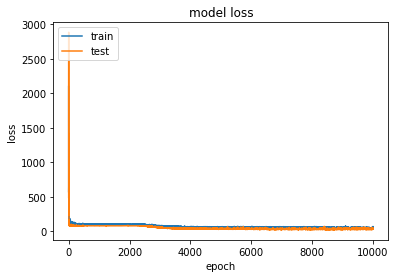

In [117]:
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig("deltaloss.png")

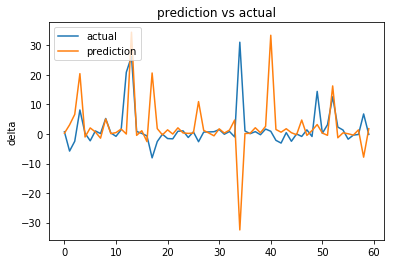

In [119]:
fig = plt.figure()
plt.plot(y_test)
plt.plot(model.predict(x_test))
plt.title('prediction vs actual')
plt.ylabel('delta')
plt.legend(['actual', 'prediction'], loc='upper left')
plt.show()

fig.savefig("delta.png")